# Mecânica dos Fluidos & Elementos Finitos

Propriedades de alguns fluidos (Mecânicas dos Fluidos: fundamentos e aplicações - Yunus A. Çengel - Apêndice A, a partir da página 878):

Água (101kPa, 25 °C): $\rho \; (kg/m^3) = 997.0$ ,  $c_p \; (J/(kg.K)) = 4180$ ,  $\mu \; (Pa.s) = 8.91 \cdot 10^{-4}$ ,  $\nu \; (m^2/s) = 8.937 \cdot 10^{-7}$

Ar (101kPa, 25 °C): $\rho \; (kg/m^3) = 1.184$ ,  $c_p \; (J/(kg.K)) = 1007$ ,  $\mu \; (Pa.s) = 1.849 \cdot 10^{-5}$ ,  $\nu \; (m^2/s) = 1.562 \cdot 10^{-5}$

$CO_2$ (101kPa, 50 °C): $\rho \; (kg/m^3) = 1.6597$ ,  $c_p \; (J/(kg.K)) = 866.6$ ,  $\mu \; (Pa.s) = 1.612 \cdot 10^{-5}$ ,  $\nu \; (m^2/s) = 9.714 \cdot 10^{-6}$

Metano (-90°C): $\rho \; (kg/m^3) = 261.7$ ,  $c_p \; (J/(kg.K)) = 8902$ ,  $\mu \; (Pa.s) = 2.761 \cdot 10^{-5}$ ,  $\nu \; (m^2/s) = 1.055 \cdot 10^{-7}$

Metanol (101kPa, 30°C): $\rho \; (kg/m^3) = 779.1$ ,  $c_p \; (J/(kg.K)) = 2577$ ,  $\mu \; (Pa.s) = 5.088 \cdot 10^{-4}$ ,  $\nu \; (m^2/s) = 6.531 \cdot 10^{-7}$

Isobutano (R600a) (101kPa, 25 °C): $\rho \; (kg/m^3) = 550.7$, $c_p \; (J/(kg.K)) = 2455$, $\mu \; (Pa.s) = 1.510 \cdot 10^{-4}$, $\nu \; (m^2/s) = 2.743 \cdot 10^{-7}$

óleo de motor (101kPa, 20 °C): $\rho \; (kg/m^3) = 888.1$, $c_p \; (J/(kg.K)) = 1881$, $\mu \; (Pa.s) = 0.8374$

Glicerina (101kPa, 25 °C): $\rho \; (kg/m^3) = 1261$, $c_p \; (J/(kg.K)) = 2420$, $\mu \; (Pa.s) = 0.9934$

---

Diâmetro padrão do escapamento de um motor dada a sua cilindrada:

https://www.pipsisland.com/what-size-exhaust-pipe-do-i-need/


In [1]:
import math
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.tri as mtri
import meshio
from scipy.spatial import Delaunay
import scipy as sp
import pandas as pd
import os                # Library used for system interaction (such as listing files in a directory,...)
import itertools as it   #biblioteca com funções de permutação a serem usadas na interação da matriz de conectividade com a global

## Funções de forma (ou interpolação)

In [6]:
#1D----------------------------------------------
##1ª ordem:
#N1 = [N11, N12]

def N11(x,X1,X2):
    return (X2-x)/(X2-X1)

def N12(x,X1,X2):
    return (x-X1)/(X2-X1)

def B11(x,X1,X2):
    return -1/(X2-X1)

def B12(x,X1,X2):
    return 1/(X2-X1)

##2ª ordem:
#N2 = [N21, N22, N23]

def N21(x,X1,X2,X3):
    return 2*(x-X2)*(x-X3)/(X3-X1)**2

def N22(x,X1,X2,X3):
    return (-4)*(x-X1)*(x-X3)/(X3-X1)**2

def N23(x,X1,X2,X3):
    return 2*(x-X1)*(x-X2)/(X3-X1)**2

# B2 = [B21, B22, B23]

def B21(x,X1,X2,X3):
    return 2*(2*x-(X2+X3))/(X3-X1)**2

def B22(x,X1,X2,X3):
    return (-4)*(2*x-(X1+X3))/(X3-X1)**2

def B23(x,X1,X2,X3):
    return 2*(2*x-(X1+X2))/(X3-X1)**2


#2D----------------------------------------------
##1ª ordem:
#N2D_1 = [N2D_11,N2D_12,N2D_13]

def N2D_11(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return (1/(2*A))*(X2*Y3-X3*Y2+(Y2-Y3)*x+(X3-X2)*y)

def N2D_12(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return (1/(2*A))*(X3*Y1-X1*Y3+(Y3-Y1)*x+(X1-X3)*y)

def N2D_13(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return (1/(2*A))*(X1*Y2-X2*Y1+(Y1-Y2)*x+(X2-X1)*y)

def B2D_11(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return np.array([(1/(2*A))*(Y2-Y3), (1/(2*A))*(X3-X2), 0])

def B2D_12(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return np.array([(1/(2*A))*(Y3-Y1), (1/(2*A))*(X1-X3), 0])

def B2D_13(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return np.array([(1/(2*A))*(Y1-Y2), (1/(2*A))*(X2-X1), 0])


##Mini:
#N2D_M = [N2D_M1,N2D_M2,N2D_M3,N2D_M4]

def N2D_M1(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return (1/(2*A))*(X2*Y3-X3*Y2+(Y2-Y3)*x+(X3-X2)*y) - 9*((1/(2*A))**3*(X2*Y3-X3*Y2+(Y2-Y3)*x+(X3-X2)*y)*(X3*Y1-X1*Y3+(Y3-Y1)*x+(X1-X3)*y)*(X1*Y2-X2*Y1+(Y1-Y2)*x+(X2-X1)*y))

def N2D_M2(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return (1/(2*A))*(X3*Y1-X1*Y3+(Y3-Y1)*x+(X1-X3)*y) - 9*((1/(2*A))**3*(X2*Y3-X3*Y2+(Y2-Y3)*x+(X3-X2)*y)*(X3*Y1-X1*Y3+(Y3-Y1)*x+(X1-X3)*y)*(X1*Y2-X2*Y1+(Y1-Y2)*x+(X2-X1)*y))

def N2D_M3(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return (1/(2*A))*(X1*Y2-X2*Y1+(Y1-Y2)*x+(X2-X1)*y) - 9*((1/(2*A))**3*(X2*Y3-X3*Y2+(Y2-Y3)*x+(X3-X2)*y)*(X3*Y1-X1*Y3+(Y3-Y1)*x+(X1-X3)*y)*(X1*Y2-X2*Y1+(Y1-Y2)*x+(X2-X1)*y))

def N2D_M4(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return 27*(X2*Y3-X3*Y2+(Y2-Y3)*x+(X3-X2)*y)*(X3*Y1-X1*Y3+(Y3-Y1)*x+(X1-X3)*y)*(X1*Y2-X2*Y1+(Y1-Y2)*x+(X2-X1)*y)

def B2D_M1(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return np.array([(1/(2*A))*(Y2-Y3) - 9*(1/(2*A))**3*((Y2-Y3)*(y*(X2-X1)+X1*Y2-X2*Y1+x*(Y1-Y2))*(y*(X1-X3)-X1*Y3+X3*Y1+x*(Y3-Y1)) + \
                                                         (Y1-Y2)*(y*(X1-X3)-X1*Y3+X3*Y1+x*(Y3-Y1))*(y*(X3-X2)+X2*Y3-X3*Y2+x*(Y2-Y3)) + \
                                                         (Y3-Y1)*(y*(X2-X1)+X1*Y2-X2*Y1+x*(Y1-Y2))*(y*(X3-X2)+X2*Y3-X3*Y2+x*(Y2-Y3))),
                     (1/(2*A))*(X3-X2) - 9*(1/(2*A))**3*((X3-X2)*(y*(X2-X1)+X1*Y2-X2*Y1+x*(Y1-Y2))*(y*(X1-X3)-X1*Y3+X3*Y1+x*(Y3-Y1)) + \
                                                         (X2-X1)*(y*(X1-X3)-X1*Y3+X3*Y1+x*(Y3-Y1))*(y*(X3-X2)+X2*Y3-X3*Y2+x*(Y2-Y3)) + \
                                                         (X1-X3)*(y*(X2-X1)+X1*Y2-X2*Y1+x*(Y1-Y2))*(y*(X3-X2)+X2*Y3-X3*Y2+x*(Y2-Y3))),
                     0])

def B2D_M2(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return np.array([(1/(2*A))*(Y3-Y1) - 9*(1/(2*A))**3*((Y2-Y3)*(y*(X2-X1)+X1*Y2-X2*Y1+x*(Y1-Y2))*(y*(X1-X3)-X1*Y3+X3*Y1+x*(Y3-Y1)) + \
                                                         (Y1-Y2)*(y*(X1-X3)-X1*Y3+X3*Y1+x*(Y3-Y1))*(y*(X3-X2)+X2*Y3-X3*Y2+x*(Y2-Y3)) + \
                                                         (Y3-Y1)*(y*(X2-X1)+X1*Y2-X2*Y1+x*(Y1-Y2))*(y*(X3-X2)+X2*Y3-X3*Y2+x*(Y2-Y3))),
                     (1/(2*A))*(X1-X3) - 9*(1/(2*A))**3*((X3-X2)*(y*(X2-X1)+X1*Y2-X2*Y1+x*(Y1-Y2))*(y*(X1-X3)-X1*Y3+X3*Y1+x*(Y3-Y1)) + \
                                                         (X2-X1)*(y*(X1-X3)-X1*Y3+X3*Y1+x*(Y3-Y1))*(y*(X3-X2)+X2*Y3-X3*Y2+x*(Y2-Y3)) + \
                                                         (X1-X3)*(y*(X2-X1)+X1*Y2-X2*Y1+x*(Y1-Y2))*(y*(X3-X2)+X2*Y3-X3*Y2+x*(Y2-Y3))),
                     0])

def B2D_M3(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return np.array([(1/(2*A))*(Y1-Y2) - 9*(1/(2*A))**3*((Y2-Y3)*(y*(X2-X1)+X1*Y2-X2*Y1+x*(Y1-Y2))*(y*(X1-X3)-X1*Y3+X3*Y1+x*(Y3-Y1)) + \
                                                         (Y1-Y2)*(y*(X1-X3)-X1*Y3+X3*Y1+x*(Y3-Y1))*(y*(X3-X2)+X2*Y3-X3*Y2+x*(Y2-Y3)) + \
                                                         (Y3-Y1)*(y*(X2-X1)+X1*Y2-X2*Y1+x*(Y1-Y2))*(y*(X3-X2)+X2*Y3-X3*Y2+x*(Y2-Y3))),
                     (1/(2*A))*(X2-X1) - 9*(1/(2*A))**3*((X3-X2)*(y*(X2-X1)+X1*Y2-X2*Y1+x*(Y1-Y2))*(y*(X1-X3)-X1*Y3+X3*Y1+x*(Y3-Y1)) + \
                                                         (X2-X1)*(y*(X1-X3)-X1*Y3+X3*Y1+x*(Y3-Y1))*(y*(X3-X2)+X2*Y3-X3*Y2+x*(Y2-Y3)) + \
                                                         (X1-X3)*(y*(X2-X1)+X1*Y2-X2*Y1+x*(Y1-Y2))*(y*(X3-X2)+X2*Y3-X3*Y2+x*(Y2-Y3))),
                     0])

def B2D_M4(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return np.array([27*((Y2-Y3)*(y*(X2-X1)+X1*Y2-X2*Y1+x*(Y1-Y2))*(y*(X1-X3)-X1*Y3+X3*Y1+x*(Y3-Y1)) + \
                                                         (Y1-Y2)*(y*(X1-X3)-X1*Y3+X3*Y1+x*(Y3-Y1))*(y*(X3-X2)+X2*Y3-X3*Y2+x*(Y2-Y3)) + \
                                                         (Y3-Y1)*(y*(X2-X1)+X1*Y2-X2*Y1+x*(Y1-Y2))*(y*(X3-X2)+X2*Y3-X3*Y2+x*(Y2-Y3))),
                     27*((X3-X2)*(y*(X2-X1)+X1*Y2-X2*Y1+x*(Y1-Y2))*(y*(X1-X3)-X1*Y3+X3*Y1+x*(Y3-Y1)) + \
                                                         (X2-X1)*(y*(X1-X3)-X1*Y3+X3*Y1+x*(Y3-Y1))*(y*(X3-X2)+X2*Y3-X3*Y2+x*(Y2-Y3)) + \
                                                         (X1-X3)*(y*(X2-X1)+X1*Y2-X2*Y1+x*(Y1-Y2))*(y*(X3-X2)+X2*Y3-X3*Y2+x*(Y2-Y3))),
                     0])


##2ª ordem:
#N2D_2 = [N2D_11,N2D_12,N2D_13,N2D_14,N2D_15,N2D_16]

def N2D_21(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return ((1/(2*A))*(X2*Y3-X3*Y2+(Y2-Y3)*x+(X3-X2)*y))*(2*((1/(2*A))*(X2*Y3-X3*Y2+(Y2-Y3)*x+(X3-X2)*y)) - 1)

def N2D_22(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return ((1/(2*A))*(X3*Y1-X1*Y3+(Y3-Y1)*x+(X1-X3)*y))*(2*((1/(2*A))*(X3*Y1-X1*Y3+(Y3-Y1)*x+(X1-X3)*y)) - 1)

def N2D_23(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return ((1/(2*A))*(X1*Y2-X2*Y1+(Y1-Y2)*x+(X2-X1)*y))*(2*((1/(2*A))*(X1*Y2-X2*Y1+(Y1-Y2)*x+(X2-X1)*y)) - 1)

def N2D_24(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return 4*((1/(2*A))*(X2*Y3-X3*Y2+(Y2-Y3)*x+(X3-X2)*y))*((1/(2*A))*(X3*Y1-X1*Y3+(Y3-Y1)*x+(X1-X3)*y))

def N2D_25(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return 4*((1/(2*A))*(X3*Y1-X1*Y3+(Y3-Y1)*x+(X1-X3)*y))*((1/(2*A))*(X1*Y2-X2*Y1+(Y1-Y2)*x+(X2-X1)*y))

def N2D_26(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return 4*((1/(2*A))*(X1*Y2-X2*Y1+(Y1-Y2)*x+(X2-X1)*y))*((1/(2*A))*(X2*Y3-X3*Y2+(Y2-Y3)*x+(X3-X2)*y))

def B2D_21(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return np.array([((1/(2*A))*(Y2-Y3))*(2*((1/(2*A))*(X2*Y3-X3*Y2+(Y2-Y3)*x+(X3-X2)*y)) - 1) + ((1/(2*A))*(X2*Y3-X3*Y2+(Y2-Y3)*x+(X3-X2)*y))*(2*(1/(2*A))*(Y2-Y3)),
                     ((1/(2*A))*(X3-X2))*(2*((1/(2*A))*(X2*Y3-X3*Y2+(Y2-Y3)*x+(X3-X2)*y)) - 1) + ((1/(2*A))*(X2*Y3-X3*Y2+(Y2-Y3)*x+(X3-X2)*y))*(2*(1/(2*A))*(X3-X2)),
                     0])

def B2D_22(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return np.array([((1/(2*A))*(Y3-Y1))*(2*((1/(2*A))*(X3*Y1-X1*Y3+(Y3-Y1)*x+(X1-X3)*y)) - 1) + ((1/(2*A))*(X3*Y1-X1*Y3+(Y3-Y1)*x+(X1-X3)*y))*(2*(1/(2*A))*(Y3-Y1)), 
                     ((1/(2*A))*(X1-X3))*(2*((1/(2*A))*(X3*Y1-X1*Y3+(Y3-Y1)*x+(X1-X3)*y)) - 1) + ((1/(2*A))*(X3*Y1-X1*Y3+(Y3-Y1)*x+(X1-X3)*y))*(2*(1/(2*A))*(X1-X3)), 
                     0])

def B2D_23(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return np.array([((1/(2*A))*(Y1-Y2))*(2*((1/(2*A))*(X1*Y2-X2*Y1+(Y1-Y2)*x+(X2-X1)*y)) - 1) + ((1/(2*A))*(X1*Y2-X2*Y1+(Y1-Y2)*x+(X2-X1)*y))*(2*(1/(2*A))*(Y1-Y2)), 
                     ((1/(2*A))*(X2-X1))*(2*((1/(2*A))*(X1*Y2-X2*Y1+(Y1-Y2)*x+(X2-X1)*y)) - 1) + ((1/(2*A))*(X1*Y2-X2*Y1+(Y1-Y2)*x+(X2-X1)*y))*(2*(1/(2*A))*(X2-X1)), 
                     0])

def B2D_24(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return np.array([4*((1/(2*A))*(Y2-Y3))*((1/(2*A))*(X3*Y1-X1*Y3+(Y3-Y1)*x+(X1-X3)*y)) + 4*((1/(2*A))*(X2*Y3-X3*Y2+(Y2-Y3)*x+(X3-X2)*y))*((1/(2*A))*(Y3-Y1)), 
                     4*((1/(2*A))*(X3-X2))*((1/(2*A))*(X3*Y1-X1*Y3+(Y3-Y1)*x+(X1-X3)*y)) + 4*((1/(2*A))*(X2*Y3-X3*Y2+(Y2-Y3)*x+(X3-X2)*y))*((1/(2*A))*(X1-X3)), 
                     0])

def B2D_25(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return np.array([4*((1/(2*A))*(Y3-Y1))*((1/(2*A))*(X1*Y2-X2*Y1+(Y1-Y2)*x+(X2-X1)*y)) + 4*((1/(2*A))*(X3*Y1-X1*Y3+(Y3-Y1)*x+(X1-X3)*y))*((1/(2*A))*(Y1-Y2)), 
                     4*((1/(2*A))*(X1-X3))*((1/(2*A))*(X1*Y2-X2*Y1+(Y1-Y2)*x+(X2-X1)*y)) + 4*((1/(2*A))*(X3*Y1-X1*Y3+(Y3-Y1)*x+(X1-X3)*y))*((1/(2*A))*(X2-X1)), 
                     0])

def B2D_26(x,y,X1,X2,X3,Y1,Y2,Y3,A):
    return np.array([4*((1/(2*A))*(Y1-Y2))*((1/(2*A))*(X2*Y3-X3*Y2+(Y2-Y3)*x+(X3-X2)*y)) + 4*((1/(2*A))*(X1*Y2-X2*Y1+(Y1-Y2)*x+(X2-X1)*y))*((1/(2*A))*(Y2-Y3)), 
                     4*((1/(2*A))*(X2-X1))*((1/(2*A))*(X2*Y3-X3*Y2+(Y2-Y3)*x+(X3-X2)*y)) + 4*((1/(2*A))*(X1*Y2-X2*Y1+(Y1-Y2)*x+(X2-X1)*y))*((1/(2*A))*(X3-X2)),
                     0])



## Formulação corrente-vorticidade

A Formulação Corrente-Vorticidade é uma alternativa à solução da Equação de Navier-Stokes para obtenção do campo de velocidades de um escoamento. Essa formulação consiste em um sistema de 3 equações que envolvem a vorticidade, a função corrente e a velocidade desse escoamento.

\begin{equation}
 \left\{ \begin{aligned}
         \frac{\partial \omega_z}{\partial t} + v \cdot \nabla \omega_z = \nu \nabla^2 \omega_z \\
         \nabla^2 \psi = -\omega_z \\
         v_x = \frac{\partial \psi}{\partial y} \:,\; v_y = -\frac{\partial \psi}{\partial x}
        \end{aligned} 
 \right.
\end{equation}

A partir do campo de velocidades inicial, usa-se a equação de transporte de vorticidade para obtenção do campo de vorticidade do escoamento. Conhecendo este campo, pode-se obter a função corrente associada ao escoamento por meio da Equação de Corrente-Vorticidade. Por fim, conhecendo a função corrente, chega-se ao campo de velocidades do fluido. 

A seguir, serão obtidas as formas fracas das 3 equações em análise e suas respectivas discretizações:

$$ \frac{\partial \omega_z}{\partial t} + v \cdot \nabla \omega_z = \nu \nabla^2 \omega_z $$

Formulação fraca:

$$ \int_\Omega \left [ \frac{\partial \omega_z}{\partial t} + v \cdot \nabla \omega_z -\nu \nabla^2 \omega_z \right ] \cdot \omega \; d\Omega = 0 $$

$$ \int_{\Omega} \omega \frac{\partial \omega_z}{\partial t} \; d\Omega + \int_{\Omega} \omega \cdot \vec{v} \cdot \nabla\omega_z \; d\Omega - \int_{\Gamma} \omega \cdot \nu \nabla\omega_z \; d\Gamma + \int_{\Omega} \nabla\omega \cdot \nu \nabla\omega_z \; d\Omega = 0 $$

Discretizando a formulação fraca:

$$ \sum_{i}^{\infty} \sum_{j}^{\infty} \int_{\Omega} N_j\omega_j \cdot \frac{\partial (N_i\omega_{z_i})}{\partial t} \; d\Omega + \sum_{i}^{\infty} \sum_{j}^{\infty} \int_{\Omega} N_j\omega_j \cdot \vec{v} \cdot B_i\omega_{z_i} \; d\Omega \\ - \sum_{i}^{\infty} \sum_{j}^{\infty} \int_{\Gamma} N_j\omega_j \cdot (\nu B_i\omega_{z_i}) \; d\Gamma + \sum_{i}^{\infty} \sum_{j}^{\infty} \int_{\Omega} B_j\omega_j \cdot (\nu B_i\omega_{z_i}) \; d\Omega = 0 $$

Dividindo a equação pela função peso $\omega$ e retirando $\omega_{z_i}$ das integrais:

$$ \sum_{i}^{\infty} \sum_{j}^{\infty} \int_{\Omega} N_j N_i \; d\Omega \cdot \frac{\partial \omega_{z_i}}{\partial t} + \sum_{i}^{\infty} \sum_{j}^{\infty} \int_{\Omega} \vec{v} \cdot N_j B_i \; d\Omega \cdot \omega_{z_i} \\ - \sum_{i}^{\infty} \sum_{j}^{\infty} \int_{\Gamma} N_j \cdot (\nu B_i) \; d\Gamma \cdot \omega_{z_i} + \sum_{i}^{\infty} \sum_{j}^{\infty} \int_{\Omega} B_j \cdot (\nu B_i) \; d\Omega \cdot \omega_{z_i} = 0 $$

Substituindo os somatórios duplos por somatórios de elemento, assumindo velocidade e viscosidade constantes para o escoamento e estipulando condições de contorno de Dirichlet, a equação assume a seguinte forma: 

$$ \sum_{e}^{\infty} \int_{\Omega} N_j N_i \; d\Omega \cdot \frac{\partial \omega_{z_i}}{\partial t} + \sum_{e}^{\infty} \vec{v} \int_{\Omega} N_j B_i \; d\Omega \cdot \omega_{z_i} + \sum_{e}^{\infty} \nu \int_{\Omega} B_j B_i \; d\Omega \cdot \omega_{z_i} = 0 $$

Lembrando que as integrais das funções de interpolação correspondem a matrizes elementares de massa, gradiente e viscosidade:

$$ M^e = \int_{\Omega} N_j N_i \; d\Omega \;\;,\;\;\;\; G^e = \int_{\Omega} N_j B_i \; d\Omega \;\;,\;\;\;\; K^e = \int_{\Omega} B_j B_i \; d\Omega$$

Substituindo o somatório de matrizes elementares por suas respectivas matrizes globais:

$$ M \frac{\partial \omega_{z_i}}{\partial t} + \vec{v} \cdot G \omega_{z_i} + \nu K \omega_{z_i} = 0 $$

Finalmente, efetuando a discretização **avançada e implícita** no tempo, tem-se:

$$ M \frac{\omega_{z_i}^{n+1} - \omega_{z_i}^{n}}{\Delta t} + \vec{v} \cdot G \omega_{z_i}^{n+1} + \nu K \omega_{z_i}^{n+1} = 0 $$

$$ \left( \frac{M}{\Delta t} + \nu K + \vec{v} \cdot G \right) \omega_{z_i}^{n+1} = \frac{M}{\Delta t} \omega_{z_i}^{n} $$

O termo de convecção ainda pode ser expandido para identificação das matrizes do gradiente nas direções x e y:

$$ \vec{v} \cdot G = (\vec{v_x} I) \cdot G_x + (\vec{v_y} I) \cdot G_y $$

Note que $\vec{v}$ corresponde a uma matriz diagonal.

$$ \left( \frac{M}{\Delta t} + \nu K + (\vec{v_x} I) \cdot G_x + (\vec{v_y} I) \cdot G_y \right) \omega_{z_i}^{n+1} = \frac{M}{\Delta t} \omega_{z_i}^{n} $$

---

Com a equação acima é possível obter os valores de vorticidade para um escoamento em domínio bidimensional. Tendo-os em mãos, utiliza-se a Equação Corrente-Vorticidade para obter a função corrente deste escoamento:

$$ \nabla^2 \psi = -\omega_z \;\; \Rightarrow \;\; \int_{\Omega} \omega \cdot [ \nabla \cdot (\nabla \psi) + \omega_z ] \;\; d\Omega = 0 $$

$$ \oint_{\Gamma} \omega \nabla \psi \cdot \vec{n} \;\; d\Gamma - \int_{\Omega} \nabla \omega \cdot \nabla \psi \;\; d\Omega + \int_{\Omega} \omega \cdot \omega_z \;\; d\Omega = 0 $$ 

$$ - \oint_{\Gamma} \omega \nabla \psi \;\; d\Gamma - \int_{\Omega} \nabla \omega \cdot \nabla \psi \;\; d\Omega + \int_{\Omega} \omega \cdot \omega_z \;\; d\Omega = 0$$

$$ \sum_{i}^{\infty} \sum_{j}^{\infty} \left [ \int_{\Omega} B_j B_i \;\; d\Omega \cdot \psi_i + \int_{\Gamma} N_j B_i \;\; d\Gamma \cdot \psi_i \right ] - \sum_{k}^{\infty} \sum_{j}^{\infty} \int_{\Omega} N_j N_k \;\; d\Omega \cdot \omega_{z_i} = 0 $$

$$ K \psi_i = M \omega_{z_i} $$

---

$$ v_x = \frac{\partial \psi}{\partial y} \:,\; v_y = -\frac{\partial \psi}{\partial x} $$

$$ \int_{\Omega} \omega \cdot \left [ v_x - \frac{\partial \psi}{\partial y} \right ] \; d\Omega = 0 \;,\;\; \int_{\Omega} \omega \cdot \left [ v_y + \frac{\partial \psi}{\partial x} \right ] \; d\Omega = 0 $$

$$ v_x: \;\;\; \sum_{i}^{\infty} \sum_{j}^{\infty} \int_{\Omega} N_j N_i \;\; d\Omega \cdot v_{x_i} = \sum_{i}^{\infty} \sum_{j}^{\infty} \int_{\Omega} N_j B_i^y \;\; d\Omega \cdot \psi_i \;\;,\;\;\; B^y = \frac{\partial N}{\partial y}$$
$$ v_y:  \sum_{i}^{\infty} \sum_{j}^{\infty} \int_{\Omega} N_j N_i \;\; d\Omega \cdot v_{y_i} = -\sum_{i}^{\infty} \sum_{j}^{\infty} \int_{\Omega} N_j B_i^x \;\; d\Omega \cdot \psi_i \;\;,\;\;\; B^x = \frac{\partial N}{\partial x}$$

$$ K v_x = G_y \psi_i$$
$$ K v_y = -G_X \psi_i$$

---

Finalmente, o sistema de equações da Formulação Corrente-Vorticidade em sua forma fraca discretizada:

\begin{dcases}
    \begin{aligned}
        \left( \frac{M}{\Delta t} + \nu K + (\vec{v_x} I) \cdot G_x + (\vec{v_y} I) \cdot G_y \right) \omega_{z_i}^{n+1} = \frac{M}{\Delta t} \omega_{z_i}^{n} \\
        K \psi_i = M \omega_{z_i} \\
        K v_x = G_y \psi_i \;,\;\;K v_y = -G_x \psi_i
    \end{aligned}
\end{dcases}


## Validação: escoamento entre placas paralelas

### Solução numérica

In [83]:
# Criando diretório para armazenar solução

# Specify the folder in which results will be exported (mostly graphs)
workingDir = r"C:\Users\João Pedro\Downloads\ElementosFinitos"   #Notebook pessoal
#workingDir = r"C:\Users\jferreira\Downloads\ElementosFinitos"   #TechnipFMC
fileName = "Sol_Retangulo_(0.05x0.20)_0.002_mesh_9k_elem_0.05_L_1e-5_nu_20_T_0.2_dt_0.01_vxcc_50_Re_25_R"
outputPath = workingDir + "\\" + fileName

if not os.path.exists(outputPath):
    os.mkdir(outputPath)
    print("Directory " , outputPath ,  " has been created ")
else:
    print("Directory " , outputPath ,  " already exists")

# Propriedades do fluido e dominio:

nu = 0.00001  #m^2/s
ux = 0.01   # m/s
to = 0.0   # s
tf = 20.0   # s
dt = 0.2   # s 
nt = int((tf-to)/dt+1)

Lc = 0.05   # m
print("Comprimento característico do escoamento: {} ".format(np.around(Lc, 6)))
print("Deslocamento em um incremento no tempo: {} ".format(np.around(ux*dt, 6)))
print("Razão: {} ".format(np.around(Lc/(ux*dt), 2)))

# leitura de malha e classificacao de contorno por nome (ccName)
mshname = 'Retangulo_(0.05x0.20)_0.002_mesh_9k_elem_0.05_L.msh'
msh = meshio.read('./' + mshname)
X = np.array(msh.points[:,0])
Y = np.array(msh.points[:,1])
npoints = len(X)
IEN = msh.cells[1].data # triangles
ne = IEN.shape[0]
IENbound = msh.cells[0].data # lines
IENboundTypeElem = list(msh.cell_data['gmsh:physical'][0] - 1)
boundNames = list(msh.field_data.keys())
IENboundElem = [boundNames[elem] for elem in IENboundTypeElem]

####################################################################################
#O array IENboundTypeElem apresenta séries de números repetidos. Cada série de um número corresponde a um contorno e a quantidade de pontos nele.
#Ex.: 4 contornos, dois com 5 nós, dois com 3 nós: msh.cell_data['gmsh:physical'][0] será [4,4,4,4,4,5,5,5,6,6,6,6,6,7,7,7]
#O nº em série que vai representar cada contorno vai depender de como a entidade física é criada no gmsh. Pode haver, por ex., 5 contornos representados por 5,6,7,8,9
#Para tornar o loop que define o IENboundElem possível, é preciso que se subtraia esses números de forma que eles se tornem 0,1,2,3,4; por isso a subtração por 5 ali.
#Dessa forma, sempre teremos séries de 0, 1, 2, 3, 4 para associar aos nomes de cada contorno, estes por sua vez presentes em "boundaNames".
####################################################################################

# cria lista de nos do contorno
cc = np.unique(IENbound.reshape(IENbound.size))
ccName = [[] for i in range( len(X) )]
# prioridade 4
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'Admissao':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
# prioridade 3
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'Exaustao':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
# prioridade 2
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'CCInferior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
# prioridade 1
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'CCSuperior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

IENbound = cc

# Definição dos vetores de condicoes de contorno para vx,vy e psi
vxcc = np.zeros( (npoints),dtype='float' )
vycc = np.zeros( (npoints),dtype='float' )
PSIcc = np.zeros( (npoints),dtype='float' )

for i in IENbound: 
 if ccName[i] == 'CCInferior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.0
 if ccName[i] == 'CCSuperior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = Lc*ux
 if ccName[i] == 'Admissao':
  vxcc[i] = ux
  vycc[i] = 0.0
  PSIcc[i] = Y[i]*ux

# inicializacao das matrizes globais
ne = IEN.shape[0]
K = np.zeros( (npoints,npoints),dtype='float' )
M = np.zeros( (npoints,npoints),dtype='float' )
Gx = np.zeros( (npoints,npoints),dtype='float' )
Gy = np.zeros( (npoints,npoints),dtype='float' )

for e in range(0,ne):
 v1,v2,v3 = IEN[e]

 # Calcula a área do triângulo
 area = 0.5*np.linalg.det([[1.0,X[v1],Y[v1]],
                           [1.0,X[v2],Y[v2]],
                           [1.0,X[v3],Y[v3]]])

 b1 = Y[v2]-Y[v3]
 b2 = Y[v3]-Y[v1]
 b3 = Y[v1]-Y[v2]
 
 c1 = X[v3]-X[v2]
 c2 = X[v1]-X[v3]
 c3 = X[v2]-X[v1]

 kxelem = np.array([[b1*b1,b1*b2,b1*b3],
                    [b2*b1,b2*b2,b2*b3],
                    [b3*b1,b3*b2,b3*b3]])
 kyelem = np.array([[c1*c1,c1*c2,c1*c3],
                    [c2*c1,c2*c2,c2*c3],
                    [c3*c1,c3*c2,c3*c3]])
 kelem = (1/(4*area))*kxelem + (1/(4*area))*kyelem

 melem = (area/12.0)*np.array([[2.0,1.0,1.0],
                               [1.0,2.0,1.0],
                               [1.0,1.0,2.0]])

 gxelem = (1/6)*np.array([[b1,b2,b3],
                          [b1,b2,b3],
                          [b1,b2,b3]])
 gyelem = (1/6)*np.array([[c1,c2,c3],
                          [c1,c2,c3],
                          [c1,c2,c3]])


 for ilocal in range(0,3):
  iglobal = IEN[e,ilocal]
  for jlocal in range(0,3):
   jglobal = IEN[e,jlocal]

   K[iglobal,jglobal] += kelem[ilocal,jlocal]
   M[iglobal,jglobal] += melem[ilocal,jlocal]
   Gx[iglobal,jglobal] += gxelem[ilocal,jlocal]
   Gy[iglobal,jglobal] += gyelem[ilocal,jlocal]


# condicao inicial de vx,vy (necessárias para cálculo da vorticidade)
vx = np.zeros( (npoints),dtype='float' )
vy = np.zeros( (npoints),dtype='float' )
PSI = np.zeros( (npoints),dtype='float' )

for i in IENbound:
 vx[i] = vxcc[i]
 vy[i] = vycc[i]

# Vorticidade nos contornos no instante inicial
vort_cc = np.linalg.solve(M,(Gx@vy - Gy@vx))
vort = vort_cc.copy()


# Gravando condições de contorno e iniciais da solução em .vtk
point_data = {'PSIcc' : PSIcc}
data_vxcc = {'vxcc' : vxcc}
data_vycc = {'vycc' : vycc}
data_vort_cc = {'vort_cc' : vort_cc}
point_data.update(data_vxcc)
point_data.update(data_vycc)
point_data.update(data_vort_cc)
meshio.write_points_cells(outputPath +'\\'+'condicaoDeContorno.vtk',
                           msh.points, 
                           msh.cells,
                           point_data=point_data,
                           )


CampoVort = np.empty((npoints,nt))
CampoPSI = np.empty((npoints,nt))
CampoVx = np.empty((npoints,nt))
CampoVy = np.empty((npoints,nt))


# Avanço no tempo
for n in range(0,nt):

 ## Solução do sistema linear para vorticidade

 ### Cálculo da condição de contorno da vorticidade (atualizando vorticidade nos contornos a cada iteração)
 vort_cc = np.linalg.solve(M,(Gx@vy - Gy@vx))

 ### Montagem da matriz A
 vx_diag = np.diag(vx)
 vy_diag = np.diag(vy)

 ### Montagem da matriz A e do vetor b de transporte de vorticidade
 A = M/dt + nu*K + vx_diag@Gx + vy_diag@Gy # implicito para conv e difusao
 b = (M/dt)@vort
 
 ### Condição de contorno para o sistema linear Ax=b
 for i in IENbound:
     if ccName[i] == 'CCSuperior' or \
        ccName[i] == 'CCInferior' or \
        ccName[i] == 'Admissao':

         A[i,:] = 0.0 # zerando a linha
         A[i,i] = 1.0 # colocando 1 na diagonal
         b[i]   = vort_cc[i]

 ### Solução
 vort = np.linalg.solve(A,b)

 CampoVort[:,n] = vort

 ## Solução da Equação de Corrente-Vorticidade

 Apsi = K.copy()

 bpsi = M@vort

 ### Imposição das c.c.s de Dirichlet
 for i in IENbound:
    if ccName[i] == 'CCSuperior' or \
       ccName[i] == 'CCInferior' or \
       ccName[i] == 'Admissao':
         
         Apsi[i,:] = 0.0 # zerando a linha
         Apsi[i,i] = 1.0 # colocando 1 na diagonal
         bpsi[i]   = PSIcc[i]

 ### Solução
 PSI = np.linalg.solve(Apsi,bpsi)

 CampoPSI[:,n] = PSI

 ## Obtendo campo de velocidades a partir da função corrrente

 vx = np.linalg.solve(M,Gy@PSI)
 vy = np.linalg.solve(M,-Gx@PSI)
 
 for i in IENbound:
  if ccName[i] == 'CCSuperior' or \
     ccName[i] == 'CCInferior' or \
     ccName[i] == 'Admissao':
     
     vx[i] = vxcc[i]
     vy[i] = vycc[i]

 CampoVx[:,n] = vx
 CampoVy[:,n] = vy


 # Gravando solução em .vtk
 print ("... gravando em VTK passo de tempo: " + str(n))
 point_data = {'psi' : PSI}
 data_vx = {'vx' : vx}
 data_vy = {'vy' : vy}
 data_vort = {'$\omega_z$' : vort}
 point_data.update(data_vx)
 point_data.update(data_vy)
 point_data.update(data_vort)
 meshio.write_points_cells(outputPath +'\\'+'solucao-'+str(n)+'.vtk',
                            msh.points, 
                            msh.cells,
                            point_data=point_data,
                            )


Directory  C:\Users\João Pedro\Downloads\ElementosFinitos\Sol_Retangulo_(0.05x0.20)_0.002_mesh_9k_elem_0.05_L_1e-5_nu_20_T_0.2_dt_0.01_vxcc_50_Re_25_R  has been created 
Comprimento característico do escoamento: 0.05 
Deslocamento em um incremento no tempo: 0.002 
Razão: 25.0 

... gravando em VTK passo de tempo: 0
... gravando em VTK passo de tempo: 1
... gravando em VTK passo de tempo: 2
... gravando em VTK passo de tempo: 3
... gravando em VTK passo de tempo: 4
... gravando em VTK passo de tempo: 5
... gravando em VTK passo de tempo: 6
... gravando em VTK passo de tempo: 7
... gravando em VTK passo de tempo: 8
... gravando em VTK passo de tempo: 9
... gravando em VTK passo de tempo: 10
... gravando em VTK passo de tempo: 11
... gravando em VTK passo de tempo: 12
... gravando em VTK passo de tempo: 13
... gravando em VTK passo de tempo: 14
... gravando em VTK passo de tempo: 15
... gravando em VTK passo de tempo: 16
... gravando em VTK passo de tempo: 17
... gravando em VTK passo de 

### Solução analítica

Escoamento entre placas paralelas com velocidade inicial $u_o = 0.1 m/s$ e distância entre placas $L_c = 0.05 m$. Hipóteses adotadas:

*   Não deslizamento nas placas ($u_x(0) = 0$, $u_x(L_c) = 0$)

*   Fluido incompressível

Comprimento de entrada:

$$ L_c = 0.06 Re \cdot D $$

Solução transiente:

$$ u_h(y,t) = \sum_{m = 1}^{\infty} \frac{1}{N_m} \: \overline{f_m} \: \sin(\mu_m y) \: e^{-\mu \mu_m^2 t} $$ 

$$ N_m = \int_0^{L_c} \sin(\mu_m y)^2 \: dy \; , \;\;\;\;\; \overline{f_m} = \int_0^{L_c} \sin(\mu_m y) \: u_o \: dy $$

Solução permanente:

$$ u_p(y) = \frac{\partial P}{\partial x} \frac{1}{2 \mu} y^2 - \frac{\partial P}{\partial x} \frac{L_c}{2 \mu} y$$

$$ \frac{\partial P}{\partial x} = -\frac{12 \mu Q}{L_z L_c^3} $$



In [77]:
import scipy as sp

# dominio do tempo
to = 0.0
tf = 7.0   #1000.0
dt = 0.1   # 20.0
nt = int((tf-to)/dt+1)
dom_T = np.linspace(to, tf, nt)

# dominio do espaco
yo = 0.0
yf = 0.05
ny = 100    #25
dom_Y = np.linspace(yo, yf, ny)


# propriedades do escoamento
uo = 0.01   # velocidade inicial
nu = 0.00001   # viscosidade cinematica
rho = 10.0   # massa especifica fluido hipotetico
mu = nu*rho   # viscosidade dinamica
Lc = 0.05   # comprimento caracteristico (distancia entre placas)

Lz = 1.0   # profundidade em Z do escoamento
Q = uo*Lz*Lc   # vazao volumetrica
dpdx = -12*mu*Q/(Lz*Lc**3)  # gradiente de pressao

# solucao transiente
def u(Y, T, mu, Lc, uo):

    Sol = np.empty((len(Y), len(T)))

    for i in range(len(T)):

        for j in range(len(Y)):

            uh = 0.0

            for m in range(1, 40):

                mu_m = m*np.pi/Lc
                f_Nm = lambda y : np.sin(mu_m*y)**2
                Nm = sp.integrate.quad(f_Nm, 0.0, Lc)[0]

                f_fm = lambda y : np.sin(mu_m*y)*uo
                fm = sp.integrate.quad(f_fm, 0.0, Lc)[0]

                uh += (fm/Nm)*np.sin(mu_m*Y[j])*np.exp(-mu*mu_m**2*T[i])

            ugeral = uh + (dpdx/(2*mu))*Y[j]**2 - (dpdx*Lc/(2*mu))*Y[j]   # uh + up

            Sol[j,i] = ugeral

    return Sol

# gerando solucao
Sol = u(dom_Y, dom_T, mu, Lc, uo)

# solucao permanente para comparação
def u_p(Y, mu, Lc, dpdx):

    return (dpdx/(2*mu))*Y**2 - (dpdx*Lc/(2*mu))*Y

# gerando solucao
Sol_P = u_p(dom_Y, mu, Lc, dpdx)

In [15]:
import pandas as pd

# dominio do espaco
yo = 0.0
yf = 0.05
ny = 1001    #25
dom_Y = np.linspace(yo, yf, ny)


# propriedades do escoamento
uo = 0.01   # velocidade inicial
nu = 0.00001   # viscosidade cinematica
rho = 10.0   # massa especifica fluido hipotetico
mu = nu*rho   # viscosidade dinamica
Lc = 0.05   # comprimento caracteristico (distancia entre placas)

Lz = 1.0   # profundidade em Z do escoamento
Q = uo*Lz*Lc   # vazao volumetrica
dpdx = -12*mu*Q/(Lz*Lc**3)  # gradiente de pressao

# somente a solucao permanente
def u_p(Y, mu, Lc, dpdx):

    return (dpdx/(2*mu))*Y**2 - (dpdx*Lc/(2*mu))*Y

# gerando solucao
Sol_P = u_p(dom_Y, mu, Lc, dpdx)

XY = np.array([dom_Y,Sol_P])

Sol_P_df = pd.DataFrame(XY)

# Specify the folder in which results will be exported (mostly graphs)
workingDir = r"C:\Users\João Pedro\Downloads\ElementosFinitos"   #Notebook pessoal
#workingDir = r"C:\Users\jferreira\Downloads\ElementosFinitos"   #TechnipFMC
fileName = "Sol_Retangulo_Permanente_(0.05x0.20)_0.05_L_1e-5_nu_0.01_vxcc_50_Re"
outputPath = workingDir + "\\" + fileName

Sol_P_df.to_csv(outputPath)

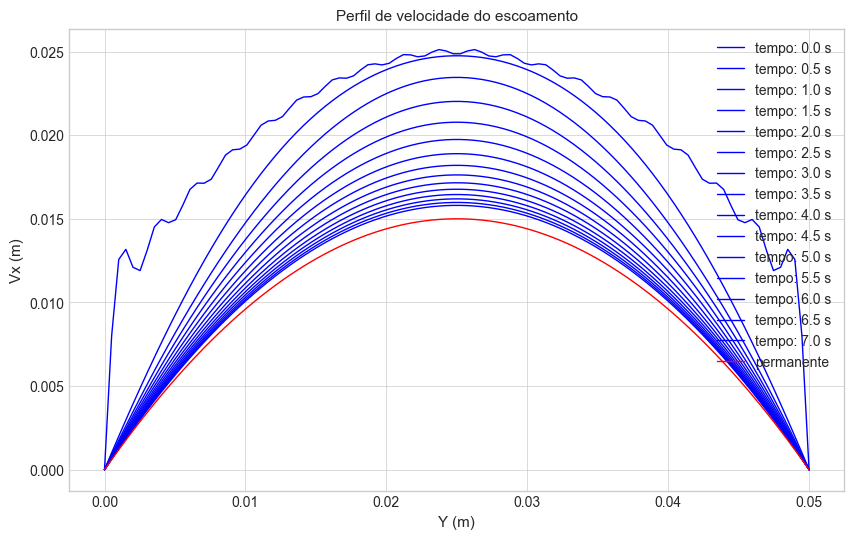

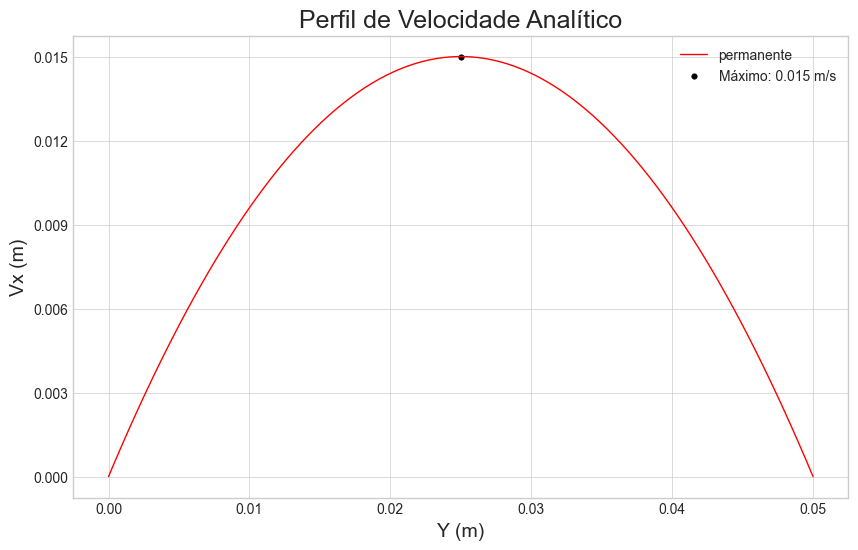

In [96]:
# plotando
#plt.style.use('bmh')
plt.style.use('seaborn-v0_8-whitegrid')

fig1, (ax1) = plt.subplots(1, 1, figsize = (10,6))

for n in range(0, int(len(dom_T)), 5):

    #fig, (ax1) = plt.subplots(1, 1, sharey=True, sharex = True, figsize = (6,6))

    ax1.plot(dom_Y, Sol[:,n], color='blue', linewidth=1.0, label=r'tempo: {} s'.format(np.around(dom_T[n],2)))
 
ax1.plot(dom_Y, Sol_P, color='red', linewidth=1.0, label=r'permanente')

ax1.set_title('Perfil de velocidade do escoamento',fontdict={'fontsize':11})
ax1.set_xlabel('Y (m)',fontdict={'fontsize':11})
ax1.set_ylabel('Vx (m)',fontdict={'fontsize':11})
ax1.legend(loc='best',facecolor ='w')
    
    #plt.show()

fig2, (ax2) = plt.subplots(1, 1, figsize = (10,6))

ax2.plot(dom_Y, Sol_P, color='red', linewidth=1.0, label=r'permanente')

Vx_max = max(Sol_P)
ax2.scatter(0.025, Vx_max, s=15.0, color='k', label=r'Máximo: {} m/s'.format(np.around(Vx_max,3)))

ax2.set_title('Perfil de Velocidade Analítico',fontdict={'fontsize':18})
yticks = np.linspace(0.0, Vx_max, 6)
ax2.set_yticks(yticks)
ax2.set_xlabel('Y (m)',fontdict={'fontsize':14})
ax2.set_ylabel('Vx (m)',fontdict={'fontsize':14})
ax2.legend(loc='best',facecolor ='w')

plt.show()

## Domínio: canal com 1 obstáculo

#### Galerkin

In [ ]:
# Criando diretório para armazenar solução

# Specify the folder in which results will be exported (mostly graphs)
workingDir = r"C:\Users\João Pedro\Downloads\ElementosFinitos"   #Notebook pessoal
#workingDir = r"C:\Users\jferreira\Downloads\ElementosFinitos"   #TechnipFMC
fileName = "Solucao_cilindro_(0.10x0.60)_0.006&0.002_mesh_0.0001_nu_0.01_dt_1.0_vxcc_0.04_D_400_Re_4_R"
outputPath = workingDir + "\\" + fileName

if not os.path.exists(outputPath):
    os.mkdir(outputPath)
    print("Directory " , outputPath ,  " has been created ")
else:
    print("Directory " , outputPath ,  " already exists")

# Propriedades do fluido e domínio:

Lc = 0.04
nu = 0.0001
ux = 1.0
to = 0.0
tf = 2.0
dt = 0.01
nt = int((tf-to)/dt+1)

print("Reynolds: {}".format(np.around(ux*Lc/nu, 1)))
print("Comprimento característico do escoamento: {} ".format(np.around(Lc, 6)))
print("Deslocamento em um incremento no tempo: {} ".format(np.around(ux*dt, 6)))
print("Razão: {} ".format(np.around(Lc/(ux*dt), 2)))

# leitura de malha e classificacao de contorno por nome (ccName)
mshname = 'cilindro_(0.10x0.60)_0.006&0.002_mesh_0.04_D.msh'
msh = meshio.read('./' + mshname)
X = np.array(msh.points[:,0])
Y = np.array(msh.points[:,1])
npoints = len(X)
IEN = msh.cells[1].data # triangles
ne = IEN.shape[0]
IENbound = msh.cells[0].data # lines
IENboundTypeElem = list(msh.cell_data['gmsh:physical'][0] - 1)
boundNames = list(msh.field_data.keys())
IENboundElem = [boundNames[elem] for elem in IENboundTypeElem]

####################################################################################
#O array IENboundTypeElem apresenta séries de números repetidos. Cada série de um número corresponde a um contorno e a quantidade de pontos nele.
#Ex.: 4 contornos, dois com 5 nós, dois com 3 nós: msh.cell_data['gmsh:physical'][0] será [4,4,4,4,4,5,5,5,6,6,6,6,6,7,7,7]
#O nº em série que vai representar cada contorno vai depender de como a entidade física é criada no gmsh. Pode haver, por ex., 5 contornos representados por 5,6,7,8,9
#Para tornar o loop que define o IENboundElem possível, é preciso que se subtraia esses números de forma que eles se tornem 0,1,2,3,4; por isso a subtração por 5 ali.
#Dessa forma, sempre teremos séries de 0, 1, 2, 3, 4 para associar aos nomes de cada contorno, estes por sua vez presentes em "boundaNames".
####################################################################################

# cria lista de nos do contorno
cc = np.unique(IENbound.reshape(IENbound.size))
ccName = [[] for i in range( len(X) )]
# prioridade 4
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'inlet':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
# prioridade 3
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'outlet':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'cilindro':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
# prioridade 2
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'paredeInf':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
# prioridade 1
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'paredeSup':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

IENbound = cc

# Definição dos vetores de condicoes de contorno para vx,vy e psi
vxcc = np.zeros( (npoints),dtype='float' )
vycc = np.zeros( (npoints),dtype='float' )
PSIcc = np.zeros( (npoints),dtype='float' )

for i in IENbound: 
 if ccName[i] == 'paredeInf':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.0
 if ccName[i] == 'paredeSup':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.1*ux
 if ccName[i] == 'inlet':
  vxcc[i] = ux
  vycc[i] = 0.0
  PSIcc[i] = Y[i]*ux
 if ccName[i] == 'cilindro':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.05


# inicializacao das matrizes globais
ne = IEN.shape[0]
K = np.zeros( (npoints,npoints),dtype='float' )
M = np.zeros( (npoints,npoints),dtype='float' )
Gx = np.zeros( (npoints,npoints),dtype='float' )
Gy = np.zeros( (npoints,npoints),dtype='float' )

for e in range(0,ne):
 v1,v2,v3 = IEN[e]

 # Calcula a área do triângulo
 area = 0.5*np.linalg.det([[1.0,X[v1],Y[v1]],
                           [1.0,X[v2],Y[v2]],
                           [1.0,X[v3],Y[v3]]])

 b1 = Y[v2]-Y[v3]
 b2 = Y[v3]-Y[v1]
 b3 = Y[v1]-Y[v2]
 
 c1 = X[v3]-X[v2]
 c2 = X[v1]-X[v3]
 c3 = X[v2]-X[v1]

 kxelem = np.array([[b1*b1,b1*b2,b1*b3],
                    [b2*b1,b2*b2,b2*b3],
                    [b3*b1,b3*b2,b3*b3]])
 kyelem = np.array([[c1*c1,c1*c2,c1*c3],
                    [c2*c1,c2*c2,c2*c3],
                    [c3*c1,c3*c2,c3*c3]])
 kelem = (1/(4*area))*kxelem + (1/(4*area))*kyelem

 melem = (area/12.0)*np.array([[2.0,1.0,1.0],
                               [1.0,2.0,1.0],
                               [1.0,1.0,2.0]])

 gxelem = (1/6)*np.array([[b1,b2,b3],
                          [b1,b2,b3],
                          [b1,b2,b3]])
 gyelem = (1/6)*np.array([[c1,c2,c3],
                          [c1,c2,c3],
                          [c1,c2,c3]])


 for ilocal in range(0,3):
  iglobal = IEN[e,ilocal]
  for jlocal in range(0,3):
   jglobal = IEN[e,jlocal]

   K[iglobal,jglobal] += kelem[ilocal,jlocal]
   M[iglobal,jglobal] += melem[ilocal,jlocal]
   Gx[iglobal,jglobal] += gxelem[ilocal,jlocal]
   Gy[iglobal,jglobal] += gyelem[ilocal,jlocal]


# condicao inicial de vx,vy (necessárias para cálculo da vorticidade)
vx = np.zeros( (npoints),dtype='float' )
vy = np.zeros( (npoints),dtype='float' )
PSI = np.zeros( (npoints),dtype='float' )

for i in IENbound:
 vx[i] = vxcc[i]
 vy[i] = vycc[i]

# Vorticidade nos contornos no instante inicial
vort_cc = np.linalg.solve(M,(Gx@vy - Gy@vx))
vort = vort_cc.copy()


# Gravando condições de contorno e iniciais da solução em .vtk
point_data = {'PSIcc' : PSIcc}
data_vxcc = {'vxcc' : vxcc}
data_vycc = {'vycc' : vycc}
data_vort_cc = {'vort_cc' : vort_cc}
point_data.update(data_vxcc)
point_data.update(data_vycc)
point_data.update(data_vort_cc)
meshio.write_points_cells(outputPath +'\\'+'condicaoDeContorno.vtk',
                           msh.points, 
                           msh.cells,
                           point_data=point_data,
                           )


CampoVort = np.empty((npoints,nt))
CampoPSI = np.empty((npoints,nt))
CampoVx = np.empty((npoints,nt))
CampoVy = np.empty((npoints,nt))


# Avanço no tempo
for n in range(0,nt):

 ## Solução do sistema linear para vorticidade

 ### Cálculo da condição de contorno da vorticidade (atualizando vorticidade nos contornos a cada iteração)
 vort_cc = np.linalg.solve(M,(Gx@vy - Gy@vx))

 ### Montagem da matriz A
 vx_diag = np.diag(vx)
 vy_diag = np.diag(vy)

 ### Montagem da matriz A e do vetor b de transporte de vorticidade
 A = M/dt + nu*K + vx_diag@Gx + vy_diag@Gy # implicito para conv e difusao
 b = (M/dt)@vort
 
 ### Condição de contorno para o sistema linear Ax=b
 for i in IENbound:
     if ccName[i] == 'paredeSup' or \
         ccName[i] == 'paredeInf' or \
         ccName[i] == 'cilindro' or \
         ccName[i] == 'inlet':

         A[i,:] = 0.0 # zerando a linha
         A[i,i] = 1.0 # colocando 1 na diagonal
         b[i]   = vort_cc[i]

 ### Solução
 vort = np.linalg.solve(A,b)

 CampoVort[:,n] = vort

 ## Solução da Equação de Corrente-Vorticidade

 Apsi = K.copy()

 bpsi = M@vort

 ### Imposição das c.c.s de Dirichlet
 for i in IENbound:
    if ccName[i] == 'paredeSup' or \
       ccName[i] == 'paredeInf' or \
       ccName[i] == 'cilindro' or \
       ccName[i] == 'inlet':
         Apsi[i,:] = 0.0 # zerando a linha
         Apsi[i,i] = 1.0 # colocando 1 na diagonal
         bpsi[i]   = PSIcc[i]

 ### Solução
 PSI = np.linalg.solve(Apsi,bpsi)

 CampoPSI[:,n] = PSI

 ## Obtendo campo de velocidades a partir da função corrrente

 vx = np.linalg.solve(M,Gy@PSI)
 vy = np.linalg.solve(M,-Gx@PSI)
 
 for i in IENbound:
  if ccName[i] == 'paredeSup' or \
     ccName[i] == 'paredeInf' or \
     ccName[i] == 'cilindro' or \
     ccName[i] == 'inlet':
     vx[i] = vxcc[i]
     vy[i] = vycc[i]

 CampoVx[:,n] = vx
 CampoVy[:,n] = vy


# Gravando solução em .vtk
 print ("... gravando em VTK passo de tempo: " + str(n))
 point_data = {'psi' : PSI}
 data_vx = {'vx' : vx}
 data_vy = {'vy' : vy}
 data_vort = {'$\omega_z$' : vort}
 point_data.update(data_vx)
 point_data.update(data_vy)
 point_data.update(data_vort)
 meshio.write_points_cells(outputPath +'\\'+'solucao-'+str(n)+'.vtk',
                            msh.points, 
                            msh.cells,
                            point_data=point_data,
                            )


#### Characteristic Galerkin (Estabilização)

In [ ]:
# Criando diretório para armazenar solução

# Specify the folder in which results will be exported (mostly graphs)
workingDir = r"C:\Users\João Pedro\Downloads\ElementosFinitos"   #Notebook pessoal
#workingDir = r"C:\Users\jferreira\Downloads\ElementosFinitos"   #TechnipFMC
fileName = "Solucao_cilindro_(0.10x0.60)_0.006&0.002_mesh_0.0001_nu_0.01_dt_1.0_vxcc_teste"
outputPath = workingDir + "\\" + fileName

if not os.path.exists(outputPath):
    os.mkdir(outputPath)
    print("Directory " , outputPath ,  " has been created ")
else:
    print("Directory " , outputPath ,  " already exists")

# Propriedades do fluido e domínio:

nu = 0.0001

to = 0.0
tf = 2.0
dt = 0.01
nt = int((tf-to)/dt+1)

# leitura de malha e classificacao de contorno por nome (ccName)
mshname = 'cilindro_(0.10x0.60)_0.006&0.002_mesh_0.04_D.msh'
msh = meshio.read('./' + mshname)
X = np.array(msh.points[:,0])
Y = np.array(msh.points[:,1])
npoints = len(X)
IEN = msh.cells[1].data # triangles
ne = IEN.shape[0]
IENbound = msh.cells[0].data # lines
IENboundTypeElem = list(msh.cell_data['gmsh:physical'][0] - 1)
boundNames = list(msh.field_data.keys())
IENboundElem = [boundNames[elem] for elem in IENboundTypeElem]

####################################################################################
#O array IENboundTypeElem apresenta séries de números repetidos. Cada série de um número corresponde a um contorno e a quantidade de pontos nele.
#Ex.: 4 contornos, dois com 5 nós, dois com 3 nós: msh.cell_data['gmsh:physical'][0] será [4,4,4,4,4,5,5,5,6,6,6,6,6,7,7,7]
#O nº em série que vai representar cada contorno vai depender de como a entidade física é criada no gmsh. Pode haver, por ex., 5 contornos representados por 5,6,7,8,9
#Para tornar o loop que define o IENboundElem possível, é preciso que se subtraia esses números de forma que eles se tornem 0,1,2,3,4; por isso a subtração por 5 ali.
#Dessa forma, sempre teremos séries de 0, 1, 2, 3, 4 para associar aos nomes de cada contorno, estes por sua vez presentes em "boundaNames".
####################################################################################

# cria lista de nos do contorno
cc = np.unique(IENbound.reshape(IENbound.size))
ccName = [[] for i in range( len(X) )]
# prioridade 4
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'inlet':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
# prioridade 3
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'outlet':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'cilindro':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
# prioridade 2
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'paredeInf':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
# prioridade 1
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'paredeSup':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

IENbound = cc

# Definição dos vetores de condicoes de contorno para vx,vy e psi
vxcc = np.zeros( (npoints),dtype='float' )
vycc = np.zeros( (npoints),dtype='float' )
PSIcc = np.zeros( (npoints),dtype='float' )

for i in IENbound: 
 if ccName[i] == 'paredeInf':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.0
 if ccName[i] == 'paredeSup':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.1
 if ccName[i] == 'inlet':
  vxcc[i] = 1.0
  vycc[i] = 0.0
  PSIcc[i] = Y[i]
 if ccName[i] == 'cilindro':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.05


# inicializacao das matrizes globais
ne = IEN.shape[0]
K = np.zeros( (npoints,npoints),dtype='float' )
Kest = np.zeros( (npoints,npoints),dtype='float' )
M = np.zeros( (npoints,npoints),dtype='float' )
Gx = np.zeros( (npoints,npoints),dtype='float' )
Gy = np.zeros( (npoints,npoints),dtype='float' )

for e in range(0,ne):
 v1,v2,v3 = IEN[e]

 # Calcula a área do triângulo
 area = 0.5*np.linalg.det([[1.0,X[v1],Y[v1]],
                           [1.0,X[v2],Y[v2]],
                           [1.0,X[v3],Y[v3]]])

 b1 = Y[v2]-Y[v3]
 b2 = Y[v3]-Y[v1]
 b3 = Y[v1]-Y[v2]
 
 c1 = X[v3]-X[v2]
 c2 = X[v1]-X[v3]
 c3 = X[v2]-X[v1]

 kxelem = np.array([[b1*b1,b1*b2,b1*b3],
                    [b2*b1,b2*b2,b2*b3],
                    [b3*b1,b3*b2,b3*b3]])
 kyelem = np.array([[c1*c1,c1*c2,c1*c3],
                    [c2*c1,c2*c2,c2*c3],
                    [c3*c1,c3*c2,c3*c3]])
 
 kelem = (1/(4*area))*kxelem + (1/(4*area))*kyelem 

 kxy_elem = np.array([[b1*c1,b1*c2,b1*c3],
                     [b2*c1,b2*c2,b2*c3],
                     [b3*c1,b3*c2,b3*c3]])
 kyx_elem = np.array([[c1*b1,c1*b2,c1*b3],
                     [c2*b1,c2*b2,c2*b3],
                     [c3*b1,c3*b2,c3*b3]])
 Vxm = (vx[v1]+vx[v2]+vx[v3])/3.0
 Vym = (vy[v1]+vy[v2]+vy[v3])/3.0

 kelem_est = (Vxm*(dt/2)/(4*area))*(Vxm*kxelem + Vym*kxy_elem) + (Vym*(dt/2)/(4*area))*(Vxm*kyx_elem + Vym*kyelem)

 melem = (area/12.0)*np.array([[2.0,1.0,1.0],
                               [1.0,2.0,1.0],
                               [1.0,1.0,2.0]])

 gxelem = (1/6)*np.array([[b1,b2,b3],
                          [b1,b2,b3],
                          [b1,b2,b3]])
 gyelem = (1/6)*np.array([[c1,c2,c3],
                          [c1,c2,c3],
                          [c1,c2,c3]])


 for ilocal in range(0,3):
  iglobal = IEN[e,ilocal]
  for jlocal in range(0,3):
   jglobal = IEN[e,jlocal]

   K[iglobal,jglobal]    += kelem[ilocal,jlocal]
   Kest[iglobal,jglobal] += kelem_est[ilocal,jlocal]
   M[iglobal,jglobal]    += melem[ilocal,jlocal]
   Gx[iglobal,jglobal]   += gxelem[ilocal,jlocal]
   Gy[iglobal,jglobal]   += gyelem[ilocal,jlocal]


# condicao inicial de vx,vy (necessárias para cálculo da vorticidade)
vx = np.zeros( (npoints),dtype='float' )
vy = np.zeros( (npoints),dtype='float' )
PSI = np.zeros( (npoints),dtype='float' )

for i in IENbound:
 vx[i] = vxcc[i]
 vy[i] = vycc[i]

# Vorticidade nos contornos no instante inicial
#vort_cc = np.linalg.solve(M,(Gx@vy - Gy@vx))
#vort = vort_cc.copy()

cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
vort_cc = sp.sparse.linalg.spsolve(cscM,(Gx@vy - Gy@vx))
vort = vort_cc.copy()

# Gravando condições de contorno e iniciais da solução em .vtk
point_data = {'PSIcc' : PSIcc}
data_vxcc = {'vxcc' : vxcc}
data_vycc = {'vycc' : vycc}
data_vort_cc = {'vort_cc' : vort_cc}
point_data.update(data_vxcc)
point_data.update(data_vycc)
point_data.update(data_vort_cc)
meshio.write_points_cells(outputPath +'\\'+'condicaoDeContorno.vtk',
                           msh.points, 
                           msh.cells,
                           point_data=point_data,
                           )


CampoVort = np.empty((npoints,nt))
CampoPSI = np.empty((npoints,nt))
CampoVx = np.empty((npoints,nt))
CampoVy = np.empty((npoints,nt))


# Avanço no tempo
for n in range(0,nt):

 ## Solução do sistema linear para vorticidade

 ### Cálculo da condição de contorno da vorticidade (atualizando vorticidade nos contornos a cada iteração)
 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vort_cc = sp.sparse.linalg.spsolve(cscM,(Gx@vy - Gy@vx))

 ### Montagem da matriz A
 vx_diag = np.diag(vx)
 vy_diag = np.diag(vy)

 ### Atualizando matriz de estabilização a cada step
 Kest = np.zeros( (npoints,npoints),dtype='float' )

 for e in range(0,ne):
   v1,v2,v3 = IEN[e]

   Vxm = (vx[v1]+vx[v2]+vx[v3])/3.0
   Vym = (vy[v1]+vy[v2]+vy[v3])/3.0

   kelem_est = (Vxm*(dt/2)/(4*area))*(Vxm*kxelem + Vym*kxy_elem) + (Vym*(dt/2)/(4*area))*(Vxm*kyx_elem + Vym*kyelem)

   for ilocal in range(0,3):
     iglobal = IEN[e,ilocal]
     for jlocal in range(0,3):
       jglobal = IEN[e,jlocal]

       Kest[iglobal,jglobal] += kelem_est[ilocal,jlocal]

 ### Montagem da matriz A e do vetor b de transporte de vorticidade
 A = M/dt + nu*K + Kest + vx_diag@Gx + vy_diag@Gy # implicito para conv e difusao
 b = (M/dt)@vort
 
 ### Condição de contorno para o sistema linear Ax=b
 for i in IENbound:
     if ccName[i] == 'paredeSup' or \
         ccName[i] == 'paredeInf' or \
         ccName[i] == 'cilindro' or \
         ccName[i] == 'inlet':

         A[i,:] = 0.0 # zerando a linha
         A[i,i] = 1.0 # colocando 1 na diagonal
         b[i]   = vort_cc[i]

 ### Solução
 cscA = sp.sparse.csc_matrix(A)   # Matrix form that improves sparse.linalg.solve
 vort = sp.sparse.linalg.spsolve(cscA,b)

 CampoVort[:,n] = vort

 ## Solução da Equação de Corrente-Vorticidade

 Apsi = K.copy()

 bpsi = M@vort

 ### Imposição das c.c.s de Dirichlet
 for i in IENbound:
    if ccName[i] == 'paredeSup' or \
       ccName[i] == 'paredeInf' or \
       ccName[i] == 'cilindro' or \
       ccName[i] == 'inlet':
         Apsi[i,:] = 0.0 # zerando a linha
         Apsi[i,i] = 1.0 # colocando 1 na diagonal
         bpsi[i]   = PSIcc[i]

 ### Solução
 cscApsi = sp.sparse.csc_matrix(Apsi)   # Matrix form that improves sparse.linalg.solve
 PSI = sp.sparse.linalg.spsolve(cscApsi,bpsi)

 CampoPSI[:,n] = PSI

 ## Obtendo campo de velocidades a partir da função corrrente

 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vx = sp.sparse.linalg.spsolve(cscM,Gy@PSI)
 vy = sp.sparse.linalg.spsolve(cscM,-Gx@PSI)
 
 for i in IENbound:
  if ccName[i] == 'paredeSup' or \
     ccName[i] == 'paredeInf' or \
     ccName[i] == 'cilindro' or \
     ccName[i] == 'inlet':
     vx[i] = vxcc[i]
     vy[i] = vycc[i]

 CampoVx[:,n] = vx
 CampoVy[:,n] = vy


# Gravando solução em .vtk
 print ("... gravando em VTK passo de tempo: " + str(n))
 point_data = {'psi' : PSI}
 data_vx = {'vx' : vx}
 data_vy = {'vy' : vy}
 data_vort = {'$\omega_z$' : vort}
 point_data.update(data_vx)
 point_data.update(data_vy)
 point_data.update(data_vort)
 meshio.write_points_cells(outputPath +'\\'+'solucao-'+str(n)+'.vtk',
                            msh.points, 
                            msh.cells,
                            point_data=point_data,
                            )


#### Reiniciar simulação

Estabelecendo instante inicial:

In [6]:
n0 = n
print('Instante inicial: '+str(n0))

vortRestart = CampoVort[:,n-1]
PSIRestart = CampoPSI[:,n-1]
vxRestart = CampoVx[:,n-1]
vyRestart = CampoVy[:,n-1]

Instante inicial: 48


In [8]:
# Criando diretório para armazenar solução

# Specify the folder in which results will be exported (mostly graphs)
workingDir = r"C:\Users\João Pedro\Downloads\ElementosFinitos"   #Notebook pessoal
#workingDir = r"C:\Users\jferreira\Downloads\ElementosFinitos"   #TechnipFMC
fileName = "Solucao_cilindro_(0.10x0.60)_0.006&0.002_mesh_0.0001_nu_0.01_dt_1.0_vxcc_testeRestart"
outputPath = workingDir + "\\" + fileName

if not os.path.exists(outputPath):
    os.mkdir(outputPath)
    print("Directory " , outputPath ,  " has been created ")
else:
    print("Directory " , outputPath ,  " already exists")

# Propriedades do fluido e domínio:

nu = 0.0001

to = 0.0
tf = 2.0
dt = 0.01
nt = int((tf-to)/dt+1)

# leitura de malha e classificacao de contorno por nome (ccName)
mshname = 'cilindro_(0.10x0.60)_0.006&0.002_mesh_0.04_D.msh'
msh = meshio.read('./' + mshname)
X = np.array(msh.points[:,0])
Y = np.array(msh.points[:,1])
npoints = len(X)
IEN = msh.cells[1].data # triangles
ne = IEN.shape[0]
IENbound = msh.cells[0].data # lines
IENboundTypeElem = list(msh.cell_data['gmsh:physical'][0] - 1)
boundNames = list(msh.field_data.keys())
IENboundElem = [boundNames[elem] for elem in IENboundTypeElem]

####################################################################################
#O array IENboundTypeElem apresenta séries de números repetidos. Cada série de um número corresponde a um contorno e a quantidade de pontos nele.
#Ex.: 4 contornos, dois com 5 nós, dois com 3 nós: msh.cell_data['gmsh:physical'][0] será [4,4,4,4,4,5,5,5,6,6,6,6,6,7,7,7]
#O nº em série que vai representar cada contorno vai depender de como a entidade física é criada no gmsh. Pode haver, por ex., 5 contornos representados por 5,6,7,8,9
#Para tornar o loop que define o IENboundElem possível, é preciso que se subtraia esses números de forma que eles se tornem 0,1,2,3,4; por isso a subtração por 5 ali.
#Dessa forma, sempre teremos séries de 0, 1, 2, 3, 4 para associar aos nomes de cada contorno, estes por sua vez presentes em "boundaNames".
####################################################################################

# cria lista de nos do contorno
cc = np.unique(IENbound.reshape(IENbound.size))
ccName = [[] for i in range( len(X) )]
# prioridade 4
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'inlet':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
# prioridade 3
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'outlet':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'cilindro':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
# prioridade 2
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'paredeInf':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
# prioridade 1
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'paredeSup':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

IENbound = cc

# Definição dos vetores de condicoes de contorno para vx,vy e psi
vxcc = np.zeros( (npoints),dtype='float' )
vycc = np.zeros( (npoints),dtype='float' )
PSIcc = np.zeros( (npoints),dtype='float' )

for i in IENbound: 
 if ccName[i] == 'paredeInf':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.0
 if ccName[i] == 'paredeSup':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.1
 if ccName[i] == 'inlet':
  vxcc[i] = 1.0
  vycc[i] = 0.0
  PSIcc[i] = Y[i]
 if ccName[i] == 'cilindro':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.05


# inicializacao das matrizes globais
ne = IEN.shape[0]
K = np.zeros( (npoints,npoints),dtype='float' )
M = np.zeros( (npoints,npoints),dtype='float' )
Gx = np.zeros( (npoints,npoints),dtype='float' )
Gy = np.zeros( (npoints,npoints),dtype='float' )

for e in range(0,ne):
 v1,v2,v3 = IEN[e]

 # Calcula a área do triângulo
 area = 0.5*np.linalg.det([[1.0,X[v1],Y[v1]],
                           [1.0,X[v2],Y[v2]],
                           [1.0,X[v3],Y[v3]]])

 b1 = Y[v2]-Y[v3]
 b2 = Y[v3]-Y[v1]
 b3 = Y[v1]-Y[v2]
 
 c1 = X[v3]-X[v2]
 c2 = X[v1]-X[v3]
 c3 = X[v2]-X[v1]

 kxelem = np.array([[b1*b1,b1*b2,b1*b3],
                    [b2*b1,b2*b2,b2*b3],
                    [b3*b1,b3*b2,b3*b3]])
 kyelem = np.array([[c1*c1,c1*c2,c1*c3],
                    [c2*c1,c2*c2,c2*c3],
                    [c3*c1,c3*c2,c3*c3]])
 kelem = (1/(4*area))*kxelem + (1/(4*area))*kyelem

 melem = (area/12.0)*np.array([[2.0,1.0,1.0],
                               [1.0,2.0,1.0],
                               [1.0,1.0,2.0]])

 gxelem = (1/6)*np.array([[b1,b2,b3],
                          [b1,b2,b3],
                          [b1,b2,b3]])
 gyelem = (1/6)*np.array([[c1,c2,c3],
                          [c1,c2,c3],
                          [c1,c2,c3]])


 for ilocal in range(0,3):
  iglobal = IEN[e,ilocal]
  for jlocal in range(0,3):
   jglobal = IEN[e,jlocal]

   K[iglobal,jglobal] += kelem[ilocal,jlocal]
   M[iglobal,jglobal] += melem[ilocal,jlocal]
   Gx[iglobal,jglobal] += gxelem[ilocal,jlocal]
   Gy[iglobal,jglobal] += gyelem[ilocal,jlocal]


# condicao inicial de vx,vy (necessárias para cálculo da vorticidade)
vx = vxRestart
vy = vyRestart
PSI = PSIRestart

# Vorticidade nos contornos no instante inicial
vort = vortRestart


CampoVort = np.empty((npoints,nt-n0))
CampoPSI = np.empty((npoints,nt-n0))
CampoVx = np.empty((npoints,nt-n0))
CampoVy = np.empty((npoints,nt-n0))


# Avanço no tempo
for n in range(n0,nt):

 ## Solução do sistema linear para vorticidade

 ### Cálculo da condição de contorno da vorticidade (atualizando vorticidade nos contornos a cada iteração)
 vort_cc = np.linalg.solve(M,(Gx@vy - Gy@vx))

 ### Montagem da matriz A
 vx_diag = np.diag(vx)
 vy_diag = np.diag(vy)

 ### Montagem da matriz A e do vetor b de transporte de vorticidade
 A = M/dt + nu*K + vx_diag@Gx + vy_diag@Gy # implicito para conv e difusao
 b = (M/dt)@vort
 
 ### Condição de contorno para o sistema linear Ax=b
 for i in IENbound:
     if ccName[i] == 'paredeSup' or \
         ccName[i] == 'paredeInf' or \
         ccName[i] == 'cilindro' or \
         ccName[i] == 'inlet':

         A[i,:] = 0.0 # zerando a linha
         A[i,i] = 1.0 # colocando 1 na diagonal
         b[i]   = vort_cc[i]

 ### Solução
 #vort = np.linalg.solve(A,b)
 L = A.shape[0]
 vort = sp.linalg.solve_banded((L-2,L-2),A,b)

 CampoVort[:,n-n0] = vort

 ## Solução da Equação de Corrente-Vorticidade

 Apsi = K.copy()

 bpsi = M@vort

 ### Imposição das c.c.s de Dirichlet
 for i in IENbound:
     if ccName[i] == 'paredeSup' or \
         ccName[i] == 'paredeInf' or \
         ccName[i] == 'cilindro' or \
         ccName[i] == 'inlet':
         
         Apsi[i,:] = 0.0 # zerando a linha
         Apsi[i,i] = 1.0 # colocando 1 na diagonal
         bpsi[i]   = PSIcc[i]

 ### Solução
 #PSI = np.linalg.solve(Apsi,bpsi)
 L = Apsi.shape[0]
 PSI = sp.linalg.solve_banded((L-2,L-2),Apsi,bpsi)

 CampoPSI[:,n-n0] = PSI

 ## Obtendo campo de velocidades a partir da função corrrente
 
 #vx = np.linalg.solve(M,Gy@PSI)
 #vy = np.linalg.solve(M,-Gx@PSI)
 
 L = M.shape[0]
 vx = sp.linalg.solve_banded((L-2,L-2),M,Gy@PSI)
 vy = sp.linalg.solve_banded((L-2,L-2),M,-Gx@PSI)
 
 
 for i in IENbound:
     if ccName[i] == 'paredeSup' or \
         ccName[i] == 'paredeInf' or \
         ccName[i] == 'cilindro' or \
         ccName[i] == 'inlet':
         
         vx[i] = vxcc[i]
         vy[i] = vycc[i]

 CampoVx[:,n-n0] = vx
 CampoVy[:,n-n0] = vy


# Gravando solução em .vtk
 print ("... gravando em VTK passo de tempo: " + str(n))
 point_data = {'psi' : PSI}
 data_vx = {'vx' : vx}
 data_vy = {'vy' : vy}
 data_vort = {'omega_z' : vort}
 point_data.update(data_vx)
 point_data.update(data_vy)
 point_data.update(data_vort)
 meshio.write_points_cells(outputPath +'\\'+'solucao-'+str(n)+'.vtk',
                           msh.points, 
                           msh.cells,
                           point_data=point_data,
                           )

Directory  C:\Users\João Pedro\Downloads\ElementosFinitos\Solucao_cilindro_(0.10x0.60)_0.006&0.002_mesh_0.0001_nu_0.01_dt_1.0_vxcc_testeRestart  has been created 

... gravando em VTK passo de tempo: 48
... gravando em VTK passo de tempo: 49
... gravando em VTK passo de tempo: 50
... gravando em VTK passo de tempo: 51
... gravando em VTK passo de tempo: 52
... gravando em VTK passo de tempo: 53
... gravando em VTK passo de tempo: 54
... gravando em VTK passo de tempo: 55
... gravando em VTK passo de tempo: 56
... gravando em VTK passo de tempo: 57
... gravando em VTK passo de tempo: 58
... gravando em VTK passo de tempo: 59
... gravando em VTK passo de tempo: 60
... gravando em VTK passo de tempo: 61
... gravando em VTK passo de tempo: 62
... gravando em VTK passo de tempo: 63
... gravando em VTK passo de tempo: 64
... gravando em VTK passo de tempo: 65
... gravando em VTK passo de tempo: 66
... gravando em VTK passo de tempo: 67
... gravando em VTK passo de tempo: 68
... gravando em V

#### Plotagem

C:\Users\jferreira\AppData\Local\Temp\ipykernel_16904\2313006280.py:28: UserWarning: The following kwargs were not used by contour: 'interpolation'
  ax0.tricontourf(triang,CampoVort[:,n], interpolation='quadric', origin='lower', cmap=cm.jet)
C:\Users\jferreira\AppData\Local\Temp\ipykernel_16904\2313006280.py:47: UserWarning: The following kwargs were not used by contour: 'interpolation'
  ax1.tricontourf(triang,CampoPSI[:,n], interpolation='quadric', origin='lower', cmap=cm.jet)
C:\Users\jferreira\AppData\Local\Temp\ipykernel_16904\2313006280.py:66: UserWarning: The following kwargs were not used by contour: 'interpolation'
  ax2.tricontourf(triang,CampoVx[:,n], interpolation='quadric', origin='lower', cmap=cm.jet)
C:\Users\jferreira\AppData\Local\Temp\ipykernel_16904\2313006280.py:85: UserWarning: The following kwargs were not used by contour: 'interpolation'
  ax3.tricontourf(triang,CampoVy[:,n], interpolation='quadric', origin='lower', cmap=cm.jet)


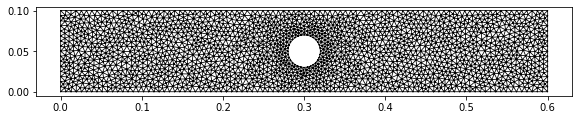

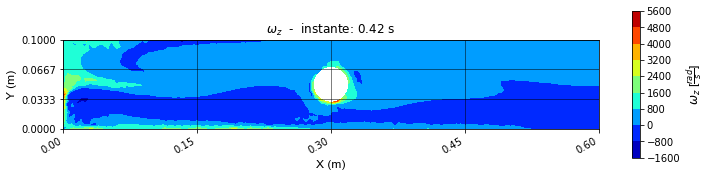

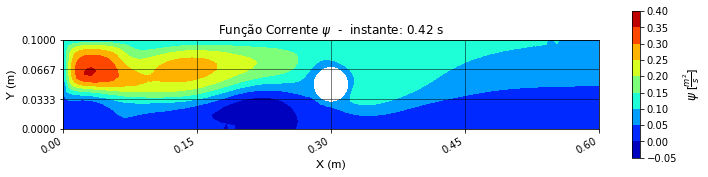

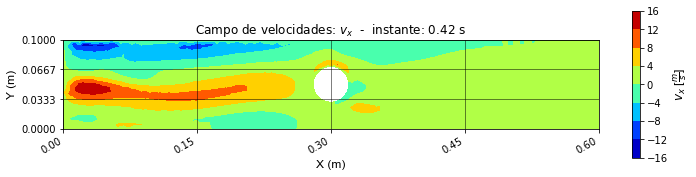

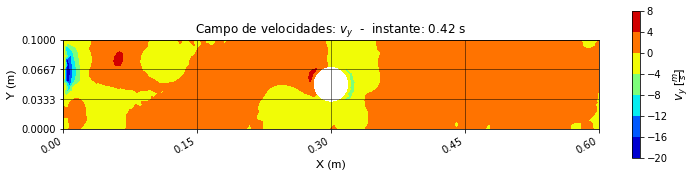

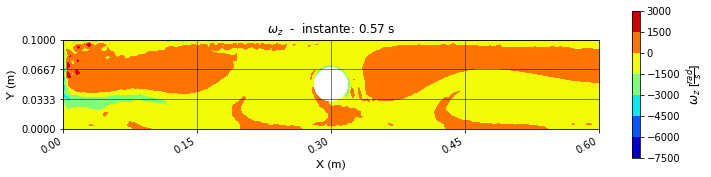

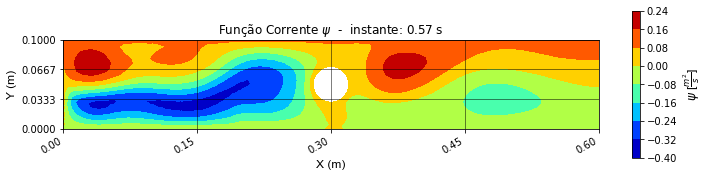

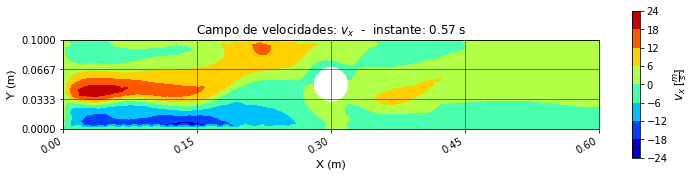

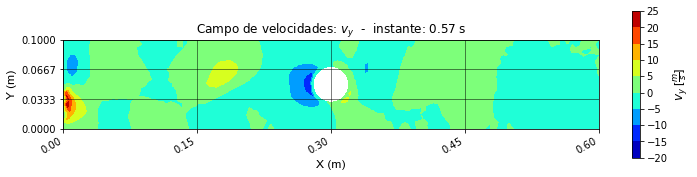

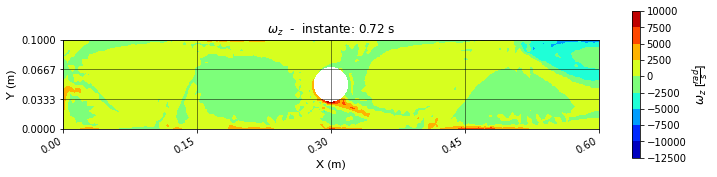

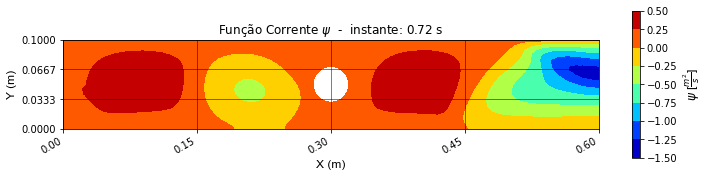

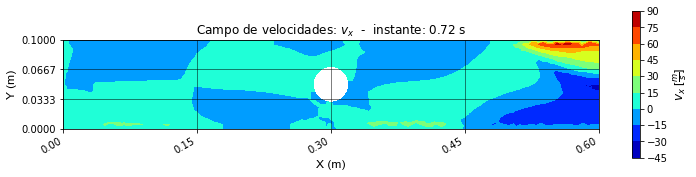

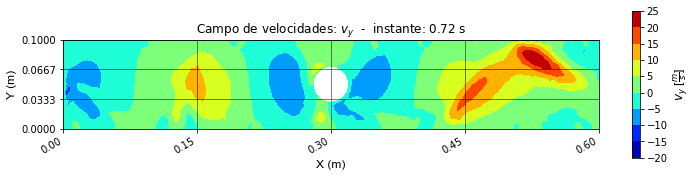

In [ ]:
#--------------------------------------------------
# Fonte dos gráficos
matplot_font = {'fontname': 'Arial',
                'color':  'black',
                'weight': 'normal',
                'size': 12,
                }

# Plotando malha

fig, ax = plt.subplots(figsize = (9.6,2.4))

triang = mtri.Triangulation(X,Y,IEN)
ax.set_aspect('equal')
ax.triplot(triang,'k-', linewidth=0.8)

# Plotando gráficos

for t in range(0,nt,int(nt/4)):
#for t in range(0,20,5):
    tempo = t*dt

    ## Vorticidade
    fig, ax0 = plt.subplots(figsize = (12,3))
 
    triang = mtri.Triangulation(X,Y,IEN)
    ax0.set_aspect('equal')
    ax0.tricontourf(triang,CampoVort[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)
    cbar = plt.colorbar(ax0.tricontourf(triang,CampoVort[:,t],cmap=cm.jet),shrink=1.0, aspect=20)

    cbar.set_label('$\omega_z$ [$\\frac{rad}{s}$]',fontdict=matplot_font)
    plt.title("$\omega_z$  -  instante: "+ str(round(tempo,2))+" s")
    plt.ylabel("Y (m)",fontdict=matplot_font) 
    plt.xlabel("X (m)",fontdict=matplot_font) 
    labx = np.linspace(X.min(),X.max(),5)
    laby = np.linspace(Y.min(),Y.max(),4)
    plt.grid(color='black', linestyle='solid', linewidth=0.5)
    plt.xticks(labx)
    plt.yticks(laby)
    plt.gcf().autofmt_xdate()
    
    ## PSI
    fig, ax1 = plt.subplots(figsize = (12,3))

    triang = mtri.Triangulation(X,Y,IEN)
    ax1.set_aspect('equal')
    ax1.tricontourf(triang,CampoPSI[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)
    cbar = plt.colorbar(ax1.tricontourf(triang,CampoPSI[:,t],cmap=cm.jet),shrink=1.0, aspect=20)

    cbar.set_label('$\psi$ [$\\frac{m^2}{s}$]',fontdict=matplot_font)
    plt.title("Função Corrente $\psi$  -  instante: "+ str(round(tempo,2))+" s")
    plt.ylabel("Y (m)",fontdict=matplot_font) 
    plt.xlabel("X (m)",fontdict=matplot_font) 
    labx = np.linspace(X.min(),X.max(),5)
    laby = np.linspace(Y.min(),Y.max(),4)
    plt.grid(color='black', linestyle='solid', linewidth=0.5)
    plt.xticks(labx)
    plt.yticks(laby)
    plt.gcf().autofmt_xdate()

    ## vx
    fig, ax2 = plt.subplots(figsize = (12,3))

    triang = mtri.Triangulation(X,Y,IEN)
    ax2.set_aspect('equal')
    ax2.tricontourf(triang,CampoVx[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)
    cbar = plt.colorbar(ax2.tricontourf(triang,CampoVx[:,t],cmap=cm.jet),shrink=1.0, aspect=20)

    cbar.set_label('$v_x$ [$\\frac{m}{s}$]',fontdict=matplot_font)
    plt.title("Campo de velocidades: $v_x$  -  instante: "+ str(round(tempo,2))+" s")
    plt.ylabel("Y (m)",fontdict=matplot_font) 
    plt.xlabel("X (m)",fontdict=matplot_font) 
    labx = np.linspace(X.min(),X.max(),5)
    laby = np.linspace(Y.min(),Y.max(),4)
    plt.grid(color='black', linestyle='solid', linewidth=0.5)
    plt.xticks(labx)
    plt.yticks(laby)
    plt.gcf().autofmt_xdate()

    ## vy
    fig, ax3 = plt.subplots(figsize = (12,3))

    triang = mtri.Triangulation(X,Y,IEN)
    ax3.set_aspect('equal')
    ax3.tricontourf(triang,CampoVy[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)
    cbar = plt.colorbar(ax3.tricontourf(triang,CampoVy[:,t],cmap=cm.jet),shrink=1.0, aspect=20)

    cbar.set_label('$v_y$ [$\\frac{m}{s}$]',fontdict=matplot_font)
    plt.title("Campo de velocidades: $v_y$  -  instante: "+ str(round(tempo,2))+" s")
    plt.ylabel("Y (m)",fontdict=matplot_font) 
    plt.xlabel("X (m)",fontdict=matplot_font) 
    labx = np.linspace(X.min(),X.max(),5)
    laby = np.linspace(Y.min(),Y.max(),4)
    plt.grid(color='black', linestyle='solid', linewidth=0.5)
    plt.xticks(labx)
    plt.yticks(laby)
    plt.gcf().autofmt_xdate()

    plt.show()

In [ ]:
# Criando diretório para armazenar solução

#Specify the folder in which results will be exported (mostly graphs)
workingDir = r"C:\Users\João Pedro\Downloads\ElementosFinitos"   #Notebook pessoal
#workingDir = r"C:\Users\jferreira\Downloads\ElementosFinitos"   #TechnipFMC
fileName = "Solucao_canal_3obstaculos_(0.10x0.60)_0.001_nu_0.01_dt_0.15_vxcc"
outputPath = workingDir + "\\" + fileName

if not os.path.exists(outputPath):
    os.mkdir(outputPath)
    print("Directory " , outputPath ,  " has been created ")
else:
    print("Directory " , outputPath ,  " already exists")

# Propriedades do fluido e domínio:

nu = 0.001

to = 0
tf = 6
dt = 0.01
nt = int((tf-to)/dt+1)

# leitura de malha e classificacao de contorno por nome (ccName)
mshname = 'Cilindros_3_refined.msh'
msh = meshio.read('./' + mshname)
print(msh)
X = np.array(msh.points[:,0])
Y = np.array(msh.points[:,1])
npoints = len(X)
IEN = msh.cells[1].data # triangles
ne = IEN.shape[0]
IENbound = msh.cells[0].data # lines
IENboundTypeElem = list(msh.cell_data['gmsh:physical'][0] - 9)
boundNames = list(msh.field_data.keys())
IENboundElem = [boundNames[elem] for elem in IENboundTypeElem]
####################################################################################
#O array IENboundTypeElem apresenta séries de números repetidos. Cada série de um número corresponde a um contorno e a quantidade de pontos nele.
#Ex.: 4 contornos, dois com 5 nós, dois com 3 nós: msh.cell_data['gmsh:physical'][0] será [4,4,4,4,4,5,5,5,6,6,6,6,6,7,7,7]
#O nº em série que vai representar cada contorno vai depender de como a entidade física é criada no gmsh. Pode haver, por ex., 5 contornos representados por 5,6,7,8,9
#Para tornar o loop que define o IENboundElem possível, é preciso que se subtraia esses números de forma que eles se tornem 0,1,2,3,4; por isso a subtração por 5 ali.
#Dessa forma, sempre teremos séries de 0, 1, 2, 3, 4 para associar aos nomes de cada contorno, estes por sua vez presentes em "boundaNames".
####################################################################################

# cria lista de nos do contorno
cc = np.unique(IENbound.reshape(IENbound.size))
ccName = [[] for i in range( len(X) )]

for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'Admissao':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'Exaustao':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'cilindro1':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'cilindro2':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'cilindro3':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'CCInferior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'CCSuperior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

IENbound = cc

# Definição dos vetores de condicoes de contorno para vx,vy e psi
vxcc = np.zeros( (npoints),dtype='float' )
vycc = np.zeros( (npoints),dtype='float' )
PSIcc = np.zeros( (npoints),dtype='float' )

for i in IENbound: 
 if ccName[i] == 'CCInferior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.0
 if ccName[i] == 'CCSuperior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 1.0
 if ccName[i] == 'Admissao':
  vxcc[i] = 0.15
  vycc[i] = 0.0
  PSIcc[i] = Y[i]
 if ccName[i] == 'cilindro1' or ccName[i] == 'cilindro2' or ccName[i] == 'cilindro3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.5

# inicializacao das matrizes globais
ne = IEN.shape[0]
K = np.zeros( (npoints,npoints),dtype='float' )
M = np.zeros( (npoints,npoints),dtype='float' )
Gx = np.zeros( (npoints,npoints),dtype='float' )
Gy = np.zeros( (npoints,npoints),dtype='float' )

for e in range(0,ne):
 v1,v2,v3 = IEN[e]

 # Calcula a área do triângulo
 area = 0.5*np.linalg.det([[1.0,X[v1],Y[v1]],
                           [1.0,X[v2],Y[v2]],
                           [1.0,X[v3],Y[v3]]])

 b1 = Y[v2]-Y[v3]
 b2 = Y[v3]-Y[v1]
 b3 = Y[v1]-Y[v2]
 
 c1 = X[v3]-X[v2]
 c2 = X[v1]-X[v3]
 c3 = X[v2]-X[v1]

 kxelem = np.array([[b1*b1,b1*b2,b1*b3],
                    [b2*b1,b2*b2,b2*b3],
                    [b3*b1,b3*b2,b3*b3]])
 kyelem = np.array([[c1*c1,c1*c2,c1*c3],
                    [c2*c1,c2*c2,c2*c3],
                    [c3*c1,c3*c2,c3*c3]])
 kelem = (1/(4*area))*kxelem + (1/(4*area))*kyelem

 melem = (area/12.0)*np.array([[2.0,1.0,1.0],
                               [1.0,2.0,1.0],
                               [1.0,1.0,2.0]])

 gxelem = (1/6)*np.array([[b1,b2,b3],
                          [b1,b2,b3],
                          [b1,b2,b3]])
 gyelem = (1/6)*np.array([[c1,c2,c3],
                          [c1,c2,c3],
                          [c1,c2,c3]])


 for ilocal in range(0,3):
  iglobal = IEN[e,ilocal]
  for jlocal in range(0,3):
   jglobal = IEN[e,jlocal]

   K[iglobal,jglobal] += kelem[ilocal,jlocal]
   M[iglobal,jglobal] += melem[ilocal,jlocal]
   Gx[iglobal,jglobal] += gxelem[ilocal,jlocal]
   Gy[iglobal,jglobal] += gyelem[ilocal,jlocal]


# condicao inicial de vx,vy (necessárias para cálculo da vorticidade)
vx = np.zeros( (npoints),dtype='float' )
vy = np.zeros( (npoints),dtype='float' )
PSI = np.zeros( (npoints),dtype='float' )

for i in IENbound:
 vx[i] = vxcc[i]
 vy[i] = vycc[i]

# Vorticidade nos contornos no instante inicial
vort_cc = np.linalg.solve(M,(Gx@vy - Gy@vx))
vort = vort_cc.copy()


# Gravando condições de contorno e iniciais da solução em .vtk
point_data = {'PSIcc' : PSIcc}
data_vxcc = {'vxcc' : vxcc}
data_vycc = {'vycc' : vycc}
data_vort_cc = {'vort_cc' : vort_cc}
point_data.update(data_vxcc)
point_data.update(data_vycc)
point_data.update(data_vort_cc)
meshio.write_points_cells(outputPath +'\\'+'condicaoDeContorno.vtk',
                           msh.points, 
                           msh.cells,
                           point_data=point_data,
                           )


CampoVort = np.empty((npoints,nt))
CampoPSI = np.empty((npoints,nt))
CampoVx = np.empty((npoints,nt))
CampoVy = np.empty((npoints,nt))


# Avanço no tempo
for n in range(0,nt):

 ## Solução do sistema linear para vorticidade

 ### Cálculo da condição de contorno da vorticidade (atualizando vorticidade nos contornos a cada iteração)
 vort_cc = np.linalg.solve(M,(Gx@vy - Gy@vx))

 ### Montagem da matriz A
 vx_diag = np.diag(vx)
 vy_diag = np.diag(vy)

 ### Montagem da matriz A e do vetor b de transporte de vorticidade
 A = M/dt + nu*K + vx_diag@Gx + vy_diag@Gy # implicito para conv e difusao
 b = (M/dt)@vort
 
 ### Condição de contorno para o sistema linear Ax=b
 for i in IENbound:
     if ccName[i] == 'CCSuperior' or \
         ccName[i] == 'CCInferior' or \
         ccName[i] == 'cilindro1' or \
         ccName[i] == 'cilindro2' or \
         ccName[i] == 'cilindro3' or \
         ccName[i] == 'Admissao':

         A[i,:] = 0.0 # zerando a linha
         A[i,i] = 1.0 # colocando 1 na diagonal
         b[i]   = vort_cc[i]

 ### Solução
 vort = np.linalg.solve(A,b)

 CampoVort[:,n] = vort

 ## Solução da Equação de Corrente-Vorticidade

 Apsi = K.copy()

 bpsi = M@vort

 ### Imposição das c.c.s de Dirichlet
 for i in IENbound:
     if ccName[i] == 'CCSuperior' or \
         ccName[i] == 'CCInferior' or \
         ccName[i] == 'cilindro1' or \
         ccName[i] == 'cilindro2' or \
         ccName[i] == 'cilindro3' or \
         ccName[i] == 'Admissao':
         
         Apsi[i,:] = 0.0 # zerando a linha
         Apsi[i,i] = 1.0 # colocando 1 na diagonal
         bpsi[i]   = PSIcc[i]

 ### Solução
 PSI = np.linalg.solve(Apsi,bpsi)

 CampoPSI[:,n] = PSI

 ## Obtendo campo de velocidades a partir da função corrrente

 vx = np.linalg.solve(M,Gy@PSI)
 vy = np.linalg.solve(M,-Gx@PSI)
 
 
 for i in IENbound:
     if ccName[i] == 'CCSuperior' or \
         ccName[i] == 'CCInferior' or \
         ccName[i] == 'cilindro1' or \
         ccName[i] == 'cilindro2' or \
         ccName[i] == 'cilindro3' or \
         ccName[i] == 'Admissao':
         vx[i] = vxcc[i]
         vy[i] = vycc[i]

 CampoVx[:,n] = vx
 CampoVy[:,n] = vy


 # Gravando solução em .vtk
 print ("... gravando em VTK passo de tempo: " + str(n))
 
 point_data = {'psi' : PSI}
 data_vx = {'vx' : vx}
 data_vy = {'vy' : vy}
 data_vort = {'$\omega_z$' : vort}
 point_data.update(data_vx)
 point_data.update(data_vy)
 point_data.update(data_vort)
 meshio.write_points_cells(outputPath +'\\'+'solucao-'+str(n)+'.vtk',
                            msh.points, 
                            msh.cells,
                            point_data=point_data,
                            )
 

#### Reiniciar simulação

Estabelecendo instante inicial:

In [ ]:
n0 = n
print('Instante inicial: '+str(n0))

vortRestart = CampoVort[:,n-1]
PSIRestart = CampoPSI[:,n-1]
vxRestart = CampoVx[:,n-1]
vyRestart = CampoVy[:,n-1]

11


In [ ]:
# Criando diretório para armazenar solução

# Specify the folder in which results will be exported (mostly graphs)
#workingDir = r"C:\Users\João Pedro\Downloads\ElementosFinitos"   #Notebook pessoal
workingDir = r"C:\Users\jferreira\Downloads\ElementosFinitos"   #TechnipFMC
fileName = "Solucao_canal_3obstaculos_(0.10x0.60)_0.001_nu_0.01_dt_0.15_vxcc"
outputPath = workingDir + "\\" + fileName

if not os.path.exists(outputPath):
    os.mkdir(outputPath)
    print("Directory " , outputPath ,  " has been created ")
else:
    print("Directory " , outputPath ,  " already exists")

# Propriedades do fluido e domínio:

nu = 0.001

to = 0
tf = 6
dt = 0.01
nt = int((tf-to)/dt+1)

# leitura de malha e classificacao de contorno por nome (ccName)
mshname = 'Cilindros_3_refined.msh'
msh = meshio.read('./' + mshname)
print(msh)
X = np.array(msh.points[:,0])
Y = np.array(msh.points[:,1])
npoints = len(X)
IEN = msh.cells[1].data # triangles
ne = IEN.shape[0]
IENbound = msh.cells[0].data # lines
IENboundTypeElem = list(msh.cell_data['gmsh:physical'][0] - 9)
boundNames = list(msh.field_data.keys())
IENboundElem = [boundNames[elem] for elem in IENboundTypeElem]
####################################################################################
#O array IENboundTypeElem apresenta séries de números repetidos. Cada série de um número corresponde a um contorno e a quantidade de pontos nele.
#Ex.: 4 contornos, dois com 5 nós, dois com 3 nós: msh.cell_data['gmsh:physical'][0] será [4,4,4,4,4,5,5,5,6,6,6,6,6,7,7,7]
#O nº em série que vai representar cada contorno vai depender de como a entidade física é criada no gmsh. Pode haver, por ex., 5 contornos representados por 5,6,7,8,9
#Para tornar o loop que define o IENboundElem possível, é preciso que se subtraia esses números de forma que eles se tornem 0,1,2,3,4; por isso a subtração por 5 ali.
#Dessa forma, sempre teremos séries de 0, 1, 2, 3, 4 para associar aos nomes de cada contorno, estes por sua vez presentes em "boundaNames".
####################################################################################

# cria lista de nos do contorno
cc = np.unique(IENbound.reshape(IENbound.size))
ccName = [[] for i in range( len(X) )]

for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'Admissao':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'Exaustao':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'cilindro1':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'cilindro2':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'cilindro3':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'CCInferior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'CCSuperior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

IENbound = cc

# Definição dos vetores de condicoes de contorno para vx,vy e psi
vxcc = np.zeros( (npoints),dtype='float' )
vycc = np.zeros( (npoints),dtype='float' )
PSIcc = np.zeros( (npoints),dtype='float' )

for i in IENbound: 
 if ccName[i] == 'CCInferior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.0
 if ccName[i] == 'CCSuperior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 1.0
 if ccName[i] == 'Admissao':
  vxcc[i] = 0.15
  vycc[i] = 0.0
  PSIcc[i] = Y[i]
 if ccName[i] == 'cilindro1' or ccName[i] == 'cilindro2' or ccName[i] == 'cilindro3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.5


# inicializacao das matrizes globais
ne = IEN.shape[0]
K = np.zeros( (npoints,npoints),dtype='float' )
M = np.zeros( (npoints,npoints),dtype='float' )
Gx = np.zeros( (npoints,npoints),dtype='float' )
Gy = np.zeros( (npoints,npoints),dtype='float' )

for e in range(0,ne):
 v1,v2,v3 = IEN[e]

 # Calcula a área do triângulo
 area = 0.5*np.linalg.det([[1.0,X[v1],Y[v1]],
                           [1.0,X[v2],Y[v2]],
                           [1.0,X[v3],Y[v3]]])

 b1 = Y[v2]-Y[v3]
 b2 = Y[v3]-Y[v1]
 b3 = Y[v1]-Y[v2]
 
 c1 = X[v3]-X[v2]
 c2 = X[v1]-X[v3]
 c3 = X[v2]-X[v1]

 kxelem = np.array([[b1*b1,b1*b2,b1*b3],
                    [b2*b1,b2*b2,b2*b3],
                    [b3*b1,b3*b2,b3*b3]])
 kyelem = np.array([[c1*c1,c1*c2,c1*c3],
                    [c2*c1,c2*c2,c2*c3],
                    [c3*c1,c3*c2,c3*c3]])
 kelem = (1/(4*area))*kxelem + (1/(4*area))*kyelem

 melem = (area/12.0)*np.array([[2.0,1.0,1.0],
                               [1.0,2.0,1.0],
                               [1.0,1.0,2.0]])

 gxelem = (1/6)*np.array([[b1,b2,b3],
                          [b1,b2,b3],
                          [b1,b2,b3]])
 gyelem = (1/6)*np.array([[c1,c2,c3],
                          [c1,c2,c3],
                          [c1,c2,c3]])


 for ilocal in range(0,3):
  iglobal = IEN[e,ilocal]
  for jlocal in range(0,3):
   jglobal = IEN[e,jlocal]

   K[iglobal,jglobal] += kelem[ilocal,jlocal]
   M[iglobal,jglobal] += melem[ilocal,jlocal]
   Gx[iglobal,jglobal] += gxelem[ilocal,jlocal]
   Gy[iglobal,jglobal] += gyelem[ilocal,jlocal]


# condicao inicial de vx,vy (necessárias para cálculo da vorticidade)
vx = vxRestart
vy = vyRestart
PSI = PSIRestart

# Vorticidade nos contornos no instante inicial
vort = vortRestart


CampoVort = np.empty((npoints,nt-n0))
CampoPSI = np.empty((npoints,nt-n0))
CampoVx = np.empty((npoints,nt-n0))
CampoVy = np.empty((npoints,nt-n0))


# Avanço no tempo
for n in range(n0,nt):

 ## Solução do sistema linear para vorticidade

 ### Cálculo da condição de contorno da vorticidade (atualizando vorticidade nos contornos a cada iteração)
 vort_cc = np.linalg.solve(M,(Gx@vy - Gy@vx))

 ### Montagem da matriz A
 vx_diag = np.diag(vx)
 vy_diag = np.diag(vy)

 ### Montagem da matriz A e do vetor b de transporte de vorticidade
 A = M/dt + nu*K + vx_diag@Gx + vy_diag@Gy # implicito para conv e difusao
 b = (M/dt)@vort
 
 ### Condição de contorno para o sistema linear Ax=b
 for i in IENbound:
     if ccName[i] == 'CCSuperior' or \
         ccName[i] == 'CCInferior' or \
         ccName[i] == 'cilindro1' or \
         ccName[i] == 'cilindro2' or \
         ccName[i] == 'cilindro3' or \
         ccName[i] == 'Admissao':

         A[i,:] = 0.0 # zerando a linha
         A[i,i] = 1.0 # colocando 1 na diagonal
         b[i]   = vort_cc[i]

 ### Solução
 vort = np.linalg.solve(A,b)

 CampoVort[:,n-n0] = vort

 ## Solução da Equação de Corrente-Vorticidade

 Apsi = K.copy()

 bpsi = M@vort

 ### Imposição das c.c.s de Dirichlet
 for i in IENbound:
     if ccName[i] == 'CCSuperior' or \
         ccName[i] == 'CCInferior' or \
         ccName[i] == 'cilindro1' or \
         ccName[i] == 'cilindro2' or \
         ccName[i] == 'cilindro3' or \
         ccName[i] == 'Admissao':
         
         Apsi[i,:] = 0.0 # zerando a linha
         Apsi[i,i] = 1.0 # colocando 1 na diagonal
         bpsi[i]   = PSIcc[i]

 ### Solução
 PSI = np.linalg.solve(Apsi,bpsi)

 CampoPSI[:,n-n0] = PSI

 ## Obtendo campo de velocidades a partir da função corrrente

 vx = np.linalg.solve(M,Gy@PSI)
 vy = np.linalg.solve(M,-Gx@PSI)
 
 
 for i in IENbound:
     if ccName[i] == 'CCSuperior' or \
         ccName[i] == 'CCInferior' or \
         ccName[i] == 'cilindro1' or \
         ccName[i] == 'cilindro2' or \
         ccName[i] == 'cilindro3' or \
         ccName[i] == 'Admissao':
         vx[i] = vxcc[i]
         vy[i] = vycc[i]

 CampoVx[:,n-n0] = vx
 CampoVy[:,n-n0] = vy


# Gravando solução em .vtk
 print ("... gravando em VTK passo de tempo: " + str(n))
 point_data = {'psi' : PSI}
 data_vx = {'vx' : vx}
 data_vy = {'vy' : vy}
 data_vort = {'omega_z' : vort}
 point_data.update(data_vx)
 point_data.update(data_vy)
 point_data.update(data_vort)
 meshio.write_points_cells(outputPath +'\\'+'solucao-'+str(n)+'.vtk',
                           msh.points, 
                           msh.cells,
                           point_data=point_data,
                           )

## Domínio: meio poroso local

#### Galerkin com incremento variável

In [ ]:
# Criando diretório para armazenar solução

# Specify the folder in which results will be exported (mostly graphs)
#workingDir = r"C:\Users\João Pedro\Downloads\ElementosFinitos"   #Notebook pessoal
workingDir = r"C:\Users\jferreira\Downloads\ElementosFinitos"   #TechnipFMC
fileName = "Sol_DPF_Local_(1.12e-3x1.44e-3)_5x4_obstaculos_3.2e-5&1.2e-5_mesh_24k_elem_1.6e-4_D_1e-7_nu_0.001_varyingdt_0.025_vycc_20_Re_IV"
outputPath = workingDir + "\\" + fileName

if not os.path.exists(outputPath):
    os.mkdir(outputPath)
    print("Directory " , outputPath ,  " has been created ")
else:
    print("Directory " , outputPath ,  " already exists")

# Propriedades do fluido e domínio:

nu = 1.0*10**(-7)
uy = 0.025
to = 0.0
tf = 1.0
dts = [0.001,0.00125,0.0015,0.00175,0.002,0.002,0.002]

t0 = dts[0]*30
t1 = dts[1]*2
t2 = dts[2]*2
t3 = dts[3]*2
t4 = dts[4]*2
t5 = dts[5]*2
t6 = tf - (t5+t4+t3+t2+t1+t0)

nt0 = 30
nt1 = 2
nt2 = 2
nt3 = 2
nt4 = 2
nt5 = 2
nt6 = int(t6/dts[6]+1)
nt = nt0 + nt1 + nt2 + nt3 + nt4 + nt5 + nt6

# leitura de malha e classificacao de contorno por nome (ccName)
mshname = 'DPF_Local_(1.12e-3x1.44e-3)_5x4_obstaculos_3.2e-5&1.2e-5_mesh_24k_elem_1.6e-4_D.msh'
msh = meshio.read('./' + mshname)
print(msh)
X = np.array(msh.points[:,0])
Y = np.array(msh.points[:,1])
npoints = len(X)
IEN = msh.cells[1].data # triangles
ne = IEN.shape[0]
IENbound = msh.cells[0].data # lines
IENboundTypeElem = list(msh.cell_data['gmsh:physical'][0] - 1)
boundNames = list(msh.field_data.keys())
IENboundElem = [boundNames[elem] for elem in IENboundTypeElem]
####################################################################################
#O array IENboundTypeElem apresenta séries de números repetidos. Cada série de um número corresponde a um contorno e a quantidade de pontos nele.
#Ex.: 4 contornos, dois com 5 nós, dois com 3 nós: msh.cell_data['gmsh:physical'][0] será [4,4,4,4,4,5,5,5,6,6,6,6,6,7,7,7]
#O nº em série que vai representar cada contorno vai depender de como a entidade física é criada no gmsh. Pode haver, por ex., 5 contornos representados por 5,6,7,8,9
#Para tornar o loop que define o IENboundElem possível, é preciso que se subtraia esses números de forma que eles se tornem 0,1,2,3,4; por isso a subtração por 5 ali.
#Dessa forma, sempre teremos séries de 0, 1, 2, 3, 4 para associar aos nomes de cada contorno, estes por sua vez presentes em "boundaNames".
####################################################################################

# cria lista de nos do contorno
cc = np.unique(IENbound.reshape(IENbound.size))
ccName = [[] for i in range( len(X) )]

for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'esquerda':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'direita':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'inferior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'superior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo1':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo2':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo3':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo4':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo5':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

IENbound = cc

# Definição dos vetores de condicoes de contorno para vx,vy e psi
vxcc = np.zeros( (npoints),dtype='float' )
vycc = np.zeros( (npoints),dtype='float' )
PSIcc = np.zeros( (npoints),dtype='float' )

for i in IENbound: 
 if ccName[i] == 'inferior':
  vxcc[i] = 0.0
  vycc[i] = uy
  PSIcc[i] = -uy*X[i]
 if ccName[i] == 'esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0
 if ccName[i] == 'direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00144
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00024
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00048
 if ccName[i] == 'obstaculo3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00072
 if ccName[i] == 'obstaculo4':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00096
 if ccName[i] == 'obstaculo5':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00120

# condicao inicial de vx,vy (necessárias para cálculo da vorticidade)    (Agora antes da inicialização das matrizes, pois Kest usa a média das velocidades de cada elemento)
vx = np.zeros( (npoints),dtype='float' )
vy = np.zeros( (npoints),dtype='float' )
PSI = np.zeros( (npoints),dtype='float' )

for i in IENbound:
 vx[i] = vxcc[i]
 vy[i] = vycc[i]


# inicializacao das matrizes globais
ne = IEN.shape[0]
K = np.empty( (npoints,npoints),dtype='float' )
M = np.empty( (npoints,npoints),dtype='float' )
Gx = np.empty( (npoints,npoints),dtype='float' )
Gy = np.empty( (npoints,npoints),dtype='float' )

for e in range(0,ne):
 v1,v2,v3 = IEN[e]

 # Calcula a área do triângulo
 area = 0.5*np.linalg.det([[1.0,X[v1],Y[v1]],
                           [1.0,X[v2],Y[v2]],
                           [1.0,X[v3],Y[v3]]])

 b1 = Y[v2]-Y[v3]
 b2 = Y[v3]-Y[v1]
 b3 = Y[v1]-Y[v2]
 
 c1 = X[v3]-X[v2]
 c2 = X[v1]-X[v3]
 c3 = X[v2]-X[v1]

 kxelem = np.array([[b1*b1,b1*b2,b1*b3],
                    [b2*b1,b2*b2,b2*b3],
                    [b3*b1,b3*b2,b3*b3]])
 kyelem = np.array([[c1*c1,c1*c2,c1*c3],
                    [c2*c1,c2*c2,c2*c3],
                    [c3*c1,c3*c2,c3*c3]])
 
 kelem = (1/(4*area))*kxelem + (1/(4*area))*kyelem 

 melem = (area/12.0)*np.array([[2.0,1.0,1.0],
                               [1.0,2.0,1.0],
                               [1.0,1.0,2.0]])

 gxelem = (1/6)*np.array([[b1,b2,b3],
                          [b1,b2,b3],
                          [b1,b2,b3]])
 gyelem = (1/6)*np.array([[c1,c2,c3],
                          [c1,c2,c3],
                          [c1,c2,c3]])


 for ilocal in range(0,3):
  iglobal = IEN[e,ilocal]
  for jlocal in range(0,3):
   jglobal = IEN[e,jlocal]

   K[iglobal,jglobal] += kelem[ilocal,jlocal]
   M[iglobal,jglobal] += melem[ilocal,jlocal]
   Gx[iglobal,jglobal] += gxelem[ilocal,jlocal]
   Gy[iglobal,jglobal] += gyelem[ilocal,jlocal]
   

# Vorticidade nos contornos no instante inicial
cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
vort_cc = sp.sparse.linalg.spsolve(cscM,(Gx@vy - Gy@vx))
vort = vort_cc.copy()

# Gravando condições de contorno e iniciais da solução em .vtk
point_data = {'PSIcc' : PSIcc}
data_vxcc = {'vxcc' : vxcc}
data_vycc = {'vycc' : vycc}
data_vort_cc = {'vort_cc' : vort_cc}
point_data.update(data_vxcc)
point_data.update(data_vycc)
point_data.update(data_vort_cc)
meshio.write_points_cells(outputPath +'\\'+'condicaoDeContorno.vtk',
                           msh.points, 
                           msh.cells,
                           point_data=point_data,
                           )


CampoVort = np.empty((npoints,nt))
CampoPSI = np.empty((npoints,nt))
CampoVx = np.empty((npoints,nt))
CampoVy = np.empty((npoints,nt))

tempo = 0.0
dt = 0.0

# Avanço no tempo
for n in range(0,nt):
 
 if n < nt0:
   dt = dts[0]

 elif nt0 <= n < nt0+nt1:
   dt = dts[1]

 elif nt0+nt1 <= n < nt0+nt1+nt2:
   dt = dts[2]

 elif nt0+nt1+nt2 <= n < nt0+nt1+nt2+nt3:
   dt = dts[3]

 elif nt0+nt1+nt2+nt3 <= n < nt0+nt1+nt2+nt3+nt4:
   dt = dts[4]

 elif nt0+nt1+nt2+nt3+nt4 <= n < nt0+nt1+nt2+nt3+nt4+nt5:
   dt = dts[5]

 elif n >= nt0+nt1+nt2+nt3+nt4+nt5:
   dt = dts[6]

 ## Solução do sistema linear para vorticidade

 ### Cálculo da condição de contorno da vorticidade (atualizando vorticidade nos contornos a cada iteração)
 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vort_cc = sp.sparse.linalg.spsolve(cscM,(Gx@vy - Gy@vx))

 ### Montagem da matriz A
 vx_diag = np.diag(vx)
 vy_diag = np.diag(vy)

 ### Montagem da matriz A e do vetor b de transporte de vorticidade
 A = M/dt + nu*K + vx_diag@Gx + vy_diag@Gy # implicito para conv e difusao
 b = (M/dt)@vort
 
 ### Condição de contorno para o sistema linear Ax=b
 for i in IENbound:
     if ccName[i] == 'inferior' or \
        ccName[i] == 'direita' or \
        ccName[i] == 'esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4' or \
        ccName[i] == 'obstaculo5':
         A[i,:] = 0.0 # zerando a linha
         A[i,i] = 1.0 # colocando 1 na diagonal
         b[i]   = vort_cc[i]

 ### Solução
 cscA = sp.sparse.csc_matrix(A)   # Matrix form that improves sparse.linalg.solve
 vort = sp.sparse.linalg.spsolve(cscA,b)

 CampoVort[:,n] = vort

 ## Solução da Equação de Corrente-Vorticidade

 Apsi = K.copy()

 bpsi = M@vort

 ### Imposição das c.c.s de Dirichlet
 for i in IENbound:
     if ccName[i] == 'inferior' or \
        ccName[i] == 'direita' or \
        ccName[i] == 'esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4' or \
        ccName[i] == 'obstaculo5':
         Apsi[i,:] = 0.0 # zerando a linha
         Apsi[i,i] = 1.0 # colocando 1 na diagonal
         bpsi[i]   = PSIcc[i]

 ### Solução
 cscApsi = sp.sparse.csc_matrix(Apsi)   # Matrix form that improves sparse.linalg.solve
 PSI = sp.sparse.linalg.spsolve(cscApsi,bpsi)

 CampoPSI[:,n] = PSI

 ## Obtendo campo de velocidades a partir da função corrrente

 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vx = sp.sparse.linalg.spsolve(cscM,Gy@PSI)
 vy = sp.sparse.linalg.spsolve(cscM,-Gx@PSI)
 
 for i in IENbound:
     if ccName[i] == 'inferior' or \
        ccName[i] == 'direita' or \
        ccName[i] == 'esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4' or \
        ccName[i] == 'obstaculo5':
         vx[i] = vxcc[i]
         vy[i] = vycc[i]

 CampoVx[:,n] = vx
 CampoVy[:,n] = vy


 # Alerta de divergência
 #Dvort = max(CampoVort[:,-1]) - max(CampoVort[:,-2])

 #if Dvort > 10000:
   #print("WARNING: Running is not converging.")

 # Passagem de tempo
 tempo = tempo + dt

 # Gravando solução em .vtk
 print ("... gravando em VTK passo de tempo: " + str(np.around(tempo,4)))
 point_data = {'psi' : PSI}
 data_vx = {'vx' : vx}
 data_vy = {'vy' : vy}
 data_vort = {'omega_z' : vort}
 point_data.update(data_vx)
 point_data.update(data_vy)
 point_data.update(data_vort)
 meshio.write_points_cells(outputPath +'\\'+'solucao-'+str(np.around(tempo,4))+'.vtk',
                            msh.points, 
                            msh.cells,
                            point_data=point_data,
                            )

#### Galerkin

##### Coordenadas das colunas de obstáculos

In [ ]:
############### DPF_Local_(1.12e-3x1.2e-3)_4X4 OBTASCULOS

for i in IENbound: 
 if ccName[i] == 'inferior':
  vxcc[i] = 0.0
  vycc[i] = uy
  PSIcc[i] = -uy*X[i]
 if ccName[i] == 'esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0
 if ccName[i] == 'direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00120
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00024
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00048
 if ccName[i] == 'obstaculo3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00072
 if ccName[i] == 'obstaculo4':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00096

###############CIRCULAR - 5X4 OBTASCULOS

for i in IENbound: 
 if ccName[i] == 'inferior':
  vxcc[i] = 0.0
  vycc[i] = uy
  PSIcc[i] = -uy*X[i]
 if ccName[i] == 'esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0
 if ccName[i] == 'direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00144
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00024
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00048
 if ccName[i] == 'obstaculo3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00072
 if ccName[i] == 'obstaculo4':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00096
 if ccName[i] == 'obstaculo5':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00120

###############DPFeliptico_DelgadoAlternado_(1.12e-3x1.92e-3)_5X4 OBTASCULOS

for i in IENbound: 
 if ccName[i] == 'inferior':
  vxcc[i] = 0.0
  vycc[i] = uy
  PSIcc[i] = -uy*X[i]
 if ccName[i] == 'esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0
 if ccName[i] == 'direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00192
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00024
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00060
 if ccName[i] == 'obstaculo3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00096
 if ccName[i] == 'obstaculo4':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00132
 if ccName[i] == 'obstaculo5':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00168

###############DPFeliptico_DelgadoAlternado_(1.12e-3x1.56e-3)_4X4 OBTASCULOS

for i in IENbound: 
 if ccName[i] == 'inferior':
  vxcc[i] = 0.0
  vycc[i] = uy
  PSIcc[i] = -uy*X[i]
 if ccName[i] == 'esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0
 if ccName[i] == 'direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00156
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00024
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00060
 if ccName[i] == 'obstaculo3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00096
 if ccName[i] == 'obstaculo4':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00132

###############DPFeliptico_Local_(1.3e-3x1.7-3)_4X4 OBTASCULOS

for i in IENbound: 
 if ccName[i] == 'inferior':
  vxcc[i] = 0.0
  vycc[i] = uy
  PSIcc[i] = -uy*X[i]
 if ccName[i] == 'esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0
 if ccName[i] == 'direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0017
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0004
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0007
 if ccName[i] == 'obstaculo3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0010
 if ccName[i] == 'obstaculo4':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0013

###############DPFeliptico_DelgadoHorizontalVariando_(1.00e-3x2.31e-3)_4X4 OBTASCULOS

for i in IENbound: 
 if ccName[i] == 'inferior':
  vxcc[i] = 0.0
  vycc[i] = uy
  PSIcc[i] = -uy*X[i]
 if ccName[i] == 'esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0
 if ccName[i] == 'direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00231
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00048
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00093
 if ccName[i] == 'obstaculo3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00138
 if ccName[i] == 'obstaculo4':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00183

###############DPFeliptico_DelgadoHorizontal_(0.70e-3x2.55e-3)_4X4 OBTASCULOS

for i in IENbound: 
 if ccName[i] == 'inferior':
  vxcc[i] = 0.0
  vycc[i] = uy
  PSIcc[i] = -uy*X[i]
 if ccName[i] == 'esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0
 if ccName[i] == 'direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00255
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00060
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00105
 if ccName[i] == 'obstaculo3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00150
 if ccName[i] == 'obstaculo4':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00195

###############DPFeliptico_DelgadoVertical_(1.05e-3x1.00e-3)_4X4 OBTASCULOS

for i in IENbound: 
 if ccName[i] == 'inferior':
  vxcc[i] = 0.0
  vycc[i] = uy
  PSIcc[i] = -uy*X[i]
 if ccName[i] == 'esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0
 if ccName[i] == 'direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.001
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0002
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0004
 if ccName[i] == 'obstaculo3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0006
 if ccName[i] == 'obstaculo4':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0008

###############DPFeliptico_DelgadoVertical_(1.05e-3x0.85e-3)_4X4 OBTASCULOS

for i in IENbound: 
 if ccName[i] == 'inferior':
  vxcc[i] = 0.0
  vycc[i] = uy
  PSIcc[i] = -uy*X[i]
 if ccName[i] == 'esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0
 if ccName[i] == 'direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00085
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00020
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00035
 if ccName[i] == 'obstaculo3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00050
 if ccName[i] == 'obstaculo4':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00065

###############DPFeliptico_DelgadoVertical_(1.05e-3x0.50e-3)_2X4 OBTASCULOS

for i in IENbound: 
 if ccName[i] == 'inferior':
  vxcc[i] = 0.0
  vycc[i] = uy
  PSIcc[i] = -uy*X[i]
 if ccName[i] == 'esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0
 if ccName[i] == 'direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0005
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00015
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00035

###############DPFeliptico_DelgadoHorizontal_(0.70e-3x1.20e-3)_2X4 OBTASCULOS

for i in IENbound: 
 if ccName[i] == 'inferior':
  vxcc[i] = 0.0
  vycc[i] = uy
  PSIcc[i] = -uy*X[i]
 if ccName[i] == 'esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0
 if ccName[i] == 'direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0012
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.000375
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.000825

##### DPF elíptico delgado vertical 2x4: 1e-7_nu_0.001_dt_0.06_vycc_1.0e-4_L_60_Re_1.67_R

In [2]:
# Criando diretório para armazenar solução

# Specify the folder in which results will be exported (mostly graphs)
#workingDir = r"C:\Users\João Pedro\Downloads\ElementosFinitos"   #Notebook pessoal
workingDir = r"C:\Users\jferreira\Downloads\ElementosFinitos"   #TechnipFMC
fileName = "Sol_DPF_Local_(1.7e-3x1.3e-3)_4x4_obstaculos_4.0e-5&1.25e-5_mesh_25k_elem_2.0e-4_D_1.0e-4_L_1e-7_nu_0.001_dt_0.025_vycc_25_Re_4_R"
outputPath = workingDir + "\\" + fileName

if not os.path.exists(outputPath):
    os.mkdir(outputPath)
    print("Directory " , outputPath ,  " has been created ")
else:
    print("Directory " , outputPath ,  " already exists")

# Propriedades do fluido e domínio:

nu = 1.0*10**(-7)
uy = 0.025
to = 0.0
tf = 0.2
dt = 0.001
nt = int((tf-to)/dt+1)

Lc = 1.0*10**(-4) 
print("Comprimento característico do escoamento: {} ".format(np.around(Lc, 6)))
print("Deslocamento em um incremento no tempo: {} ".format(np.around(uy*dt, 6)))
print("Razão: {} ".format(np.around(Lc/(uy*dt), 2)))

# leitura de malha e classificacao de contorno por nome (ccName)
mshname = 'DPF_Local_(1.7e-3x1.3e-3)_4x4_obstaculos_4.0e-5&1.25e-5_mesh_25k_elem_2.0e-4_D_1.0e-4_L.msh'
msh = meshio.read('./' + mshname)
print(msh)
X = np.array(msh.points[:,0])
Y = np.array(msh.points[:,1])
npoints = len(X)
IEN = msh.cells[1].data # triangles
ne = IEN.shape[0]
IENbound = msh.cells[0].data # lines
IENboundTypeElem = list(msh.cell_data['gmsh:physical'][0] - 1)
boundNames = list(msh.field_data.keys())
IENboundElem = [boundNames[elem] for elem in IENboundTypeElem]
####################################################################################
#O array IENboundTypeElem apresenta séries de números repetidos. Cada série de um número corresponde a um contorno e a quantidade de pontos nele.
#Ex.: 4 contornos, dois com 5 nós, dois com 3 nós: msh.cell_data['gmsh:physical'][0] será [4,4,4,4,4,5,5,5,6,6,6,6,6,7,7,7]
#O nº em série que vai representar cada contorno vai depender de como a entidade física é criada no gmsh. Pode haver, por ex., 5 contornos representados por 5,6,7,8,9
#Para tornar o loop que define o IENboundElem possível, é preciso que se subtraia esses números de forma que eles se tornem 0,1,2,3,4; por isso a subtração por 5 ali.
#Dessa forma, sempre teremos séries de 0, 1, 2, 3, 4 para associar aos nomes de cada contorno, estes por sua vez presentes em "boundaNames".
####################################################################################

# cria lista de nos do contorno
cc = np.unique(IENbound.reshape(IENbound.size))
ccName = [[] for i in range( len(X) )]

for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'esquerda':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'direita':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'inferior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'superior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo1':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo2':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo3':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo4':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

IENbound = cc

# Definição dos vetores de condicoes de contorno para vx,vy e psi
vxcc = np.zeros( (npoints),dtype='float' )
vycc = np.zeros( (npoints),dtype='float' )
PSIcc = np.zeros( (npoints),dtype='float' )

for i in IENbound: 
 if ccName[i] == 'inferior':
  vxcc[i] = 0.0
  vycc[i] = uy
  PSIcc[i] = -uy*X[i]
 if ccName[i] == 'esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0
 if ccName[i] == 'direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0017
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0004
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0007
 if ccName[i] == 'obstaculo3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0010
 if ccName[i] == 'obstaculo4':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0013
  
# condicao inicial de vx,vy (necessárias para cálculo da vorticidade)    (Agora antes da inicialização das matrizes, pois Kest usa a média das velocidades de cada elemento)
vx = np.zeros( (npoints),dtype='float' )
vy = np.zeros( (npoints),dtype='float' )
PSI = np.zeros( (npoints),dtype='float' )

for i in IENbound:
 vx[i] = vxcc[i]
 vy[i] = vycc[i]


# inicializacao das matrizes globais
ne = IEN.shape[0]
K = np.empty( (npoints,npoints),dtype='float' )
M = np.empty( (npoints,npoints),dtype='float' )
Gx = np.empty( (npoints,npoints),dtype='float' )
Gy = np.empty( (npoints,npoints),dtype='float' )

for e in range(0,ne):
 v1,v2,v3 = IEN[e]

 # Calcula a área do triângulo
 area = 0.5*np.linalg.det([[1.0,X[v1],Y[v1]],
                           [1.0,X[v2],Y[v2]],
                           [1.0,X[v3],Y[v3]]])

 b1 = Y[v2]-Y[v3]
 b2 = Y[v3]-Y[v1]
 b3 = Y[v1]-Y[v2]
 
 c1 = X[v3]-X[v2]
 c2 = X[v1]-X[v3]
 c3 = X[v2]-X[v1]

 kxelem = np.array([[b1*b1,b1*b2,b1*b3],
                    [b2*b1,b2*b2,b2*b3],
                    [b3*b1,b3*b2,b3*b3]])
 kyelem = np.array([[c1*c1,c1*c2,c1*c3],
                    [c2*c1,c2*c2,c2*c3],
                    [c3*c1,c3*c2,c3*c3]])
 
 kelem = (1/(4*area))*kxelem + (1/(4*area))*kyelem 

 melem = (area/12.0)*np.array([[2.0,1.0,1.0],
                               [1.0,2.0,1.0],
                               [1.0,1.0,2.0]])

 gxelem = (1/6)*np.array([[b1,b2,b3],
                          [b1,b2,b3],
                          [b1,b2,b3]])
 gyelem = (1/6)*np.array([[c1,c2,c3],
                          [c1,c2,c3],
                          [c1,c2,c3]])


 for ilocal in range(0,3):
  iglobal = IEN[e,ilocal]
  for jlocal in range(0,3):
   jglobal = IEN[e,jlocal]

   K[iglobal,jglobal] += kelem[ilocal,jlocal]
   M[iglobal,jglobal] += melem[ilocal,jlocal]
   Gx[iglobal,jglobal] += gxelem[ilocal,jlocal]
   Gy[iglobal,jglobal] += gyelem[ilocal,jlocal]
   

# Vorticidade nos contornos no instante inicial
cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
vort_cc = sp.sparse.linalg.spsolve(cscM,(Gx@vy - Gy@vx))
vort = vort_cc.copy()

# Gravando condições de contorno e iniciais da solução em .vtk
point_data = {'PSIcc' : PSIcc}
data_vxcc = {'vxcc' : vxcc}
data_vycc = {'vycc' : vycc}
data_vort_cc = {'vort_cc' : vort_cc}
point_data.update(data_vxcc)
point_data.update(data_vycc)
point_data.update(data_vort_cc)
meshio.write_points_cells(outputPath +'\\'+'condicaoDeContorno.vtk',
                           msh.points, 
                           msh.cells,
                           point_data=point_data,
                           )


CampoVort = np.empty((npoints,nt))
CampoPSI = np.empty((npoints,nt))
CampoVx = np.empty((npoints,nt))
CampoVy = np.empty((npoints,nt))


# Avanço no tempo
for n in range(0,nt):

 ## Solução do sistema linear para vorticidade

 ### Cálculo da condição de contorno da vorticidade (atualizando vorticidade nos contornos a cada iteração)
 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vort_cc = sp.sparse.linalg.spsolve(cscM,(Gx@vy - Gy@vx))

 ### Montagem da matriz A
 vx_diag = np.diag(vx)
 vy_diag = np.diag(vy)

 ### Montagem da matriz A e do vetor b de transporte de vorticidade
 A = M/dt + nu*K + vx_diag@Gx + vy_diag@Gy # implicito para conv e difusao
 b = (M/dt)@vort
 
 ### Condição de contorno para o sistema linear Ax=b
 for i in IENbound:
     if ccName[i] == 'inferior' or \
        ccName[i] == 'direita' or \
        ccName[i] == 'esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4':
         A[i,:] = 0.0 # zerando a linha
         A[i,i] = 1.0 # colocando 1 na diagonal
         b[i]   = vort_cc[i]

 ### Solução
 cscA = sp.sparse.csc_matrix(A)   # Matrix form that improves sparse.linalg.solve
 vort = sp.sparse.linalg.spsolve(cscA,b)

 CampoVort[:,n] = vort

 ## Solução da Equação de Corrente-Vorticidade

 Apsi = K.copy()

 bpsi = M@vort

 ### Imposição das c.c.s de Dirichlet
 for i in IENbound:
     if ccName[i] == 'inferior' or \
        ccName[i] == 'direita' or \
        ccName[i] == 'esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4':
         Apsi[i,:] = 0.0 # zerando a linha
         Apsi[i,i] = 1.0 # colocando 1 na diagonal
         bpsi[i]   = PSIcc[i]

 ### Solução
 cscApsi = sp.sparse.csc_matrix(Apsi)   # Matrix form that improves sparse.linalg.solve
 PSI = sp.sparse.linalg.spsolve(cscApsi,bpsi)

 CampoPSI[:,n] = PSI

 ## Obtendo campo de velocidades a partir da função corrrente

 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vx = sp.sparse.linalg.spsolve(cscM,Gy@PSI)
 vy = sp.sparse.linalg.spsolve(cscM,-Gx@PSI)
 
 for i in IENbound:
     if ccName[i] == 'inferior' or \
        ccName[i] == 'direita' or \
        ccName[i] == 'esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4':
         vx[i] = vxcc[i]
         vy[i] = vycc[i]

 CampoVx[:,n] = vx
 CampoVy[:,n] = vy


 # Gravando solução em .vtk
 print ("... gravando em VTK passo de tempo: " + str(n))
 point_data = {'psi' : PSI}
 data_vx = {'vx' : vx}
 data_vy = {'vy' : vy}
 data_vort = {'omega_z' : vort}
 point_data.update(data_vx)
 point_data.update(data_vy)
 point_data.update(data_vort)
 meshio.write_points_cells(outputPath +'\\'+'solucao-'+str(n)+'.vtk',
                            msh.points, 
                            msh.cells,
                            point_data=point_data,
                            )

Directory  C:\Users\jferreira\Downloads\ElementosFinitos\Sol_DPF_Local_(1.7e-3x1.3e-3)_4x4_obstaculos_4.0e-5&1.25e-5_mesh_25k_elem_2.0e-4_D_1.0e-4_L_1e-7_nu_0.001_dt_0.025_vycc_25_Re_4_R  has been created 
Comprimento característico do escoamento: 0.0001 
Deslocamento em um incremento no tempo: 2.5e-05 
Razão: 4.0 

<meshio mesh object>
  Number of points: 13532
  Number of cells:
    line: 1312
    triangle: 25782
  Cell data: gmsh:physical, gmsh:geometrical
  Field data: inferior, superior, esquerda, direita, obstaculo1, obstaculo2, obstaculo3, obstaculo4, surface
... gravando em VTK passo de tempo: 0
... gravando em VTK passo de tempo: 1
... gravando em VTK passo de tempo: 2
... gravando em VTK passo de tempo: 3
... gravando em VTK passo de tempo: 4
... gravando em VTK passo de tempo: 5
... gravando em VTK passo de tempo: 6
... gravando em VTK passo de tempo: 7
... gravando em VTK passo de tempo: 8
... gravando em VTK passo de tempo: 9
... gravando em VTK passo de tempo: 10
... grav

##### DPF elíptico delgado vertical: 1e-7_nu_0.001_dt_0.025_vycc_1.0e-4_L_25_Re_4_R

In [2]:
# Criando diretório para armazenar solução

# Specify the folder in which results will be exported (mostly graphs)
#workingDir = r"C:\Users\João Pedro\Downloads\ElementosFinitos"   #Notebook pessoal
workingDir = r"C:\Users\jferreira\Downloads\ElementosFinitos"   #TechnipFMC
fileName = "Sol_DPFeliptico_DelgadoVertical_Local_(1.05e-3x1.00e-3)_4x4_obstaculos_3.0e-5&1.0e-5_mesh_22k_elem_1.0e-4_D_1.0e-4_L_1e-7_nu_0.001_dt_0.025_vycc_25_Re_4_R"
outputPath = workingDir + "\\" + fileName

if not os.path.exists(outputPath):
    os.mkdir(outputPath)
    print("Directory " , outputPath ,  " has been created ")
else:
    print("Directory " , outputPath ,  " already exists")

# Propriedades do fluido e domínio:

nu = 1.0*10**(-7)
uy = 0.025
to = 0.0
tf = 0.3
dt = 0.001
nt = int((tf-to)/dt+1)

Lc = 1.0*10**(-4) 
print("Comprimento característico do escoamento: {} ".format(np.around(Lc, 6)))
print("Deslocamento em um incremento no tempo: {} ".format(np.around(uy*dt, 6)))
print("Razão: {} ".format(np.around(Lc/(uy*dt), 2)))

# leitura de malha e classificacao de contorno por nome (ccName)
mshname = 'DPFeliptico_DelgadoVertical_Local_(1.05e-3x1.00e-3)_4x4_obstaculos_3.0e-5&1.0e-5_mesh_22k_elem_1.0e-4_D_1.0e-4_L.msh'
msh = meshio.read('./' + mshname)
print(msh)
X = np.array(msh.points[:,0])
Y = np.array(msh.points[:,1])
npoints = len(X)
IEN = msh.cells[1].data # triangles
ne = IEN.shape[0]
IENbound = msh.cells[0].data # lines
IENboundTypeElem = list(msh.cell_data['gmsh:physical'][0] - 1)
boundNames = list(msh.field_data.keys())
IENboundElem = [boundNames[elem] for elem in IENboundTypeElem]
####################################################################################
#O array IENboundTypeElem apresenta séries de números repetidos. Cada série de um número corresponde a um contorno e a quantidade de pontos nele.
#Ex.: 4 contornos, dois com 5 nós, dois com 3 nós: msh.cell_data['gmsh:physical'][0] será [4,4,4,4,4,5,5,5,6,6,6,6,6,7,7,7]
#O nº em série que vai representar cada contorno vai depender de como a entidade física é criada no gmsh. Pode haver, por ex., 5 contornos representados por 5,6,7,8,9
#Para tornar o loop que define o IENboundElem possível, é preciso que se subtraia esses números de forma que eles se tornem 0,1,2,3,4; por isso a subtração por 5 ali.
#Dessa forma, sempre teremos séries de 0, 1, 2, 3, 4 para associar aos nomes de cada contorno, estes por sua vez presentes em "boundaNames".
####################################################################################

# cria lista de nos do contorno
cc = np.unique(IENbound.reshape(IENbound.size))
ccName = [[] for i in range( len(X) )]

for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'esquerda':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'direita':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'inferior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'superior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo1':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo2':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo3':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo4':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

IENbound = cc

# Definição dos vetores de condicoes de contorno para vx,vy e psi
vxcc = np.zeros( (npoints),dtype='float' )
vycc = np.zeros( (npoints),dtype='float' )
PSIcc = np.zeros( (npoints),dtype='float' )

for i in IENbound: 
 if ccName[i] == 'inferior':
  vxcc[i] = 0.0
  vycc[i] = uy
  PSIcc[i] = -uy*X[i]
 if ccName[i] == 'esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0
 if ccName[i] == 'direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.001
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0002
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0004
 if ccName[i] == 'obstaculo3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0006
 if ccName[i] == 'obstaculo4':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.0008
  
# condicao inicial de vx,vy (necessárias para cálculo da vorticidade)    (Agora antes da inicialização das matrizes, pois Kest usa a média das velocidades de cada elemento)
vx = np.zeros( (npoints),dtype='float' )
vy = np.zeros( (npoints),dtype='float' )
PSI = np.zeros( (npoints),dtype='float' )

for i in IENbound:
 vx[i] = vxcc[i]
 vy[i] = vycc[i]


# inicializacao das matrizes globais
ne = IEN.shape[0]
K = np.empty( (npoints,npoints),dtype='float' )
M = np.empty( (npoints,npoints),dtype='float' )
Gx = np.empty( (npoints,npoints),dtype='float' )
Gy = np.empty( (npoints,npoints),dtype='float' )

for e in range(0,ne):
 v1,v2,v3 = IEN[e]

 # Calcula a área do triângulo
 area = 0.5*np.linalg.det([[1.0,X[v1],Y[v1]],
                           [1.0,X[v2],Y[v2]],
                           [1.0,X[v3],Y[v3]]])

 b1 = Y[v2]-Y[v3]
 b2 = Y[v3]-Y[v1]
 b3 = Y[v1]-Y[v2]
 
 c1 = X[v3]-X[v2]
 c2 = X[v1]-X[v3]
 c3 = X[v2]-X[v1]

 kxelem = np.array([[b1*b1,b1*b2,b1*b3],
                    [b2*b1,b2*b2,b2*b3],
                    [b3*b1,b3*b2,b3*b3]])
 kyelem = np.array([[c1*c1,c1*c2,c1*c3],
                    [c2*c1,c2*c2,c2*c3],
                    [c3*c1,c3*c2,c3*c3]])
 
 kelem = (1/(4*area))*kxelem + (1/(4*area))*kyelem 

 melem = (area/12.0)*np.array([[2.0,1.0,1.0],
                               [1.0,2.0,1.0],
                               [1.0,1.0,2.0]])

 gxelem = (1/6)*np.array([[b1,b2,b3],
                          [b1,b2,b3],
                          [b1,b2,b3]])
 gyelem = (1/6)*np.array([[c1,c2,c3],
                          [c1,c2,c3],
                          [c1,c2,c3]])


 for ilocal in range(0,3):
  iglobal = IEN[e,ilocal]
  for jlocal in range(0,3):
   jglobal = IEN[e,jlocal]

   K[iglobal,jglobal] += kelem[ilocal,jlocal]
   M[iglobal,jglobal] += melem[ilocal,jlocal]
   Gx[iglobal,jglobal] += gxelem[ilocal,jlocal]
   Gy[iglobal,jglobal] += gyelem[ilocal,jlocal]
   

# Vorticidade nos contornos no instante inicial
cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
vort_cc = sp.sparse.linalg.spsolve(cscM,(Gx@vy - Gy@vx))
vort = vort_cc.copy()

# Gravando condições de contorno e iniciais da solução em .vtk
point_data = {'PSIcc' : PSIcc}
data_vxcc = {'vxcc' : vxcc}
data_vycc = {'vycc' : vycc}
data_vort_cc = {'vort_cc' : vort_cc}
point_data.update(data_vxcc)
point_data.update(data_vycc)
point_data.update(data_vort_cc)
meshio.write_points_cells(outputPath +'\\'+'condicaoDeContorno.vtk',
                           msh.points, 
                           msh.cells,
                           point_data=point_data,
                           )


CampoVort = np.empty((npoints,nt))
CampoPSI = np.empty((npoints,nt))
CampoVx = np.empty((npoints,nt))
CampoVy = np.empty((npoints,nt))


# Avanço no tempo
for n in range(0,nt):

 ## Solução do sistema linear para vorticidade

 ### Cálculo da condição de contorno da vorticidade (atualizando vorticidade nos contornos a cada iteração)
 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vort_cc = sp.sparse.linalg.spsolve(cscM,(Gx@vy - Gy@vx))

 ### Montagem da matriz A
 vx_diag = np.diag(vx)
 vy_diag = np.diag(vy)

 ### Montagem da matriz A e do vetor b de transporte de vorticidade
 A = M/dt + nu*K + vx_diag@Gx + vy_diag@Gy # implicito para conv e difusao
 b = (M/dt)@vort
 
 ### Condição de contorno para o sistema linear Ax=b
 for i in IENbound:
     if ccName[i] == 'inferior' or \
        ccName[i] == 'direita' or \
        ccName[i] == 'esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4':
         A[i,:] = 0.0 # zerando a linha
         A[i,i] = 1.0 # colocando 1 na diagonal
         b[i]   = vort_cc[i]

 ### Solução
 cscA = sp.sparse.csc_matrix(A)   # Matrix form that improves sparse.linalg.solve
 vort = sp.sparse.linalg.spsolve(cscA,b)

 CampoVort[:,n] = vort

 ## Solução da Equação de Corrente-Vorticidade

 Apsi = K.copy()

 bpsi = M@vort

 ### Imposição das c.c.s de Dirichlet
 for i in IENbound:
     if ccName[i] == 'inferior' or \
        ccName[i] == 'direita' or \
        ccName[i] == 'esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4':
         Apsi[i,:] = 0.0 # zerando a linha
         Apsi[i,i] = 1.0 # colocando 1 na diagonal
         bpsi[i]   = PSIcc[i]

 ### Solução
 cscApsi = sp.sparse.csc_matrix(Apsi)   # Matrix form that improves sparse.linalg.solve
 PSI = sp.sparse.linalg.spsolve(cscApsi,bpsi)

 CampoPSI[:,n] = PSI

 ## Obtendo campo de velocidades a partir da função corrrente

 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vx = sp.sparse.linalg.spsolve(cscM,Gy@PSI)
 vy = sp.sparse.linalg.spsolve(cscM,-Gx@PSI)
 
 for i in IENbound:
     if ccName[i] == 'inferior' or \
        ccName[i] == 'direita' or \
        ccName[i] == 'esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4':
         vx[i] = vxcc[i]
         vy[i] = vycc[i]

 CampoVx[:,n] = vx
 CampoVy[:,n] = vy


 # Gravando solução em .vtk
 print ("... gravando em VTK passo de tempo: " + str(n))
 point_data = {'psi' : PSI}
 data_vx = {'vx' : vx}
 data_vy = {'vy' : vy}
 data_vort = {'omega_z' : vort}
 point_data.update(data_vx)
 point_data.update(data_vy)
 point_data.update(data_vort)
 meshio.write_points_cells(outputPath +'\\'+'solucao-'+str(n)+'.vtk',
                            msh.points, 
                            msh.cells,
                            point_data=point_data,
                            )

Directory  C:\Users\jferreira\Downloads\ElementosFinitos\Sol_DPFeliptico_DelgadoVertical_Local_(1.05e-3x1.00e-3)_4x4_obstaculos_3.0e-5&1.0e-5_mesh_22k_elem_1.0e-4_D_1.0e-4_L_1e-7_nu_0.001_dt_0.025_vycc_25_Re_4_R  has been created 
Comprimento característico do escoamento: 0.0001 
Deslocamento em um incremento no tempo: 2.5e-05 
Razão: 4.0 

<meshio mesh object>
  Number of points: 11607
  Number of cells:
    line: 1264
    triangle: 21980
  Cell data: gmsh:physical, gmsh:geometrical
  Field data: inferior, superior, esquerda, direita, obstaculo1, obstaculo2, obstaculo3, obstaculo4, surface
... gravando em VTK passo de tempo: 0
... gravando em VTK passo de tempo: 1
... gravando em VTK passo de tempo: 2
... gravando em VTK passo de tempo: 3
... gravando em VTK passo de tempo: 4
... gravando em VTK passo de tempo: 5
... gravando em VTK passo de tempo: 6
... gravando em VTK passo de tempo: 7
... gravando em VTK passo de tempo: 8
... gravando em VTK passo de tempo: 9
... gravando em VTK pa

##### DPF elíptico delgado horizontal: 1e-7_nu_0.001_dt_0.025_vycc_1.5e-4_L_37.5_Re_6_R

In [4]:
# Criando diretório para armazenar solução

# Specify the folder in which results will be exported (mostly graphs)
#workingDir = r"C:\Users\João Pedro\Downloads\ElementosFinitos"   #Notebook pessoal
workingDir = r"C:\Users\jferreira\Downloads\ElementosFinitos"   #TechnipFMC
fileName = "DPFeliptico_DelgadoHorizontal_Local_(0.70e-3x2.55e-3)_4x4_obstaculos_3.6e-5&1.4e-5_mesh_17k_elem_3.0e-4_D_1.5e-4_L_1e-7_nu_0.001_dt_0.025_vycc_37.5_Re_6_R"
outputPath = workingDir + "\\" + fileName

if not os.path.exists(outputPath):
    os.mkdir(outputPath)
    print("Directory " , outputPath ,  " has been created ")
else:
    print("Directory " , outputPath ,  " already exists")

# Propriedades do fluido e domínio:

nu = 1.0*10**(-7)
uy = 0.025
to = 0.0
tf = 0.3
dt = 0.001
nt = int((tf-to)/dt+1)

Lc = 1.5*10**(-4) 
print("Comprimento característico do escoamento: {} ".format(np.around(Lc, 6)))
print("Deslocamento em um incremento no tempo: {} ".format(np.around(uy*dt, 6)))
print("Razão: {} ".format(np.around(Lc/(uy*dt), 2)))

# leitura de malha e classificacao de contorno por nome (ccName)
mshname = 'DPFeliptico_DelgadoHorizontal_Local_(0.70e-3x2.55e-3)_4x4_obstaculos_3.6e-5&1.4e-5_mesh_17k_elem_3.0e-4_D_1.5e-4_L.msh'
msh = meshio.read('./' + mshname)
print(msh)
X = np.array(msh.points[:,0])
Y = np.array(msh.points[:,1])
npoints = len(X)
IEN = msh.cells[1].data # triangles
ne = IEN.shape[0]
IENbound = msh.cells[0].data # lines
IENboundTypeElem = list(msh.cell_data['gmsh:physical'][0] - 1)
boundNames = list(msh.field_data.keys())
IENboundElem = [boundNames[elem] for elem in IENboundTypeElem]
####################################################################################
#O array IENboundTypeElem apresenta séries de números repetidos. Cada série de um número corresponde a um contorno e a quantidade de pontos nele.
#Ex.: 4 contornos, dois com 5 nós, dois com 3 nós: msh.cell_data['gmsh:physical'][0] será [4,4,4,4,4,5,5,5,6,6,6,6,6,7,7,7]
#O nº em série que vai representar cada contorno vai depender de como a entidade física é criada no gmsh. Pode haver, por ex., 5 contornos representados por 5,6,7,8,9
#Para tornar o loop que define o IENboundElem possível, é preciso que se subtraia esses números de forma que eles se tornem 0,1,2,3,4; por isso a subtração por 5 ali.
#Dessa forma, sempre teremos séries de 0, 1, 2, 3, 4 para associar aos nomes de cada contorno, estes por sua vez presentes em "boundaNames".
####################################################################################

# cria lista de nos do contorno
cc = np.unique(IENbound.reshape(IENbound.size))
ccName = [[] for i in range( len(X) )]

for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'esquerda':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'direita':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'inferior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'superior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo1':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo2':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo3':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo4':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

IENbound = cc

# Definição dos vetores de condicoes de contorno para vx,vy e psi
vxcc = np.zeros( (npoints),dtype='float' )
vycc = np.zeros( (npoints),dtype='float' )
PSIcc = np.zeros( (npoints),dtype='float' )

for i in IENbound: 
 if ccName[i] == 'inferior':
  vxcc[i] = 0.0
  vycc[i] = uy
  PSIcc[i] = -uy*X[i]
 if ccName[i] == 'esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0
 if ccName[i] == 'direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00255
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00060
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00105
 if ccName[i] == 'obstaculo3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00150
 if ccName[i] == 'obstaculo4':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00195
  
# condicao inicial de vx,vy (necessárias para cálculo da vorticidade)    (Agora antes da inicialização das matrizes, pois Kest usa a média das velocidades de cada elemento)
vx = np.zeros( (npoints),dtype='float' )
vy = np.zeros( (npoints),dtype='float' )
PSI = np.zeros( (npoints),dtype='float' )

for i in IENbound:
 vx[i] = vxcc[i]
 vy[i] = vycc[i]


# inicializacao das matrizes globais
ne = IEN.shape[0]
K = np.empty( (npoints,npoints),dtype='float' )
M = np.empty( (npoints,npoints),dtype='float' )
Gx = np.empty( (npoints,npoints),dtype='float' )
Gy = np.empty( (npoints,npoints),dtype='float' )

for e in range(0,ne):
 v1,v2,v3 = IEN[e]

 # Calcula a área do triângulo
 area = 0.5*np.linalg.det([[1.0,X[v1],Y[v1]],
                           [1.0,X[v2],Y[v2]],
                           [1.0,X[v3],Y[v3]]])

 b1 = Y[v2]-Y[v3]
 b2 = Y[v3]-Y[v1]
 b3 = Y[v1]-Y[v2]
 
 c1 = X[v3]-X[v2]
 c2 = X[v1]-X[v3]
 c3 = X[v2]-X[v1]

 kxelem = np.array([[b1*b1,b1*b2,b1*b3],
                    [b2*b1,b2*b2,b2*b3],
                    [b3*b1,b3*b2,b3*b3]])
 kyelem = np.array([[c1*c1,c1*c2,c1*c3],
                    [c2*c1,c2*c2,c2*c3],
                    [c3*c1,c3*c2,c3*c3]])
 
 kelem = (1/(4*area))*kxelem + (1/(4*area))*kyelem 

 melem = (area/12.0)*np.array([[2.0,1.0,1.0],
                               [1.0,2.0,1.0],
                               [1.0,1.0,2.0]])

 gxelem = (1/6)*np.array([[b1,b2,b3],
                          [b1,b2,b3],
                          [b1,b2,b3]])
 gyelem = (1/6)*np.array([[c1,c2,c3],
                          [c1,c2,c3],
                          [c1,c2,c3]])


 for ilocal in range(0,3):
  iglobal = IEN[e,ilocal]
  for jlocal in range(0,3):
   jglobal = IEN[e,jlocal]

   K[iglobal,jglobal] += kelem[ilocal,jlocal]
   M[iglobal,jglobal] += melem[ilocal,jlocal]
   Gx[iglobal,jglobal] += gxelem[ilocal,jlocal]
   Gy[iglobal,jglobal] += gyelem[ilocal,jlocal]
   

# Vorticidade nos contornos no instante inicial
cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
vort_cc = sp.sparse.linalg.spsolve(cscM,(Gx@vy - Gy@vx))
vort = vort_cc.copy()

# Gravando condições de contorno e iniciais da solução em .vtk
point_data = {'PSIcc' : PSIcc}
data_vxcc = {'vxcc' : vxcc}
data_vycc = {'vycc' : vycc}
data_vort_cc = {'vort_cc' : vort_cc}
point_data.update(data_vxcc)
point_data.update(data_vycc)
point_data.update(data_vort_cc)
meshio.write_points_cells(outputPath +'\\'+'condicaoDeContorno.vtk',
                           msh.points, 
                           msh.cells,
                           point_data=point_data,
                           )


CampoVort = np.empty((npoints,nt))
CampoPSI = np.empty((npoints,nt))
CampoVx = np.empty((npoints,nt))
CampoVy = np.empty((npoints,nt))


# Avanço no tempo
for n in range(0,nt):

 ## Solução do sistema linear para vorticidade

 ### Cálculo da condição de contorno da vorticidade (atualizando vorticidade nos contornos a cada iteração)
 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vort_cc = sp.sparse.linalg.spsolve(cscM,(Gx@vy - Gy@vx))

 ### Montagem da matriz A
 vx_diag = np.diag(vx)
 vy_diag = np.diag(vy)

 ### Montagem da matriz A e do vetor b de transporte de vorticidade
 A = M/dt + nu*K + vx_diag@Gx + vy_diag@Gy # implicito para conv e difusao
 b = (M/dt)@vort
 
 ### Condição de contorno para o sistema linear Ax=b
 for i in IENbound:
     if ccName[i] == 'inferior' or \
        ccName[i] == 'direita' or \
        ccName[i] == 'esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4':
         A[i,:] = 0.0 # zerando a linha
         A[i,i] = 1.0 # colocando 1 na diagonal
         b[i]   = vort_cc[i]

 ### Solução
 cscA = sp.sparse.csc_matrix(A)   # Matrix form that improves sparse.linalg.solve
 vort = sp.sparse.linalg.spsolve(cscA,b)

 CampoVort[:,n] = vort

 ## Solução da Equação de Corrente-Vorticidade

 Apsi = K.copy()

 bpsi = M@vort

 ### Imposição das c.c.s de Dirichlet
 for i in IENbound:
     if ccName[i] == 'inferior' or \
        ccName[i] == 'direita' or \
        ccName[i] == 'esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4':
         Apsi[i,:] = 0.0 # zerando a linha
         Apsi[i,i] = 1.0 # colocando 1 na diagonal
         bpsi[i]   = PSIcc[i]

 ### Solução
 cscApsi = sp.sparse.csc_matrix(Apsi)   # Matrix form that improves sparse.linalg.solve
 PSI = sp.sparse.linalg.spsolve(cscApsi,bpsi)

 CampoPSI[:,n] = PSI

 ## Obtendo campo de velocidades a partir da função corrrente

 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vx = sp.sparse.linalg.spsolve(cscM,Gy@PSI)
 vy = sp.sparse.linalg.spsolve(cscM,-Gx@PSI)
 
 for i in IENbound:
     if ccName[i] == 'inferior' or \
        ccName[i] == 'direita' or \
        ccName[i] == 'esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4':
         vx[i] = vxcc[i]
         vy[i] = vycc[i]

 CampoVx[:,n] = vx
 CampoVy[:,n] = vy


 # Gravando solução em .vtk
 print ("... gravando em VTK passo de tempo: " + str(n))
 point_data = {'psi' : PSI}
 data_vx = {'vx' : vx}
 data_vy = {'vy' : vy}
 data_vort = {'omega_z' : vort}
 point_data.update(data_vx)
 point_data.update(data_vy)
 point_data.update(data_vort)
 meshio.write_points_cells(outputPath +'\\'+'solucao-'+str(n)+'.vtk',
                            msh.points, 
                            msh.cells,
                            point_data=point_data,
                            )

Directory  C:\Users\jferreira\Downloads\ElementosFinitos\DPFeliptico_DelgadoHorizontal_Local_(0.70e-3x2.55e-3)_4x4_obstaculos_3.6e-5&1.4e-5_mesh_17k_elem_3.0e-4_D_1.5e-4_L_1e-7_nu_0.001_dt_0.025_vycc_37.5_Re_6_R  has been created 
Comprimento característico do escoamento: 0.00015 
Deslocamento em um incremento no tempo: 2.5e-05 
Razão: 6.0 

<meshio mesh object>
  Number of points: 9253
  Number of cells:
    line: 1297
    triangle: 17239
  Cell data: gmsh:physical, gmsh:geometrical
  Field data: inferior, superior, esquerda, direita, obstaculo1, obstaculo2, obstaculo3, obstaculo4, surface
... gravando em VTK passo de tempo: 0
... gravando em VTK passo de tempo: 1
... gravando em VTK passo de tempo: 2
... gravando em VTK passo de tempo: 3
... gravando em VTK passo de tempo: 4
... gravando em VTK passo de tempo: 5
... gravando em VTK passo de tempo: 6
... gravando em VTK passo de tempo: 7
... gravando em VTK passo de tempo: 8
... gravando em VTK passo de tempo: 9
... gravando em VTK pa

#### Reiniciar Simulação

Estabelecendo instante inicial:

In [5]:
n0 = n
print('Instante inicial: '+str(n0))

vortRestart = CampoVort[:,n-1]
PSIRestart = CampoPSI[:,n-1]
vxRestart = CampoVx[:,n-1]
vyRestart = CampoVy[:,n-1]

Instante inicial: 26


In [6]:
# Criando diretório para armazenar solução

# Specify the folder in which results will be exported (mostly graphs)
#workingDir = r"C:\Users\João Pedro\Downloads\ElementosFinitos"   #Notebook pessoal
workingDir = r"C:\Users\jferreira\Downloads\ElementosFinitos"   #TechnipFMC
fileName = "Sol_DPFeliptico1_Local_(1.12e-3x1.56e-3)_4x4_obstaculos_3.6e-5&1.4e-5_mesh_21k_elem_1.6e-4&2.4e-4_D_1e-7_nu_0.001_dt_0.0167_vycc_20_Re"
outputPath = workingDir + "\\" + fileName

if not os.path.exists(outputPath):
    os.mkdir(outputPath)
    print("Directory " , outputPath ,  " has been created ")
else:
    print("Directory " , outputPath ,  " already exists")

# Propriedades do fluido e domínio:

nu = 1.0*10**(-7)
uy = 0.0167
to = 0.0
tf = 0.2
dt = 0.001
nt = int((tf-to)/dt+1)

# leitura de malha e classificacao de contorno por nome (ccName)
mshname = 'DPFeliptico1_Local_(1.12e-3x1.56e-3)_4x4_obstaculos_3.6e-5&1.4e-5_mesh_21k_elem_1.6e-4&2.4e-4_D.msh'
msh = meshio.read('./' + mshname)
print(msh)
X = np.array(msh.points[:,0])
Y = np.array(msh.points[:,1])
npoints = len(X)
IEN = msh.cells[1].data # triangles
ne = IEN.shape[0]
IENbound = msh.cells[0].data # lines
IENboundTypeElem = list(msh.cell_data['gmsh:physical'][0] - 1)
boundNames = list(msh.field_data.keys())
IENboundElem = [boundNames[elem] for elem in IENboundTypeElem]
####################################################################################
#O array IENboundTypeElem apresenta séries de números repetidos. Cada série de um número corresponde a um contorno e a quantidade de pontos nele.
#Ex.: 4 contornos, dois com 5 nós, dois com 3 nós: msh.cell_data['gmsh:physical'][0] será [4,4,4,4,4,5,5,5,6,6,6,6,6,7,7,7]
#O nº em série que vai representar cada contorno vai depender de como a entidade física é criada no gmsh. Pode haver, por ex., 5 contornos representados por 5,6,7,8,9
#Para tornar o loop que define o IENboundElem possível, é preciso que se subtraia esses números de forma que eles se tornem 0,1,2,3,4; por isso a subtração por 5 ali.
#Dessa forma, sempre teremos séries de 0, 1, 2, 3, 4 para associar aos nomes de cada contorno, estes por sua vez presentes em "boundaNames".
####################################################################################

# cria lista de nos do contorno
cc = np.unique(IENbound.reshape(IENbound.size))
ccName = [[] for i in range( len(X) )]

for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'esquerda':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'direita':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'inferior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'superior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo1':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo2':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo3':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo4':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo5':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

IENbound = cc

# Definição dos vetores de condicoes de contorno para vx,vy e psi
vxcc = np.zeros( (npoints),dtype='float' )
vycc = np.zeros( (npoints),dtype='float' )
PSIcc = np.zeros( (npoints),dtype='float' )

for i in IENbound: 
 if ccName[i] == 'inferior':
  vxcc[i] = 0.0
  vycc[i] = uy
  PSIcc[i] = -uy*X[i]
 if ccName[i] == 'esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0
 if ccName[i] == 'direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00156
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00024
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00060
 if ccName[i] == 'obstaculo3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00096
 if ccName[i] == 'obstaculo4':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -uy*0.00132

# condicao inicial de vx,vy (necessárias para cálculo da vorticidade)
vx = np.zeros( (npoints),dtype='float' )
vy = np.zeros( (npoints),dtype='float' )
PSI = np.zeros( (npoints),dtype='float' )

for i in IENbound:
 vx[i] = vxcc[i]
 vy[i] = vycc[i]


# inicializacao das matrizes globais
ne = IEN.shape[0]
K = np.empty( (npoints,npoints),dtype='float' )
M = np.empty( (npoints,npoints),dtype='float' )
Gx = np.empty( (npoints,npoints),dtype='float' )
Gy = np.empty( (npoints,npoints),dtype='float' )

for e in range(0,ne):
 v1,v2,v3 = IEN[e]

 # Calcula a área do triângulo
 area = 0.5*np.linalg.det([[1.0,X[v1],Y[v1]],
                           [1.0,X[v2],Y[v2]],
                           [1.0,X[v3],Y[v3]]])

 b1 = Y[v2]-Y[v3]
 b2 = Y[v3]-Y[v1]
 b3 = Y[v1]-Y[v2]
 
 c1 = X[v3]-X[v2]
 c2 = X[v1]-X[v3]
 c3 = X[v2]-X[v1]

 kxelem = np.array([[b1*b1,b1*b2,b1*b3],
                    [b2*b1,b2*b2,b2*b3],
                    [b3*b1,b3*b2,b3*b3]])
 kyelem = np.array([[c1*c1,c1*c2,c1*c3],
                    [c2*c1,c2*c2,c2*c3],
                    [c3*c1,c3*c2,c3*c3]])
 
 kelem = (1/(4*area))*kxelem + (1/(4*area))*kyelem 

 melem = (area/12.0)*np.array([[2.0,1.0,1.0],
                               [1.0,2.0,1.0],
                               [1.0,1.0,2.0]])

 gxelem = (1/6)*np.array([[b1,b2,b3],
                          [b1,b2,b3],
                          [b1,b2,b3]])
 gyelem = (1/6)*np.array([[c1,c2,c3],
                          [c1,c2,c3],
                          [c1,c2,c3]])


 for ilocal in range(0,3):
  iglobal = IEN[e,ilocal]
  for jlocal in range(0,3):
   jglobal = IEN[e,jlocal]

   K[iglobal,jglobal] += kelem[ilocal,jlocal]
   M[iglobal,jglobal] += melem[ilocal,jlocal]
   Gx[iglobal,jglobal] += gxelem[ilocal,jlocal]
   Gy[iglobal,jglobal] += gyelem[ilocal,jlocal]
   

# Grandezas do step de parada
vort = vortRestart
PSI = PSIRestart
vx = vxRestart
vy = vyRestart

CampoVort = np.empty((npoints,nt-n0))
CampoPSI = np.empty((npoints,nt-n0))
CampoVx = np.empty((npoints,nt-n0))
CampoVy = np.empty((npoints,nt-n0))


# Avanço no tempo
for n in range(n0,nt):

 ## Solução do sistema linear para vorticidade

 ### Cálculo da condição de contorno da vorticidade (atualizando vorticidade nos contornos a cada iteração)
 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vort_cc = sp.sparse.linalg.spsolve(cscM,(Gx@vy - Gy@vx))

 ### Montagem da matriz A
 vx_diag = np.diag(vx)
 vy_diag = np.diag(vy)

 ### Montagem da matriz A e do vetor b de transporte de vorticidade
 A = M/dt + nu*K + vx_diag@Gx + vy_diag@Gy # implicito para conv e difusao
 b = (M/dt)@vort
 
 ### Condição de contorno para o sistema linear Ax=b
 for i in IENbound:
     if ccName[i] == 'inferior' or \
        ccName[i] == 'direita' or \
        ccName[i] == 'esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4' or \
        ccName[i] == 'obstaculo5':

         A[i,:] = 0.0 # zerando a linha
         A[i,i] = 1.0 # colocando 1 na diagonal
         b[i]   = vort_cc[i]

 ### Solução
 cscA = sp.sparse.csc_matrix(A)   # Matrix form that improves sparse.linalg.solve
 vort = sp.sparse.linalg.spsolve(cscA,b)

 CampoVort[:,n-n0] = vort

 ## Solução da Equação de Corrente-Vorticidade

 Apsi = K.copy()

 bpsi = M@vort

 ### Imposição das c.c.s de Dirichlet
 for i in IENbound:
     if ccName[i] == 'inferior' or \
        ccName[i] == 'direita' or \
        ccName[i] == 'esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4' or \
        ccName[i] == 'obstaculo5':
         
         Apsi[i,:] = 0.0 # zerando a linha
         Apsi[i,i] = 1.0 # colocando 1 na diagonal
         bpsi[i]   = PSIcc[i]

 ### Solução
 cscApsi = sp.sparse.csc_matrix(Apsi)   # Matrix form that improves sparse.linalg.solve
 PSI = sp.sparse.linalg.spsolve(cscApsi,bpsi)

 CampoPSI[:,n-n0] = PSI

 ## Obtendo campo de velocidades a partir da função corrrente

 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vx = sp.sparse.linalg.spsolve(cscM,Gy@PSI)
 vy = sp.sparse.linalg.spsolve(cscM,-Gx@PSI)
 
 for i in IENbound:
     if ccName[i] == 'inferior' or \
        ccName[i] == 'direita' or \
        ccName[i] == 'esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4' or \
        ccName[i] == 'obstaculo5':
         vx[i] = vxcc[i]
         vy[i] = vycc[i]

 CampoVx[:,n-n0] = vx
 CampoVy[:,n-n0] = vy


 # Gravando solução em .vtk
 print ("... gravando em VTK passo de tempo: " + str(n))
 point_data = {'psi' : PSI}
 data_vx = {'vx' : vx}
 data_vy = {'vy' : vy}
 data_vort = {'omega_z' : vort}
 point_data.update(data_vx)
 point_data.update(data_vy)
 point_data.update(data_vort)
 meshio.write_points_cells(outputPath +'\\'+'solucao-'+str(n)+'.vtk',
                            msh.points, 
                            msh.cells,
                            point_data=point_data,
                            )

Directory  C:\Users\jferreira\Downloads\ElementosFinitos\Sol_DPFeliptico1_Local_(1.12e-3x1.56e-3)_4x4_obstaculos_3.6e-5&1.4e-5_mesh_21k_elem_1.6e-4&2.4e-4_D_1e-7_nu_0.001_dt_0.0167_vycc_20_Re  already exists

<meshio mesh object>
  Number of points: 10831
  Number of cells:
    line: 1065
    triangle: 20627
  Cell data: gmsh:physical, gmsh:geometrical
  Field data: inferior, superior, esquerda, direita, obstaculo1, obstaculo2, obstaculo3, obstaculo4, surface
... gravando em VTK passo de tempo: 26
... gravando em VTK passo de tempo: 27
... gravando em VTK passo de tempo: 28
... gravando em VTK passo de tempo: 29
... gravando em VTK passo de tempo: 30
... gravando em VTK passo de tempo: 31
... gravando em VTK passo de tempo: 32
... gravando em VTK passo de tempo: 33
... gravando em VTK passo de tempo: 34
... gravando em VTK passo de tempo: 35
... gravando em VTK passo de tempo: 36
... gravando em VTK passo de tempo: 37
... gravando em VTK passo de tempo: 38
... gravando em VTK passo de 

#### Plotagem

C:\Users\jferreira\AppData\Local\Temp\ipykernel_19608\3078206800.py:28: UserWarning: The following kwargs were not used by contour: 'interpolation'
  ax0.tricontourf(triang,CampoVort[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)
C:\Users\jferreira\AppData\Local\Temp\ipykernel_19608\3078206800.py:47: UserWarning: The following kwargs were not used by contour: 'interpolation'
  ax1.tricontourf(triang,CampoPSI[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)
C:\Users\jferreira\AppData\Local\Temp\ipykernel_19608\3078206800.py:66: UserWarning: The following kwargs were not used by contour: 'interpolation'
  ax2.tricontourf(triang,CampoVx[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)
C:\Users\jferreira\AppData\Local\Temp\ipykernel_19608\3078206800.py:85: UserWarning: The following kwargs were not used by contour: 'interpolation'
  ax3.tricontourf(triang,CampoVy[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)


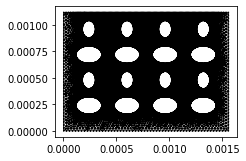

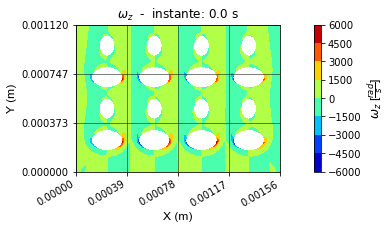

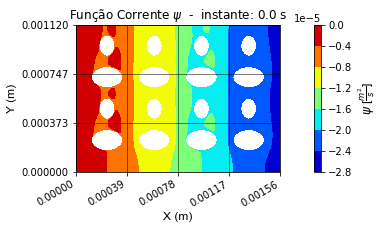

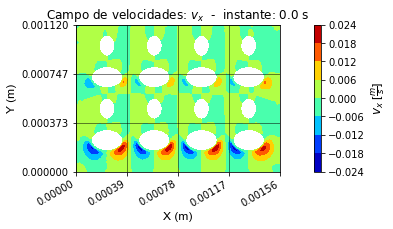

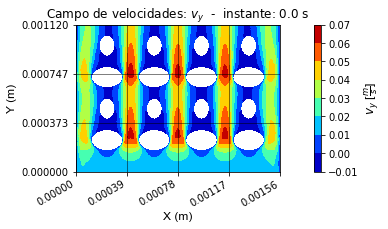

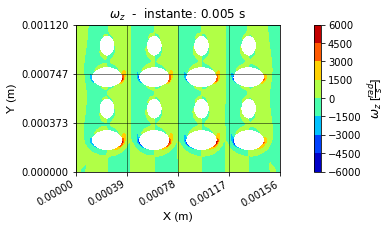

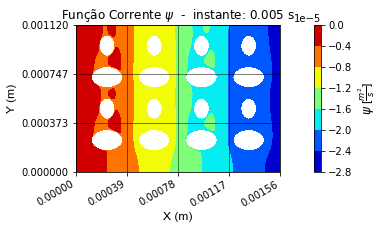

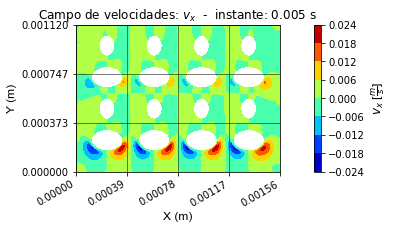

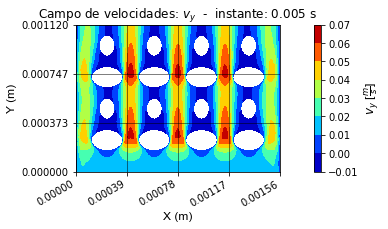

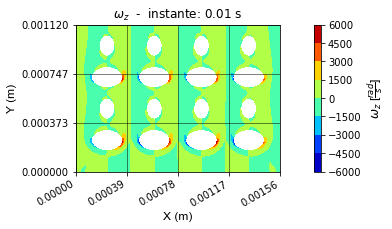

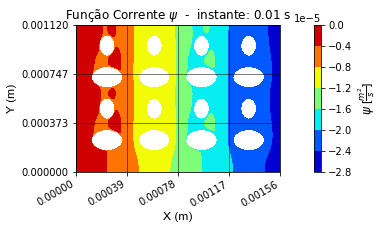

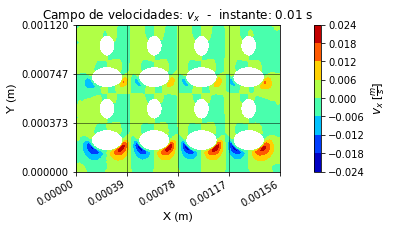

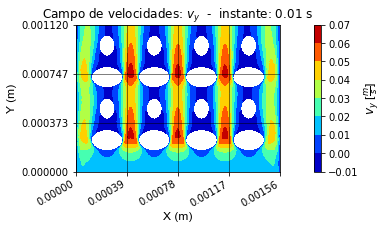

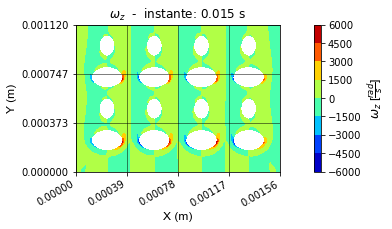

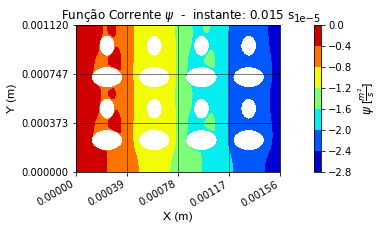

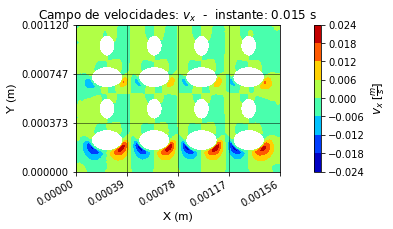

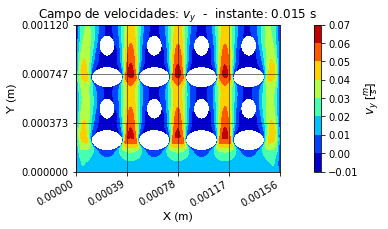

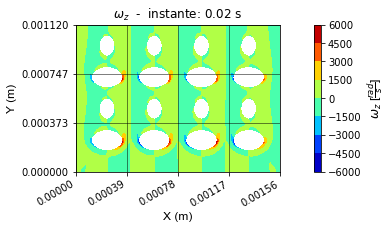

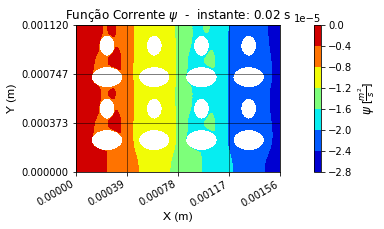

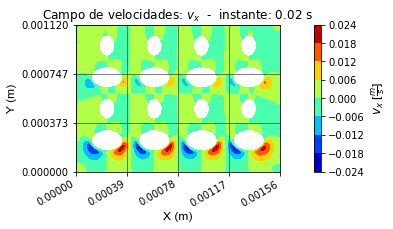

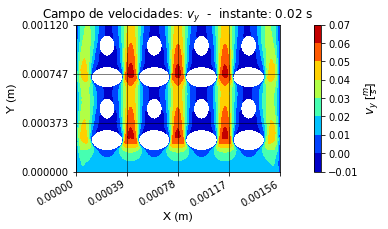

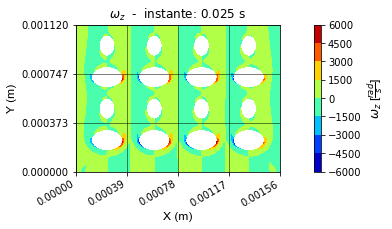

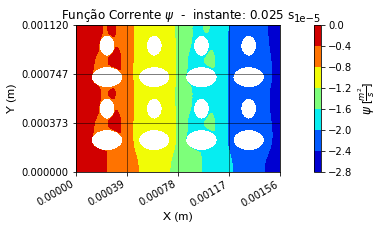

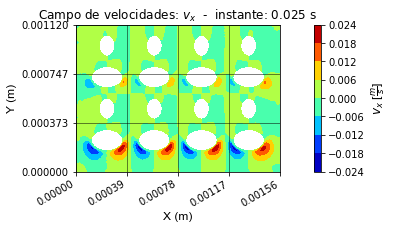

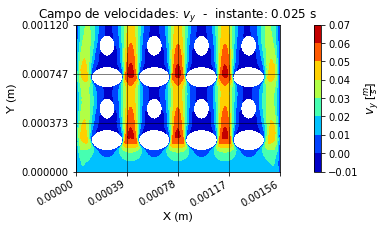

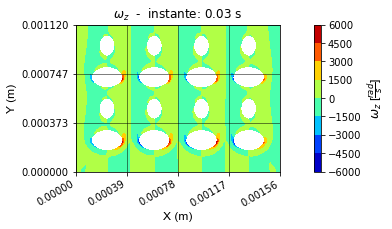

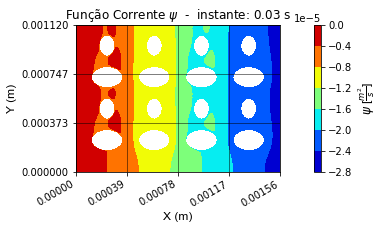

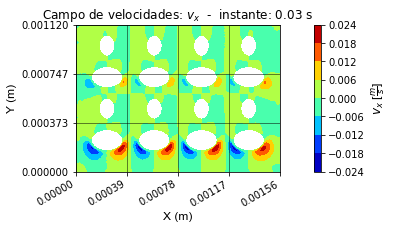

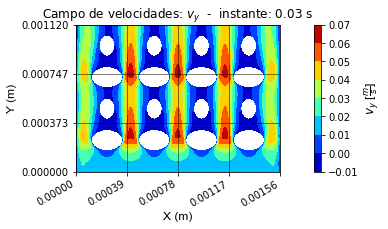

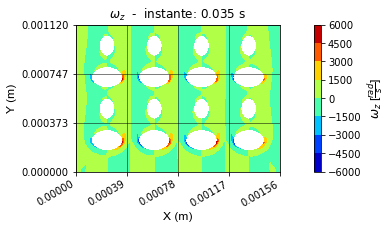

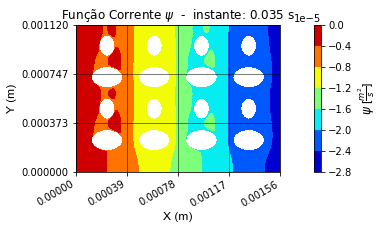

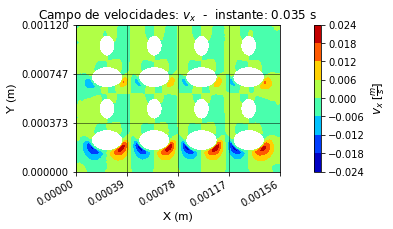

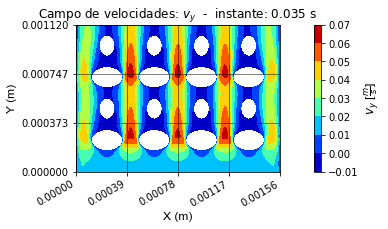

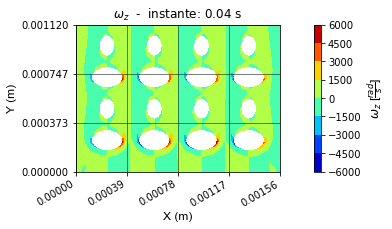

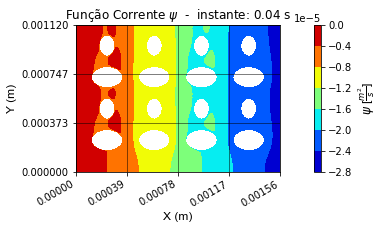

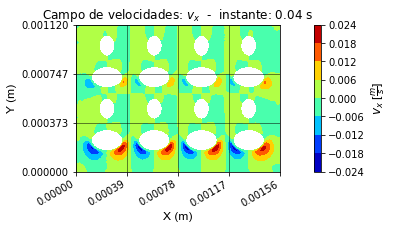

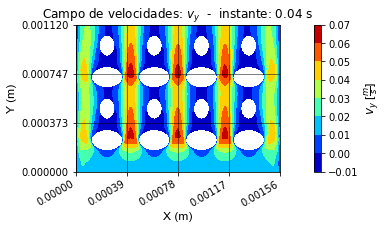

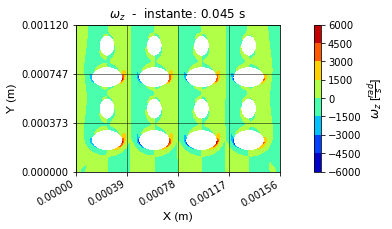

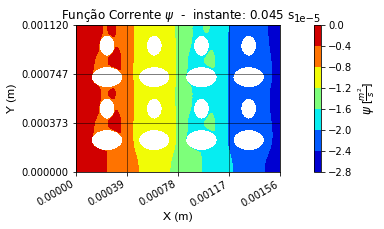

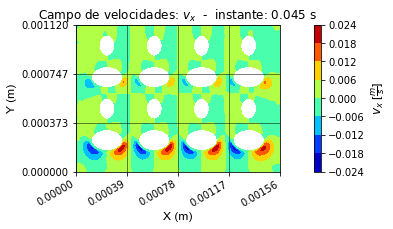

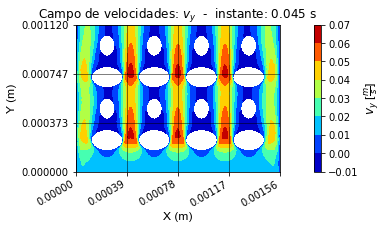

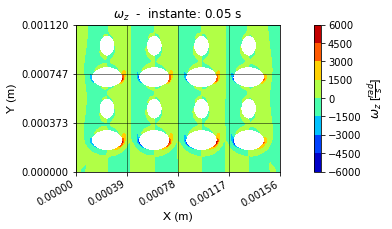

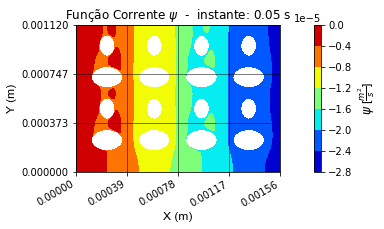

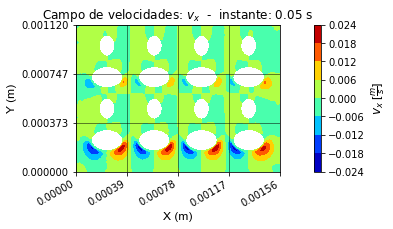

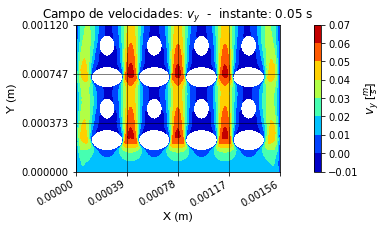

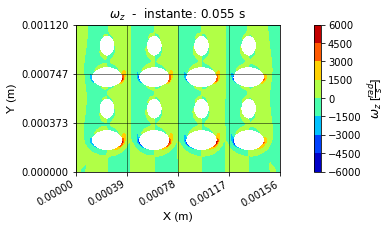

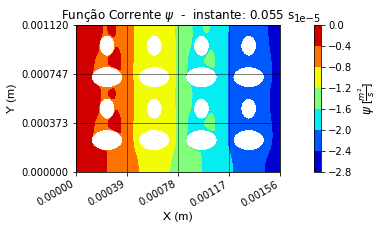

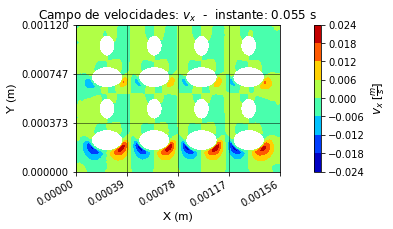

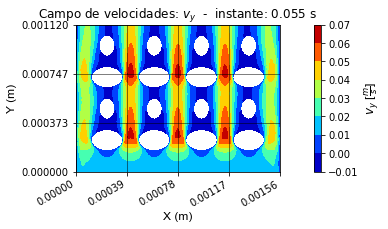

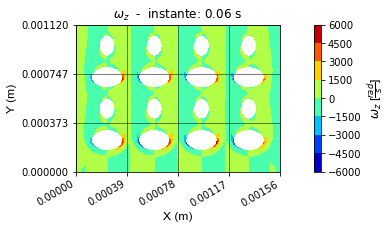

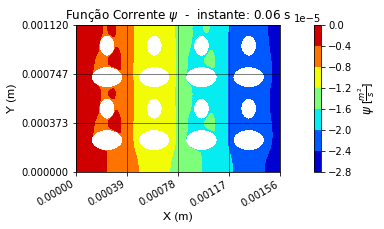

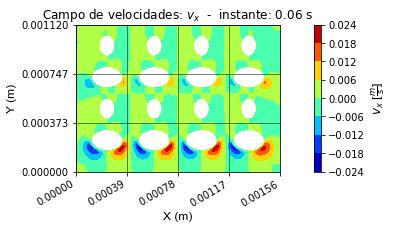

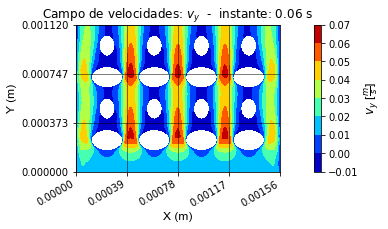

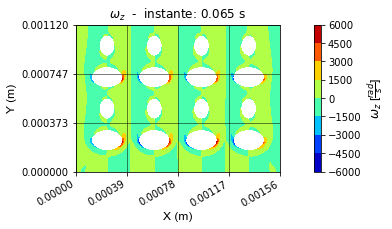

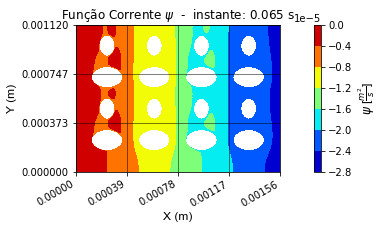

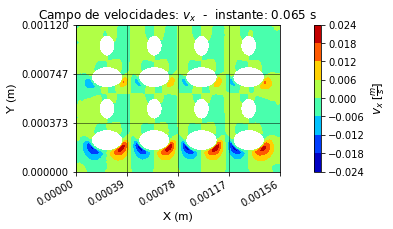

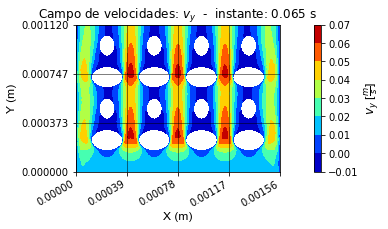

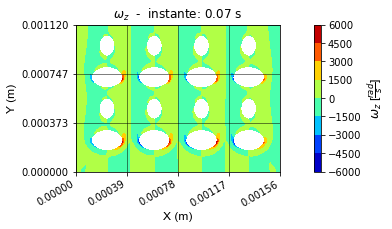

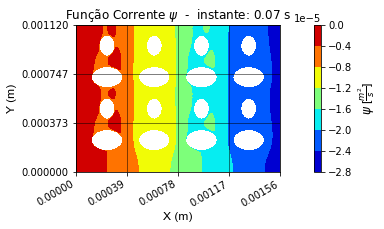

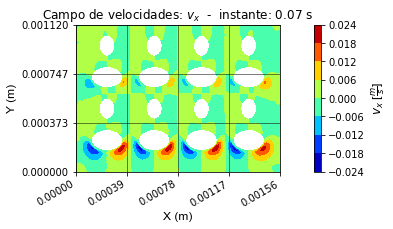

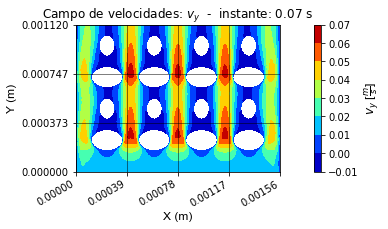

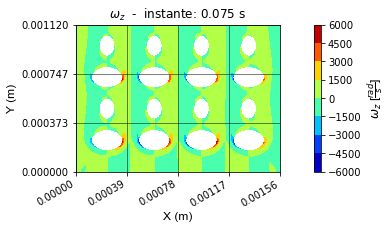

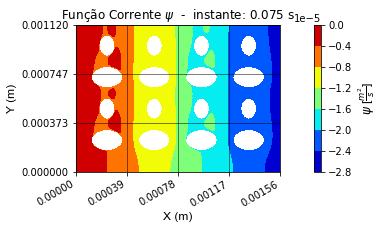

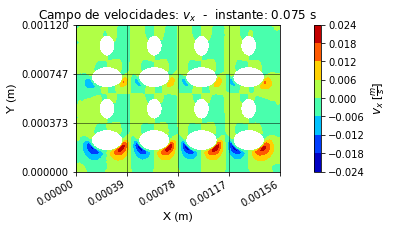

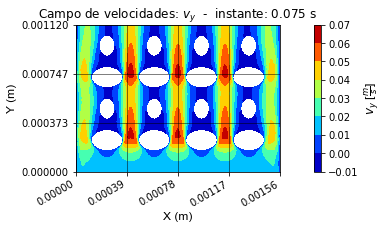

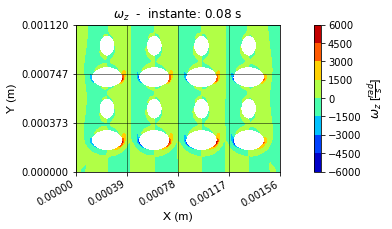

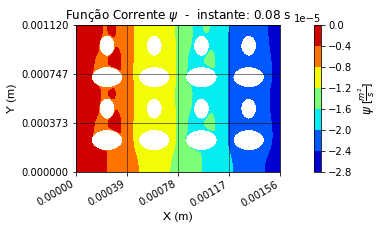

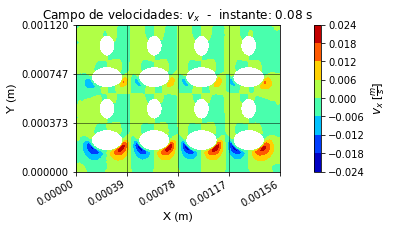

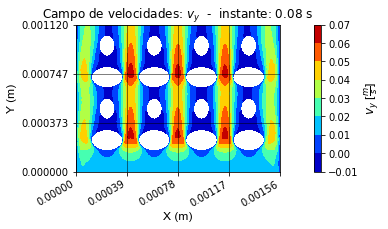

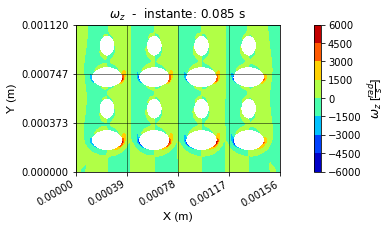

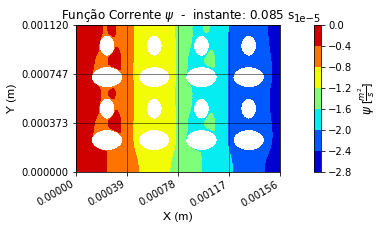

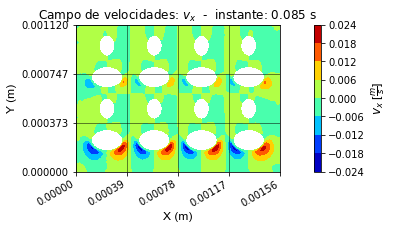

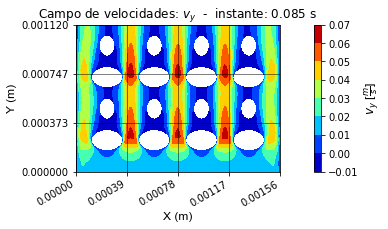

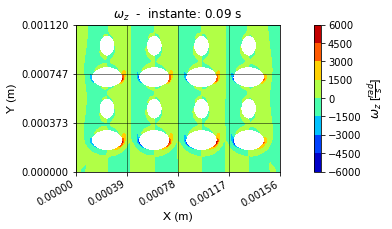

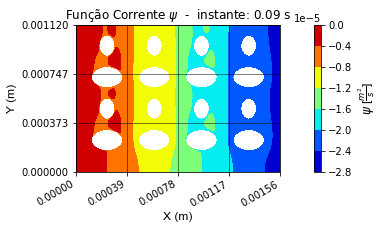

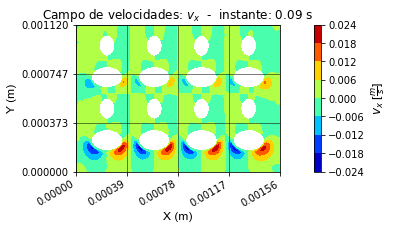

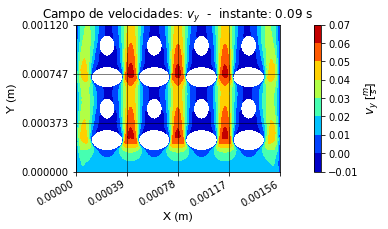

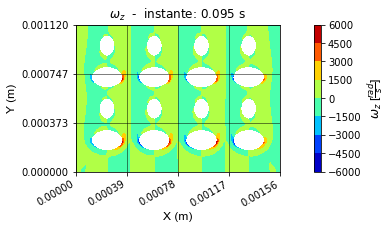

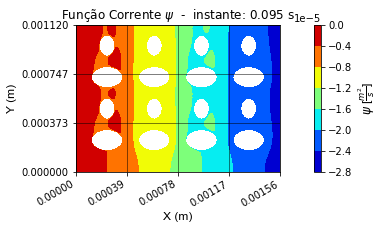

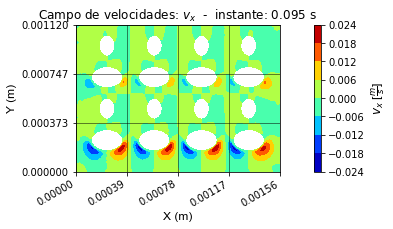

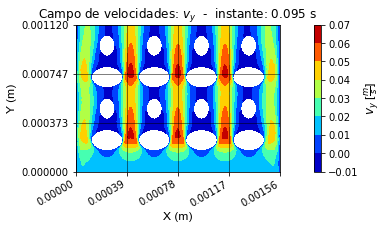

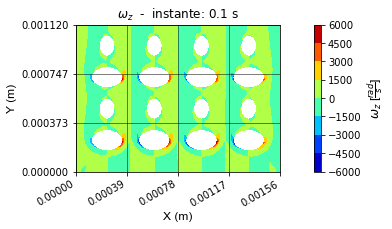

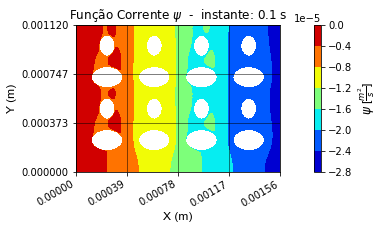

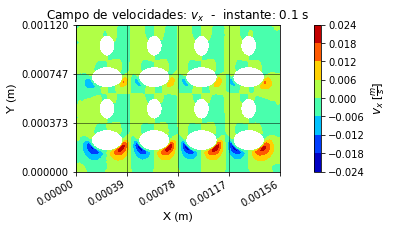

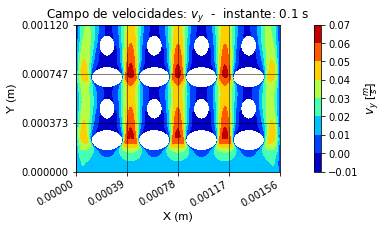

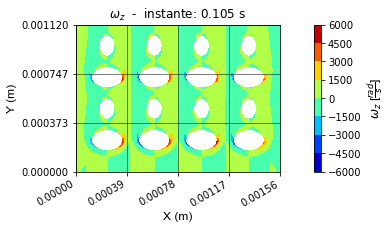

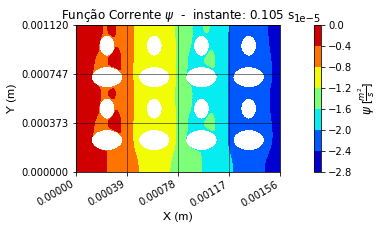

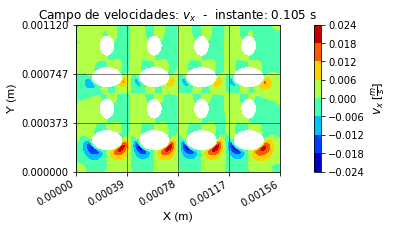

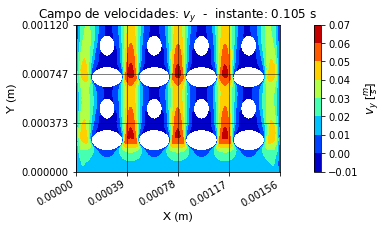

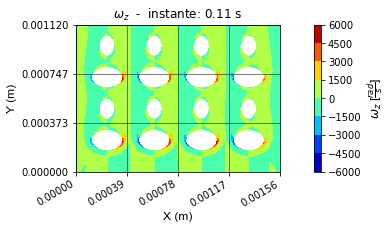

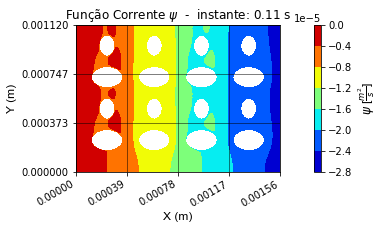

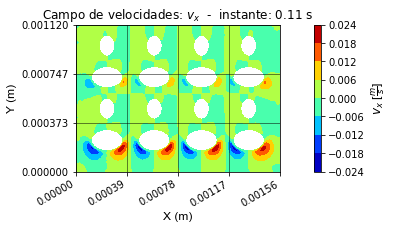

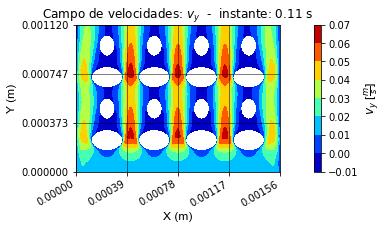

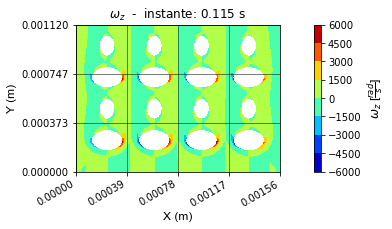

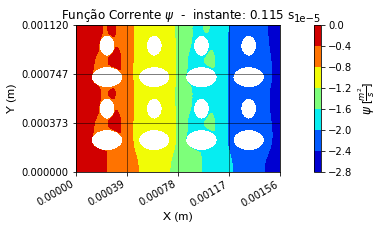

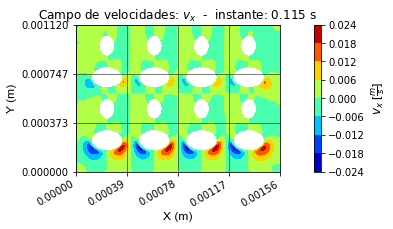

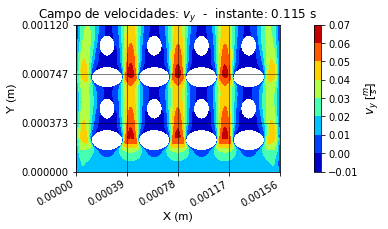

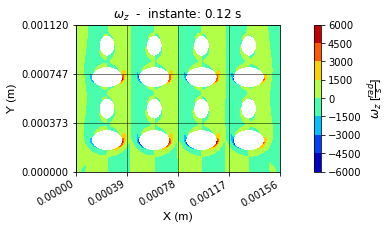

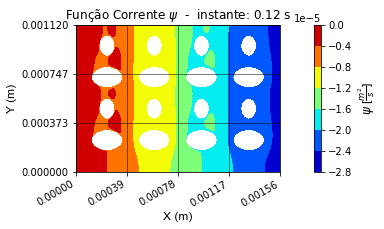

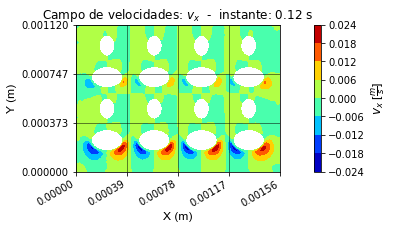

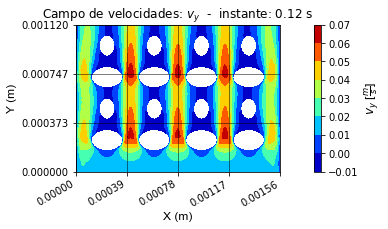

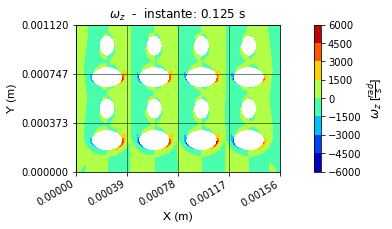

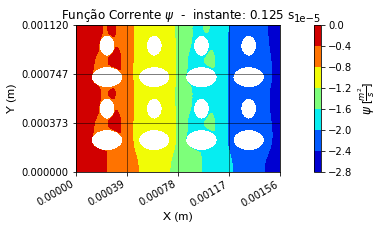

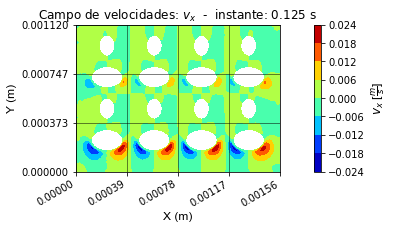

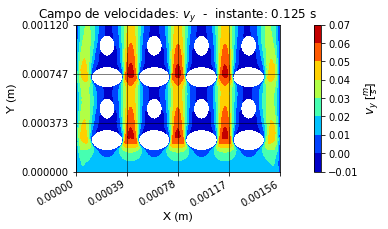

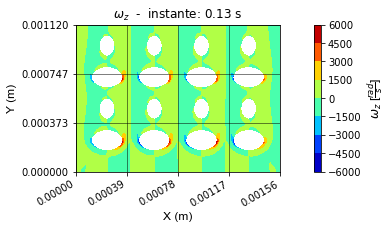

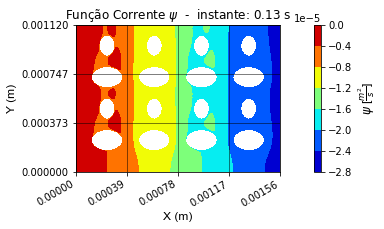

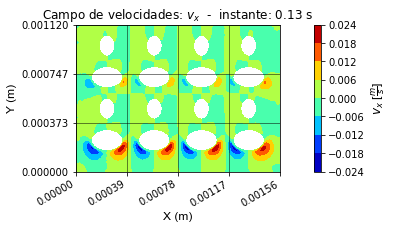

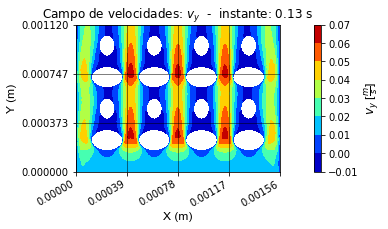

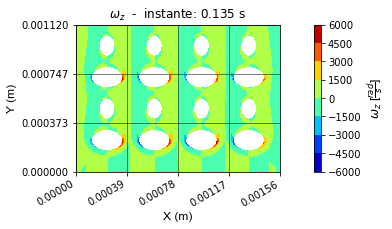

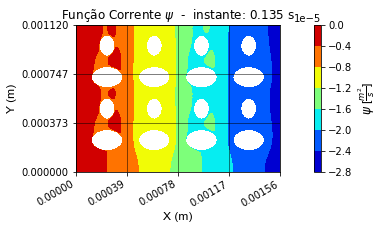

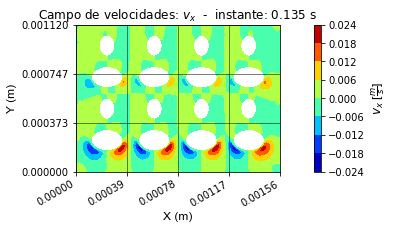

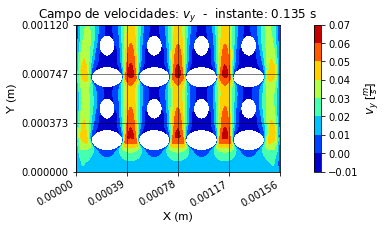

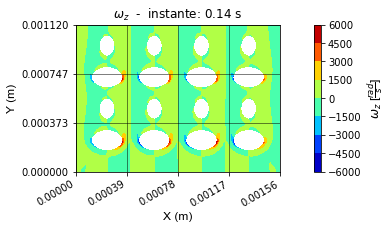

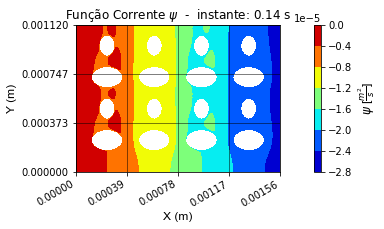

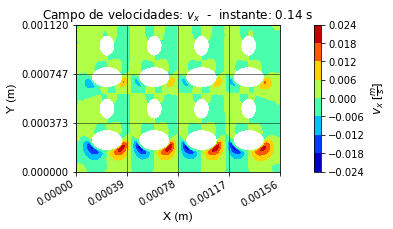

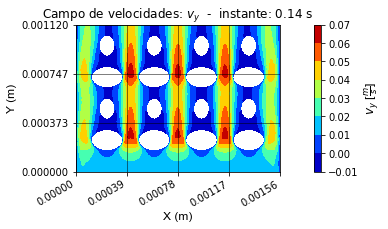

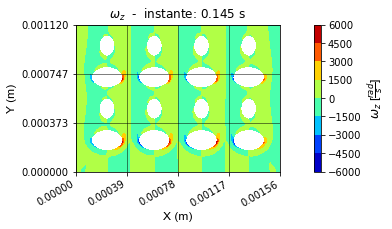

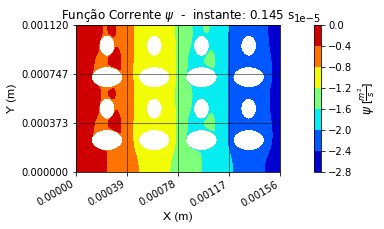

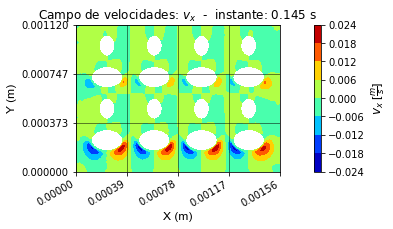

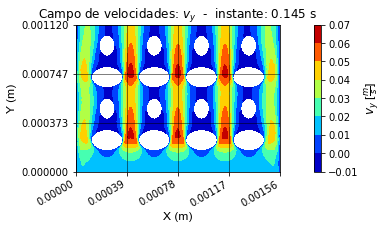

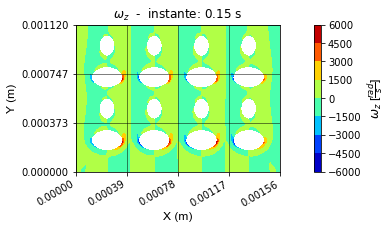

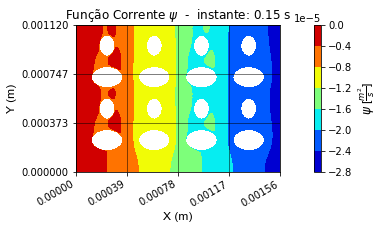

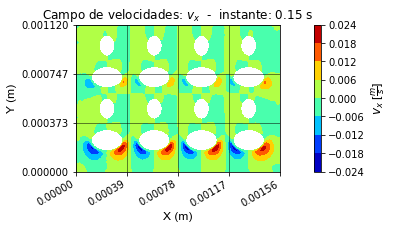

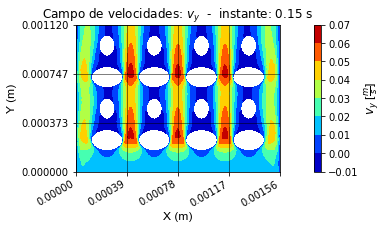

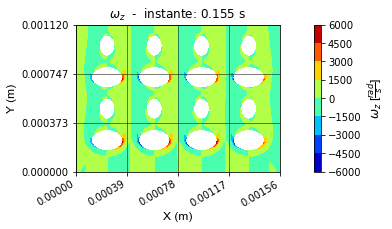

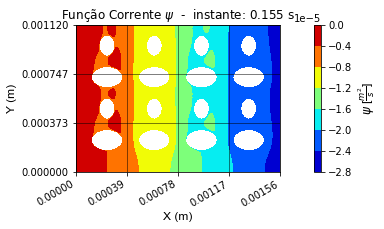

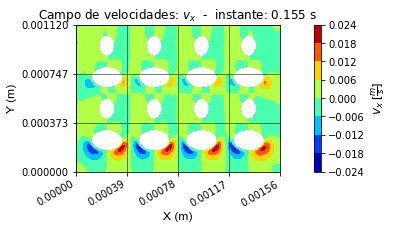

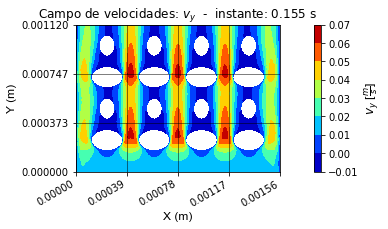

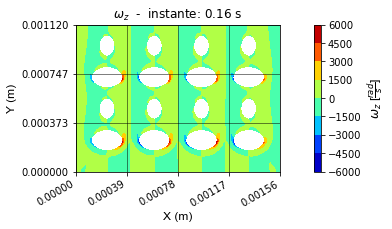

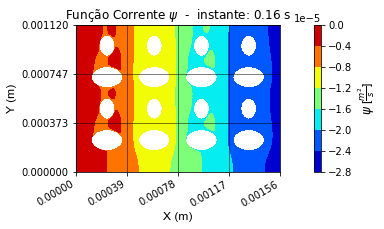

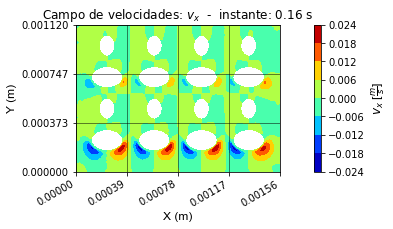

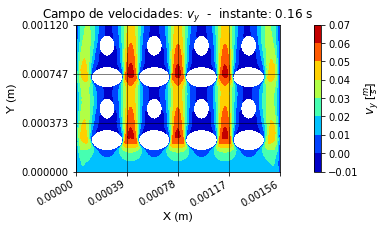

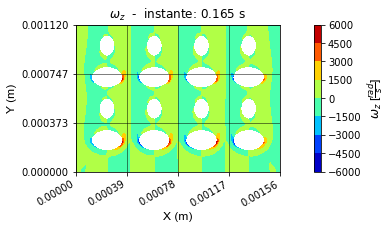

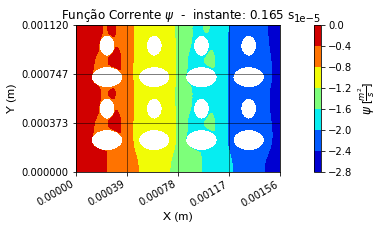

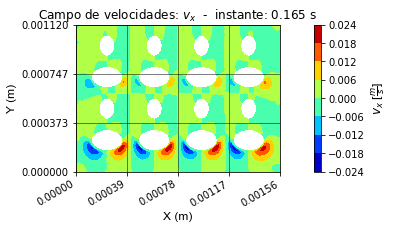

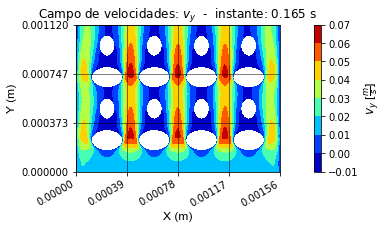

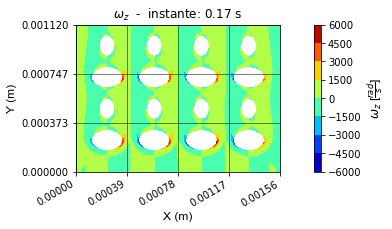

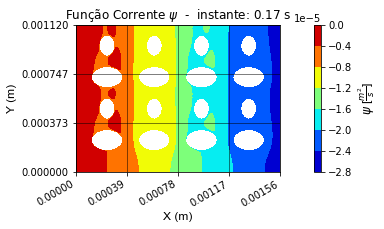

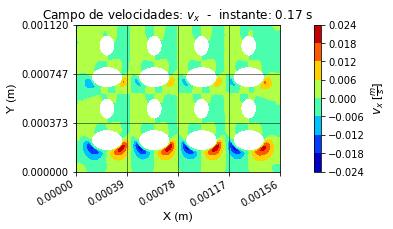

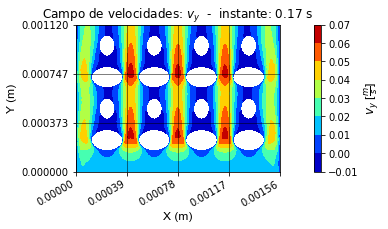

IndexError: index 175 is out of bounds for axis 1 with size 175

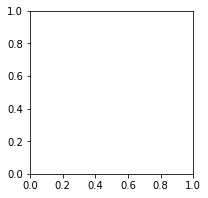

In [7]:
#--------------------------------------------------
# Fonte dos gráficos
matplot_font = {'fontname': 'Arial',
                'color':  'black',
                'weight': 'normal',
                'size': 12,
                }

# Plotando malha

fig, ax = plt.subplots(figsize = (9.6,2.4))

triang = mtri.Triangulation(X,Y,IEN)
ax.set_aspect('equal')
ax.triplot(triang,'k-', linewidth=0.8)

# Plotando gráficos

#for t in range(0,nt,int(nt/3)):
for t in range(0,200,int(25/5)):
    tempo = t*dt

    ## Vorticidade
    fig, ax0 = plt.subplots(figsize = (12,3))
 
    triang = mtri.Triangulation(X,Y,IEN)
    ax0.set_aspect('equal')
    ax0.tricontourf(triang,CampoVort[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)
    cbar = plt.colorbar(ax0.tricontourf(triang,CampoVort[:,t],cmap=cm.jet),shrink=1.0, aspect=20)

    cbar.set_label('$\omega_z$ [$\\frac{rad}{s}$]',fontdict=matplot_font)
    plt.title("$\omega_z$  -  instante: "+ str(round(tempo,3))+" s")
    plt.ylabel("Y (m)",fontdict=matplot_font) 
    plt.xlabel("X (m)",fontdict=matplot_font) 
    labx = np.linspace(X.min(),X.max(),5)
    laby = np.linspace(Y.min(),Y.max(),4)
    plt.grid(color='black', linestyle='solid', linewidth=0.5)
    plt.xticks(labx)
    plt.yticks(laby)
    plt.gcf().autofmt_xdate()
    
    ## PSI
    fig, ax1 = plt.subplots(figsize = (12,3))

    triang = mtri.Triangulation(X,Y,IEN)
    ax1.set_aspect('equal')
    ax1.tricontourf(triang,CampoPSI[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)
    cbar = plt.colorbar(ax1.tricontourf(triang,CampoPSI[:,t],cmap=cm.jet),shrink=1.0, aspect=20)

    cbar.set_label('$\psi$ [$\\frac{m^2}{s}$]',fontdict=matplot_font)
    plt.title("Função Corrente $\psi$  -  instante: "+ str(round(tempo,3))+" s")
    plt.ylabel("Y (m)",fontdict=matplot_font) 
    plt.xlabel("X (m)",fontdict=matplot_font) 
    labx = np.linspace(X.min(),X.max(),5)
    laby = np.linspace(Y.min(),Y.max(),4)
    plt.grid(color='black', linestyle='solid', linewidth=0.5)
    plt.xticks(labx)
    plt.yticks(laby)
    plt.gcf().autofmt_xdate()

    ## vx
    fig, ax2 = plt.subplots(figsize = (12,3))

    triang = mtri.Triangulation(X,Y,IEN)
    ax2.set_aspect('equal')
    ax2.tricontourf(triang,CampoVx[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)
    cbar = plt.colorbar(ax2.tricontourf(triang,CampoVx[:,t],cmap=cm.jet),shrink=1.0, aspect=20)

    cbar.set_label('$v_x$ [$\\frac{m}{s}$]',fontdict=matplot_font)
    plt.title("Campo de velocidades: $v_x$  -  instante: "+ str(round(tempo,3))+" s")
    plt.ylabel("Y (m)",fontdict=matplot_font) 
    plt.xlabel("X (m)",fontdict=matplot_font) 
    labx = np.linspace(X.min(),X.max(),5)
    laby = np.linspace(Y.min(),Y.max(),4)
    plt.grid(color='black', linestyle='solid', linewidth=0.5)
    plt.xticks(labx)
    plt.yticks(laby)
    plt.gcf().autofmt_xdate()

    ## vy
    fig, ax3 = plt.subplots(figsize = (12,3))

    triang = mtri.Triangulation(X,Y,IEN)
    ax3.set_aspect('equal')
    ax3.tricontourf(triang,CampoVy[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)
    cbar = plt.colorbar(ax3.tricontourf(triang,CampoVy[:,t],cmap=cm.jet),shrink=1.0, aspect=20)

    cbar.set_label('$v_y$ [$\\frac{m}{s}$]',fontdict=matplot_font)
    plt.title("Campo de velocidades: $v_y$  -  instante: "+ str(round(tempo,3))+" s")
    plt.ylabel("Y (m)",fontdict=matplot_font) 
    plt.xlabel("X (m)",fontdict=matplot_font) 
    labx = np.linspace(X.min(),X.max(),5)
    laby = np.linspace(Y.min(),Y.max(),4)
    plt.grid(color='black', linestyle='solid', linewidth=0.5)
    plt.xticks(labx)
    plt.yticks(laby)
    plt.gcf().autofmt_xdate()

    plt.show()

## Domínio: meio poroso global

#### Galerkin

In [2]:
# Criando diretório para armazenar solução

# Specify the folder in which results will be exported (mostly graphs)
#workingDir = r"C:\Users\João Pedro\Downloads\ElementosFinitos"   #Notebook pessoal
workingDir = r"C:\Users\jferreira\Downloads\ElementosFinitos"   #TechnipFMC
fileName = "Sol_DPF_(1.0e-3x2.0e-3)_filtro_8e-4_canal_4x8_obstaculos_4.8e-5&1.6e-5_mesh_32k_elem_1.6e-4_D_10e-7_nu_0.0015_dt_0.025_vxcc_20_Re"
outputPath = workingDir + "\\" + fileName

if not os.path.exists(outputPath):
    os.mkdir(outputPath)
    print("Directory " , outputPath ,  " has been created ")
else:
    print("Directory " , outputPath ,  " already exists")

# Propriedades do fluido e domínio:

nu = 1.0*10**(-7)
ux = 0.025
to = 0.0
tf = 0.2
dt = 0.0015
nt = int((tf-to)/dt+1)

# leitura de malha e classificacao de contorno por nome (ccName)
mshname = 'DPF_(1.0e-3x2.0e-3)_filtro_8e-4_canal_4x8_obstaculos_4.8e-5&1.6e-5_mesh_32k_elem_1.6e-4_D.msh'
msh = meshio.read('./' + mshname)
print(msh)
X = np.array(msh.points[:,0])
Y = np.array(msh.points[:,1])
npoints = len(X)
IEN = msh.cells[1].data # triangles
ne = IEN.shape[0]
IENbound = msh.cells[0].data # lines
IENboundTypeElem = list(msh.cell_data['gmsh:physical'][0] - 1)
boundNames = list(msh.field_data.keys())
IENboundElem = [boundNames[elem] for elem in IENboundTypeElem]
####################################################################################
#O array IENboundTypeElem apresenta séries de números repetidos. Cada série de um número corresponde a um contorno e a quantidade de pontos nele.
#Ex.: 4 contornos, dois com 5 nós, dois com 3 nós: msh.cell_data['gmsh:physical'][0] será [4,4,4,4,4,5,5,5,6,6,6,6,6,7,7,7]
#O nº em série que vai representar cada contorno vai depender de como a entidade física é criada no gmsh. Pode haver, por ex., 5 contornos representados por 5,6,7,8,9
#Para tornar o loop que define o IENboundElem possível, é preciso que se subtraia esses números de forma que eles se tornem 0,1,2,3,4; por isso a subtração por 5 ali.
#Dessa forma, sempre teremos séries de 0, 1, 2, 3, 4 para associar aos nomes de cada contorno, estes por sua vez presentes em "boundaNames".
####################################################################################

# cria lista de nos do contorno
cc = np.unique(IENbound.reshape(IENbound.size))
ccName = [[] for i in range( len(X) )]

for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'admissao - esquerda':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'admissao - direita':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'admissao - lado inferior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'admissao - lado superior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'filtro - esquerda':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'filtro - direita':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo1':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo2':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo3':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo4':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo5':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo6':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo7':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo8':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'exaustao - esquerda':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'exaustao - direita':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'exaustao - lado inferior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'exaustao - lado superior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

IENbound = cc

# Definição dos vetores de condicoes de contorno para vx,vy e psi
vxcc = np.zeros( (npoints),dtype='float' )
vycc = np.zeros( (npoints),dtype='float' )
PSIcc = np.zeros( (npoints),dtype='float' )

for i in IENbound: 
 if ccName[i] == 'admissao - lado inferior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.0
 if ccName[i] == 'admissao - lado superior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = ux*0.0008
 if ccName[i] == 'admissao - esquerda':
  vxcc[i] = ux
  vycc[i] = 0.0
  PSIcc[i] = ux*(Y[i] + 0.0008)   #A origem da malha não esta na quina do canal, mas na quina do filtro
 if ccName[i] == 'admissao - direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.0
 if ccName[i] == 'filtro - esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0 + ux*(0.0008)
 if ccName[i] == 'filtro - direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0.00200 + ux*(0.0008)
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0.00016 + ux*(0.0008)
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0.00040 + ux*(0.0008)
 if ccName[i] == 'obstaculo3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0.00064 + ux*(0.0008)
 if ccName[i] == 'obstaculo4':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0.00088 + ux*(0.0008)
 if ccName[i] == 'obstaculo5':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0.00112 + ux*(0.0008)

 if ccName[i] == 'obstaculo6':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0.00136 + ux*(0.0008)
 if ccName[i] == 'obstaculo7':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0.00160 + ux*(0.0008)
 if ccName[i] == 'obstaculo8':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0.00184 + ux*(0.0008)

 if ccName[i] == 'exaustao - lado inferior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.0
 if ccName[i] == 'exaustao - lado superior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = ux*0.0008
 if ccName[i] == 'exaustao - esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = ux*0.0008

# condicao inicial de vx,vy (necessárias para cálculo da vorticidade)    (Agora antes da inicialização das matrizes, pois Kest usa a média das velocidades de cada elemento)
vx = np.zeros( (npoints),dtype='float' )
vy = np.zeros( (npoints),dtype='float' )
PSI = np.zeros( (npoints),dtype='float' )

for i in IENbound:
 vx[i] = vxcc[i]
 vy[i] = vycc[i]


# inicializacao das matrizes globais
ne = IEN.shape[0]
K = np.empty( (npoints,npoints),dtype='float' )
M = np.empty( (npoints,npoints),dtype='float' )
Gx = np.empty( (npoints,npoints),dtype='float' )
Gy = np.empty( (npoints,npoints),dtype='float' )

for e in range(0,ne):
 v1,v2,v3 = IEN[e]

 # Calcula a área do triângulo
 area = 0.5*np.linalg.det([[1.0,X[v1],Y[v1]],
                           [1.0,X[v2],Y[v2]],
                           [1.0,X[v3],Y[v3]]])

 b1 = Y[v2]-Y[v3]
 b2 = Y[v3]-Y[v1]
 b3 = Y[v1]-Y[v2]
 
 c1 = X[v3]-X[v2]
 c2 = X[v1]-X[v3]
 c3 = X[v2]-X[v1]

 kxelem = np.array([[b1*b1,b1*b2,b1*b3],
                    [b2*b1,b2*b2,b2*b3],
                    [b3*b1,b3*b2,b3*b3]])
 kyelem = np.array([[c1*c1,c1*c2,c1*c3],
                    [c2*c1,c2*c2,c2*c3],
                    [c3*c1,c3*c2,c3*c3]])
 
 kelem = (1/(4*area))*kxelem + (1/(4*area))*kyelem 

 melem = (area/12.0)*np.array([[2.0,1.0,1.0],
                               [1.0,2.0,1.0],
                               [1.0,1.0,2.0]])

 gxelem = (1/6)*np.array([[b1,b2,b3],
                          [b1,b2,b3],
                          [b1,b2,b3]])
 gyelem = (1/6)*np.array([[c1,c2,c3],
                          [c1,c2,c3],
                          [c1,c2,c3]])


 for ilocal in range(0,3):
  iglobal = IEN[e,ilocal]
  for jlocal in range(0,3):
   jglobal = IEN[e,jlocal]

   K[iglobal,jglobal] += kelem[ilocal,jlocal]
   M[iglobal,jglobal] += melem[ilocal,jlocal]
   Gx[iglobal,jglobal] += gxelem[ilocal,jlocal]
   Gy[iglobal,jglobal] += gyelem[ilocal,jlocal]
   

# Vorticidade nos contornos no instante inicial
cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
vort_cc = sp.sparse.linalg.spsolve(cscM,(Gx@vy - Gy@vx))
vort = vort_cc.copy()

# Gravando condições de contorno e iniciais da solução em .vtk
point_data = {'PSIcc' : PSIcc}
data_vxcc = {'vxcc' : vxcc}
data_vycc = {'vycc' : vycc}
data_vort_cc = {'vort_cc' : vort_cc}
point_data.update(data_vxcc)
point_data.update(data_vycc)
point_data.update(data_vort_cc)
meshio.write_points_cells(outputPath +'\\'+'condicaoDeContorno.vtk',
                           msh.points, 
                           msh.cells,
                           point_data=point_data,
                           )


CampoVort = np.empty((npoints,nt))
CampoPSI = np.empty((npoints,nt))
CampoVx = np.empty((npoints,nt))
CampoVy = np.empty((npoints,nt))


# Avanço no tempo
for n in range(0,nt):

 ## Solução do sistema linear para vorticidade

 ### Cálculo da condição de contorno da vorticidade (atualizando vorticidade nos contornos a cada iteração)
 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vort_cc = sp.sparse.linalg.spsolve(cscM,(Gx@vy - Gy@vx))

 ### Montagem da matriz A
 vx_diag = np.diag(vx)
 vy_diag = np.diag(vy)

 ### Montagem da matriz A e do vetor b de transporte de vorticidade
 A = M/dt + nu*K + vx_diag@Gx + vy_diag@Gy # implicito para conv e difusao
 b = (M/dt)@vort
 
 ### Condição de contorno para o sistema linear Ax=b
 for i in IENbound:
     if ccName[i] == 'admissao - lado inferior' or \
        ccName[i] == 'admissao - lado superior' or \
        ccName[i] == 'admissao - direita' or \
        ccName[i] == 'admissao - esquerda' or \
        ccName[i] == 'filtro - direita' or \
        ccName[i] == 'filtro - esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4' or \
        ccName[i] == 'obstaculo5' or \
        ccName[i] == 'obstaculo6' or \
        ccName[i] == 'obstaculo7' or \
        ccName[i] == 'obstaculo8' or \
        ccName[i] == 'exaustao - lado inferior' or \
        ccName[i] == 'exaustao - lado superior' or \
        ccName[i] == 'exaustao - esquerda':

         A[i,:] = 0.0 # zerando a linha
         A[i,i] = 1.0 # colocando 1 na diagonal
         b[i]   = vort_cc[i]

 ### Solução
 cscA = sp.sparse.csc_matrix(A)   # Matrix form that improves sparse.linalg.solve
 vort = sp.sparse.linalg.spsolve(cscA,b)

 CampoVort[:,n] = vort

 ## Solução da Equação de Corrente-Vorticidade

 Apsi = K.copy()

 bpsi = M@vort

 ### Imposição das c.c.s de Dirichlet
 for i in IENbound:
     if ccName[i] == 'admissao - lado inferior' or \
        ccName[i] == 'admissao - lado superior' or \
        ccName[i] == 'admissao - direita' or \
        ccName[i] == 'admissao - esquerda' or \
        ccName[i] == 'filtro - direita' or \
        ccName[i] == 'filtro - esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4' or \
        ccName[i] == 'obstaculo5' or \
        ccName[i] == 'obstaculo6' or \
        ccName[i] == 'obstaculo7' or \
        ccName[i] == 'obstaculo8' or \
        ccName[i] == 'exaustao - lado inferior' or \
        ccName[i] == 'exaustao - lado superior' or \
        ccName[i] == 'exaustao - esquerda':
         
         Apsi[i,:] = 0.0 # zerando a linha
         Apsi[i,i] = 1.0 # colocando 1 na diagonal
         bpsi[i]   = PSIcc[i]

 ### Solução
 cscApsi = sp.sparse.csc_matrix(Apsi)   # Matrix form that improves sparse.linalg.solve
 PSI = sp.sparse.linalg.spsolve(cscApsi,bpsi)

 CampoPSI[:,n] = PSI

 ## Obtendo campo de velocidades a partir da função corrrente

 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vx = sp.sparse.linalg.spsolve(cscM,Gy@PSI)
 vy = sp.sparse.linalg.spsolve(cscM,-Gx@PSI)
 
 for i in IENbound:
     if ccName[i] == 'admissao - lado inferior' or \
        ccName[i] == 'admissao - lado superior' or \
        ccName[i] == 'admissao - direita' or \
        ccName[i] == 'admissao - esquerda' or \
        ccName[i] == 'filtro - direita' or \
        ccName[i] == 'filtro - esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4' or \
        ccName[i] == 'obstaculo5' or \
        ccName[i] == 'obstaculo6' or \
        ccName[i] == 'obstaculo7' or \
        ccName[i] == 'obstaculo8' or \
        ccName[i] == 'exaustao - lado inferior' or \
        ccName[i] == 'exaustao - lado superior' or \
        ccName[i] == 'exaustao - esquerda':
         vx[i] = vxcc[i]
         vy[i] = vycc[i]

 CampoVx[:,n] = vx
 CampoVy[:,n] = vy


 # Gravando solução em .vtk
 print ("... gravando em VTK passo de tempo: " + str(n))
 point_data = {'psi' : PSI}
 data_vx = {'vx' : vx}
 data_vy = {'vy' : vy}
 data_vort = {'omega_z' : vort}
 point_data.update(data_vx)
 point_data.update(data_vy)
 point_data.update(data_vort)
 meshio.write_points_cells(outputPath +'\\'+'solucao-'+str(n)+'.vtk',
                            msh.points, 
                            msh.cells,
                            point_data=point_data,
                            )

Directory  C:\Users\jferreira\Downloads\ElementosFinitos\Sol_DPF_(1.0e-3x2.0e-3)_filtro_8e-4_canal_4x8_obstaculos_4.8e-5&1.6e-5_mesh_32k_elem_1.6e-4_D_10e-7_nu_0.0015_dt_0.025_vxcc_20_Re  has been created 

<meshio mesh object>
  Number of points: 17051
  Number of cells:
    line: 1696
    triangle: 32468
  Cell data: gmsh:physical, gmsh:geometrical
  Field data: admissao - lado inferior, admissao - lado superior, admissao - esquerda, admissao - direita, exaustao - lado inferior, exaustao - lado superior, exaustao - esquerda, exaustao - direita, obstaculo1, obstaculo2, obstaculo3, obstaculo4, obstaculo5, obstaculo6, obstaculo7, obstaculo8, filtro - esquerda, filtro - direita, admissao, exaustao, filtro
... gravando em VTK passo de tempo: 0
... gravando em VTK passo de tempo: 1
... gravando em VTK passo de tempo: 2
... gravando em VTK passo de tempo: 3
... gravando em VTK passo de tempo: 4
... gravando em VTK passo de tempo: 5
... gravando em VTK passo de tempo: 6
... gravando em VTK p

KeyboardInterrupt: 

#### DPF global 4x5: 1e-7_nu_0.001_dt_0.025_vycc_1.5e-4L_37.5_Re_6_R

In [2]:
# Criando diretório para armazenar solução

# Specify the folder in which results will be exported (mostly graphs)
#workingDir = r"C:\Users\João Pedro\Downloads\ElementosFinitos"   #Notebook pessoal
workingDir = r"C:\Users\jferreira\Downloads\ElementosFinitos"   #TechnipFMC
fileName = "Sol_DPF_(0.65e-3x2.40e-3)_filtro_8e-4_canal_4x5_obstaculos_3.6e-5&1.2e-5_mesh_32k_elem_3.0e-4_D_1.5e-4_L_10e-7_nu_0.0015_dt_0.025_vxcc_37.5_Re_4_R"
outputPath = workingDir + "\\" + fileName

if not os.path.exists(outputPath):
    os.mkdir(outputPath)
    print("Directory " , outputPath ,  " has been created ")
else:
    print("Directory " , outputPath ,  " already exists")

# Propriedades do fluido e domínio:

nu = 1.0*10**(-7)
ux = 0.025
to = 0.0
tf = 0.3
dt = 0.0015
nt = int((tf-to)/dt+1)

# leitura de malha e classificacao de contorno por nome (ccName)
mshname = 'DPF_(0.65e-3x2.40e-3)_filtro_8e-4_canal_4x5_obstaculos_3.6e-5&1.2e-5_mesh_32k_elem_3.0e-4_D_1.5e-4_L.msh'
msh = meshio.read('./' + mshname)
print(msh)
X = np.array(msh.points[:,0])
Y = np.array(msh.points[:,1])
npoints = len(X)
IEN = msh.cells[1].data # triangles
ne = IEN.shape[0]
IENbound = msh.cells[0].data # lines
IENboundTypeElem = list(msh.cell_data['gmsh:physical'][0] - 1)
boundNames = list(msh.field_data.keys())
IENboundElem = [boundNames[elem] for elem in IENboundTypeElem]
####################################################################################
#O array IENboundTypeElem apresenta séries de números repetidos. Cada série de um número corresponde a um contorno e a quantidade de pontos nele.
#Ex.: 4 contornos, dois com 5 nós, dois com 3 nós: msh.cell_data['gmsh:physical'][0] será [4,4,4,4,4,5,5,5,6,6,6,6,6,7,7,7]
#O nº em série que vai representar cada contorno vai depender de como a entidade física é criada no gmsh. Pode haver, por ex., 5 contornos representados por 5,6,7,8,9
#Para tornar o loop que define o IENboundElem possível, é preciso que se subtraia esses números de forma que eles se tornem 0,1,2,3,4; por isso a subtração por 5 ali.
#Dessa forma, sempre teremos séries de 0, 1, 2, 3, 4 para associar aos nomes de cada contorno, estes por sua vez presentes em "boundaNames".
####################################################################################

# cria lista de nos do contorno
cc = np.unique(IENbound.reshape(IENbound.size))
ccName = [[] for i in range( len(X) )]

for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'admissao - esquerda':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'admissao - direita':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'admissao - lado inferior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'admissao - lado superior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'filtro - esquerda':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'filtro - direita':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo1':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo2':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo3':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo4':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo5':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'exaustao - esquerda':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'exaustao - direita':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'exaustao - lado inferior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'exaustao - lado superior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

IENbound = cc

# Definição dos vetores de condicoes de contorno para vx,vy e psi
vxcc = np.zeros( (npoints),dtype='float' )
vycc = np.zeros( (npoints),dtype='float' )
PSIcc = np.zeros( (npoints),dtype='float' )

for i in IENbound: 
 if ccName[i] == 'admissao - lado inferior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.0
 if ccName[i] == 'admissao - lado superior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = ux*0.0008
 if ccName[i] == 'admissao - esquerda':
  vxcc[i] = ux
  vycc[i] = 0.0
  PSIcc[i] = ux*(Y[i] + 0.0008)   #A origem da malha não esta na quina do canal, mas na quina do filtro
 if ccName[i] == 'admissao - direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.0
 if ccName[i] == 'filtro - esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.0024)*0 + ux*(0.0008)
 if ccName[i] == 'filtro - direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.0024)*0.00240 + ux*(0.0008)
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.0024)*0.00030 + ux*(0.0008)
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.0024)*0.00075 + ux*(0.0008)
 if ccName[i] == 'obstaculo3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.0024)*0.00120 + ux*(0.0008)
 if ccName[i] == 'obstaculo4':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.0024)*0.00165 + ux*(0.0008)
 if ccName[i] == 'obstaculo5':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.0024)*0.00210 + ux*(0.0008)

 if ccName[i] == 'exaustao - lado inferior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.0
 if ccName[i] == 'exaustao - lado superior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = ux*0.0008
 if ccName[i] == 'exaustao - esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = ux*0.0008

# condicao inicial de vx,vy (necessárias para cálculo da vorticidade)    (Agora antes da inicialização das matrizes, pois Kest usa a média das velocidades de cada elemento)
vx = np.zeros( (npoints),dtype='float' )
vy = np.zeros( (npoints),dtype='float' )
PSI = np.zeros( (npoints),dtype='float' )

for i in IENbound:
 vx[i] = vxcc[i]
 vy[i] = vycc[i]


# inicializacao das matrizes globais
ne = IEN.shape[0]
K = np.empty( (npoints,npoints),dtype='float' )
M = np.empty( (npoints,npoints),dtype='float' )
Gx = np.empty( (npoints,npoints),dtype='float' )
Gy = np.empty( (npoints,npoints),dtype='float' )

for e in range(0,ne):
 v1,v2,v3 = IEN[e]

 # Calcula a área do triângulo
 area = 0.5*np.linalg.det([[1.0,X[v1],Y[v1]],
                           [1.0,X[v2],Y[v2]],
                           [1.0,X[v3],Y[v3]]])

 b1 = Y[v2]-Y[v3]
 b2 = Y[v3]-Y[v1]
 b3 = Y[v1]-Y[v2]
 
 c1 = X[v3]-X[v2]
 c2 = X[v1]-X[v3]
 c3 = X[v2]-X[v1]

 kxelem = np.array([[b1*b1,b1*b2,b1*b3],
                    [b2*b1,b2*b2,b2*b3],
                    [b3*b1,b3*b2,b3*b3]])
 kyelem = np.array([[c1*c1,c1*c2,c1*c3],
                    [c2*c1,c2*c2,c2*c3],
                    [c3*c1,c3*c2,c3*c3]])
 
 kelem = (1/(4*area))*kxelem + (1/(4*area))*kyelem 

 melem = (area/12.0)*np.array([[2.0,1.0,1.0],
                               [1.0,2.0,1.0],
                               [1.0,1.0,2.0]])

 gxelem = (1/6)*np.array([[b1,b2,b3],
                          [b1,b2,b3],
                          [b1,b2,b3]])
 gyelem = (1/6)*np.array([[c1,c2,c3],
                          [c1,c2,c3],
                          [c1,c2,c3]])


 for ilocal in range(0,3):
  iglobal = IEN[e,ilocal]
  for jlocal in range(0,3):
   jglobal = IEN[e,jlocal]

   K[iglobal,jglobal] += kelem[ilocal,jlocal]
   M[iglobal,jglobal] += melem[ilocal,jlocal]
   Gx[iglobal,jglobal] += gxelem[ilocal,jlocal]
   Gy[iglobal,jglobal] += gyelem[ilocal,jlocal]
   

# Vorticidade nos contornos no instante inicial
cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
vort_cc = sp.sparse.linalg.spsolve(cscM,(Gx@vy - Gy@vx))
vort = vort_cc.copy()

# Gravando condições de contorno e iniciais da solução em .vtk
point_data = {'PSIcc' : PSIcc}
data_vxcc = {'vxcc' : vxcc}
data_vycc = {'vycc' : vycc}
data_vort_cc = {'vort_cc' : vort_cc}
point_data.update(data_vxcc)
point_data.update(data_vycc)
point_data.update(data_vort_cc)
meshio.write_points_cells(outputPath +'\\'+'condicaoDeContorno.vtk',
                           msh.points, 
                           msh.cells,
                           point_data=point_data,
                           )


CampoVort = np.empty((npoints,nt))
CampoPSI = np.empty((npoints,nt))
CampoVx = np.empty((npoints,nt))
CampoVy = np.empty((npoints,nt))


# Avanço no tempo
for n in range(0,nt):

 ## Solução do sistema linear para vorticidade

 ### Cálculo da condição de contorno da vorticidade (atualizando vorticidade nos contornos a cada iteração)
 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vort_cc = sp.sparse.linalg.spsolve(cscM,(Gx@vy - Gy@vx))

 ### Montagem da matriz A
 vx_diag = np.diag(vx)
 vy_diag = np.diag(vy)

 ### Montagem da matriz A e do vetor b de transporte de vorticidade
 A = M/dt + nu*K + vx_diag@Gx + vy_diag@Gy # implicito para conv e difusao
 b = (M/dt)@vort
 
 ### Condição de contorno para o sistema linear Ax=b
 for i in IENbound:
     if ccName[i] == 'admissao - lado inferior' or \
        ccName[i] == 'admissao - lado superior' or \
        ccName[i] == 'admissao - direita' or \
        ccName[i] == 'admissao - esquerda' or \
        ccName[i] == 'filtro - direita' or \
        ccName[i] == 'filtro - esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4' or \
        ccName[i] == 'obstaculo5' or \
        ccName[i] == 'exaustao - lado inferior' or \
        ccName[i] == 'exaustao - lado superior' or \
        ccName[i] == 'exaustao - esquerda':

         A[i,:] = 0.0 # zerando a linha
         A[i,i] = 1.0 # colocando 1 na diagonal
         b[i]   = vort_cc[i]

 ### Solução
 cscA = sp.sparse.csc_matrix(A)   # Matrix form that improves sparse.linalg.solve
 vort = sp.sparse.linalg.spsolve(cscA,b)

 CampoVort[:,n] = vort

 ## Solução da Equação de Corrente-Vorticidade

 Apsi = K.copy()

 bpsi = M@vort

 ### Imposição das c.c.s de Dirichlet
 for i in IENbound:
     if ccName[i] == 'admissao - lado inferior' or \
        ccName[i] == 'admissao - lado superior' or \
        ccName[i] == 'admissao - direita' or \
        ccName[i] == 'admissao - esquerda' or \
        ccName[i] == 'filtro - direita' or \
        ccName[i] == 'filtro - esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4' or \
        ccName[i] == 'obstaculo5' or \
        ccName[i] == 'exaustao - lado inferior' or \
        ccName[i] == 'exaustao - lado superior' or \
        ccName[i] == 'exaustao - esquerda':
         
         Apsi[i,:] = 0.0 # zerando a linha
         Apsi[i,i] = 1.0 # colocando 1 na diagonal
         bpsi[i]   = PSIcc[i]

 ### Solução
 cscApsi = sp.sparse.csc_matrix(Apsi)   # Matrix form that improves sparse.linalg.solve
 PSI = sp.sparse.linalg.spsolve(cscApsi,bpsi)

 CampoPSI[:,n] = PSI

 ## Obtendo campo de velocidades a partir da função corrrente

 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vx = sp.sparse.linalg.spsolve(cscM,Gy@PSI)
 vy = sp.sparse.linalg.spsolve(cscM,-Gx@PSI)
 
 for i in IENbound:
     if ccName[i] == 'admissao - lado inferior' or \
        ccName[i] == 'admissao - lado superior' or \
        ccName[i] == 'admissao - direita' or \
        ccName[i] == 'admissao - esquerda' or \
        ccName[i] == 'filtro - direita' or \
        ccName[i] == 'filtro - esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4' or \
        ccName[i] == 'obstaculo5' or \
        ccName[i] == 'exaustao - lado inferior' or \
        ccName[i] == 'exaustao - lado superior' or \
        ccName[i] == 'exaustao - esquerda':
         vx[i] = vxcc[i]
         vy[i] = vycc[i]

 CampoVx[:,n] = vx
 CampoVy[:,n] = vy


 # Gravando solução em .vtk
 print ("... gravando em VTK passo de tempo: " + str(n))
 point_data = {'psi' : PSI}
 data_vx = {'vx' : vx}
 data_vy = {'vy' : vy}
 data_vort = {'omega_z' : vort}
 point_data.update(data_vx)
 point_data.update(data_vy)
 point_data.update(data_vort)
 meshio.write_points_cells(outputPath +'\\'+'solucao-'+str(n)+'.vtk',
                            msh.points, 
                            msh.cells,
                            point_data=point_data,
                            )

Directory  C:\Users\jferreira\Downloads\ElementosFinitos\Sol_DPF_(0.65e-3x2.40e-3)_filtro_8e-4_canal_4x5_obstaculos_3.6e-5&1.2e-5_mesh_32k_elem_3.0e-4_D_1.5e-4_L_10e-7_nu_0.0015_dt_0.025_vxcc_37.5_Re_4_R  has been created 

<meshio mesh object>
  Number of points: 11760
  Number of cells:
    line: 1304
    triangle: 22254
  Cell data: gmsh:physical, gmsh:geometrical
  Field data: admissao - lado inferior, admissao - lado superior, admissao - esquerda, admissao - direita, exaustao - lado inferior, exaustao - lado superior, exaustao - esquerda, exaustao - direita, obstaculo1, obstaculo2, obstaculo3, obstaculo4, obstaculo5, obstaculo6, obstaculo7, obstaculo8, filtro - esquerda, filtro - direita, admissao, exaustao, filtro
... gravando em VTK passo de tempo: 0
... gravando em VTK passo de tempo: 1
... gravando em VTK passo de tempo: 2
... gravando em VTK passo de tempo: 3
... gravando em VTK passo de tempo: 4
... gravando em VTK passo de tempo: 5
... gravando em VTK passo de tempo: 6
... 

#### Characteristic Galerkin (Estabilização)

In [4]:
mshname = 'meioPoroso_(0.011x0.0115)_5x4_obstaculos_0.0005&0.0001_mesh_16k_elem_0.001_D_vertical.msh'
msh = meshio.read('./' + mshname)
print(msh)
X = np.array(msh.points[:,0])
Y = np.array(msh.points[:,1])
npoints = len(X)
IEN = msh.cells[1].data # triangles
ne = IEN.shape[0]
IENbound = msh.cells[0].data # lines
print(msh.cell_data['gmsh:physical'][0])
IENboundTypeElem = list(msh.cell_data['gmsh:physical'][0] - 1)
#print(IENboundTypeElem)
boundNames = list(msh.field_data.keys())
IENboundElem = [boundNames[elem] for elem in IENboundTypeElem]


<meshio mesh object>
  Number of points: 8620
  Number of cells:
    line: 993
    triangle: 16285
  Cell data: gmsh:physical, gmsh:geometrical
  Field data: inferior, superior, esquerda, direita, obstaculo1, obstaculo2, obstaculo3, obstaculo4, surface
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 

In [4]:
# Criando diretório para armazenar solução

# Specify the folder in which results will be exported (mostly graphs)
workingDir = r"C:\Users\João Pedro\Downloads\ElementosFinitos"   #Notebook pessoal
#workingDir = r"C:\Users\jferreira\Downloads\ElementosFinitos"   #TechnipFMC
fileName = "Sol_meioPoroso_0.011x0.0115_5x4_obstaculos_0.0005&0.0001_mesh_16k_elem_0.001_D_vertical_2.5e-7_nu_0.005_dt_0.01_vxcc_20_Re_ESTAB"
outputPath = workingDir + "\\" + fileName

if not os.path.exists(outputPath):
    os.mkdir(outputPath)
    print("Directory " , outputPath ,  " has been created ")
else:
    print("Directory " , outputPath ,  " already exists")

# Propriedades do fluido e domínio:

nu = 0.00000025

to = 0.0
tf = 3.0
dt = 0.005
nt = int((tf-to)/dt+1)

# leitura de malha e classificacao de contorno por nome (ccName)
#mshname = 'canal.msh'
mshname = 'meioPoroso_(0.011x0.0115)_5x4_obstaculos_0.0005&0.0001_mesh_16k_elem_0.001_D_vertical.msh'
msh = meshio.read('./' + mshname)
print(msh)
X = np.array(msh.points[:,0])
Y = np.array(msh.points[:,1])
npoints = len(X)
IEN = msh.cells[1].data # triangles
ne = IEN.shape[0]
IENbound = msh.cells[0].data # lines
IENboundTypeElem = list(msh.cell_data['gmsh:physical'][0] - 1)
boundNames = list(msh.field_data.keys())
IENboundElem = [boundNames[elem] for elem in IENboundTypeElem]
####################################################################################
#O array IENboundTypeElem apresenta séries de números repetidos. Cada série de um número corresponde a um contorno e a quantidade de pontos nele.
#Ex.: 4 contornos, dois com 5 nós, dois com 3 nós: msh.cell_data['gmsh:physical'][0] será [4,4,4,4,4,5,5,5,6,6,6,6,6,7,7,7]
#O nº em série que vai representar cada contorno vai depender de como a entidade física é criada no gmsh. Pode haver, por ex., 5 contornos representados por 5,6,7,8,9
#Para tornar o loop que define o IENboundElem possível, é preciso que se subtraia esses números de forma que eles se tornem 0,1,2,3,4; por isso a subtração por 5 ali.
#Dessa forma, sempre teremos séries de 0, 1, 2, 3, 4 para associar aos nomes de cada contorno, estes por sua vez presentes em "boundaNames".
####################################################################################

# cria lista de nos do contorno
cc = np.unique(IENbound.reshape(IENbound.size))
ccName = [[] for i in range( len(X) )]

for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'esquerda':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'direita':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'obstaculo1':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo2':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo3':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo4':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo5':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'inferior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'superior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

IENbound = cc

# Definição dos vetores de condicoes de contorno para vx,vy e psi
vxcc = np.zeros( (npoints),dtype='float' )
vycc = np.zeros( (npoints),dtype='float' )
PSIcc = np.zeros( (npoints),dtype='float' )

for i in IENbound: 
 if ccName[i] == 'inferior':
  vxcc[i] = 0.0
  vycc[i] = 0.01
  PSIcc[i] = -0.01*X[i]
 if ccName[i] == 'esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.0
 if ccName[i] == 'direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -0.000115
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -0.000023
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -0.000046
 if ccName[i] == 'obstaculo3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -0.000069
 if ccName[i] == 'obstaculo4':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = -0.000092

# condicao inicial de vx,vy (necessárias para cálculo da vorticidade)    (Agora antes da inicialização das matrizes, pois Kest usa a média das velocidades de cada elemento)
vx = np.zeros( (npoints),dtype='float' )
vy = np.zeros( (npoints),dtype='float' )
PSI = np.zeros( (npoints),dtype='float' )

for i in IENbound:
 vx[i] = vxcc[i]
 vy[i] = vycc[i]


# inicializacao das matrizes globais
ne = IEN.shape[0]
K = np.zeros( (npoints,npoints),dtype='float' )
Kest = np.zeros( (npoints,npoints),dtype='float' )
M = np.zeros( (npoints,npoints),dtype='float' )
Gx = np.zeros( (npoints,npoints),dtype='float' )
Gy = np.zeros( (npoints,npoints),dtype='float' )

for e in range(0,ne):
 v1,v2,v3 = IEN[e]

 # Calcula a área do triângulo
 area = 0.5*np.linalg.det([[1.0,X[v1],Y[v1]],
                           [1.0,X[v2],Y[v2]],
                           [1.0,X[v3],Y[v3]]])

 b1 = Y[v2]-Y[v3]
 b2 = Y[v3]-Y[v1]
 b3 = Y[v1]-Y[v2]
 
 c1 = X[v3]-X[v2]
 c2 = X[v1]-X[v3]
 c3 = X[v2]-X[v1]

 kxelem = np.array([[b1*b1,b1*b2,b1*b3],
                    [b2*b1,b2*b2,b2*b3],
                    [b3*b1,b3*b2,b3*b3]])
 kyelem = np.array([[c1*c1,c1*c2,c1*c3],
                    [c2*c1,c2*c2,c2*c3],
                    [c3*c1,c3*c2,c3*c3]])
 
 kelem = (1/(4*area))*kxelem + (1/(4*area))*kyelem 

 kxy_elem = np.array([[b1*c1,b1*c2,b1*c3],
                      [b2*c1,b2*c2,b2*c3],
                      [b3*c1,b3*c2,b3*c3]])
 kyx_elem = np.array([[c1*b1,c1*b2,c1*b3],
                      [c2*b1,c2*b2,c2*b3],
                      [c3*b1,c3*b2,c3*b3]])
 Vxm = (vx[v1]+vx[v2]+vx[v3])/3.0
 Vym = (vy[v1]+vy[v2]+vy[v3])/3.0

 kelem_est = (Vxm*(dt/2)/(4*area))*(Vxm*kxelem + Vym*kxy_elem) + (Vym*(dt/2)/(4*area))*(Vxm*kyx_elem + Vym*kyelem)

 melem = (area/12.0)*np.array([[2.0,1.0,1.0],
                               [1.0,2.0,1.0],
                               [1.0,1.0,2.0]])

 gxelem = (1/6)*np.array([[b1,b2,b3],
                          [b1,b2,b3],
                          [b1,b2,b3]])
 gyelem = (1/6)*np.array([[c1,c2,c3],
                          [c1,c2,c3],
                          [c1,c2,c3]])


 for ilocal in range(0,3):
  iglobal = IEN[e,ilocal]
  for jlocal in range(0,3):
   jglobal = IEN[e,jlocal]

   K[iglobal,jglobal] += kelem[ilocal,jlocal]
   Kest[iglobal,jglobal] += kelem_est[ilocal,jlocal]
   M[iglobal,jglobal] += melem[ilocal,jlocal]
   Gx[iglobal,jglobal] += gxelem[ilocal,jlocal]
   Gy[iglobal,jglobal] += gyelem[ilocal,jlocal]


# Vorticidade nos contornos no instante inicial
cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
vort_cc = sp.sparse.linalg.spsolve(cscM,(Gx@vy - Gy@vx))
vort = vort_cc.copy()


# Gravando condições de contorno e iniciais da solução em .vtk
point_data = {'PSIcc' : PSIcc}
data_vxcc = {'vxcc' : vxcc}
data_vycc = {'vycc' : vycc}
data_vort_cc = {'vort_cc' : vort_cc}
point_data.update(data_vxcc)
point_data.update(data_vycc)
point_data.update(data_vort_cc)
meshio.write_points_cells(outputPath +'\\'+'condicaoDeContorno.vtk',
                           msh.points, 
                           msh.cells,
                           point_data=point_data,
                           )


CampoVort = np.empty((npoints,nt))
CampoPSI = np.empty((npoints,nt))
CampoVx = np.empty((npoints,nt))
CampoVy = np.empty((npoints,nt))


# Avanço no tempo
for n in range(0,nt):

 ## Solução do sistema linear para vorticidade

 ### Cálculo da condição de contorno da vorticidade (atualizando vorticidade nos contornos a cada iteração)
 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vort_cc = sp.sparse.linalg.spsolve(cscM,(Gx@vy - Gy@vx))

 ### Montagem da matriz A
 vx_diag = np.diag(vx)
 vy_diag = np.diag(vy)

 ### Atualizando matriz de estabilização a cada step
 Kest = np.zeros( (npoints,npoints),dtype='float' )

 for e in range(0,ne):
   v1,v2,v3 = IEN[e]

   Vxm = (vx[v1]+vx[v2]+vx[v3])/3.0
   Vym = (vy[v1]+vy[v2]+vy[v3])/3.0

   kelem_est = (Vxm*(dt/2)/(4*area))*(Vxm*kxelem + Vym*kxy_elem) + (Vym*(dt/2)/(4*area))*(Vxm*kyx_elem + Vym*kyelem)

   for ilocal in range(0,3):
     iglobal = IEN[e,ilocal]
     for jlocal in range(0,3):
       jglobal = IEN[e,jlocal]

       Kest[iglobal,jglobal] += kelem_est[ilocal,jlocal]

 ### Montagem da matriz A e do vetor b de transporte de vorticidade
 A = M/dt + nu*K + Kest + vx_diag@Gx + vy_diag@Gy # implicito para conv e difusao
 b = (M/dt)@vort
 
 ### Condição de contorno para o sistema linear Ax=b
 for i in IENbound:
     if ccName[i] == 'inferior' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4' or \
        ccName[i] == 'direita' or \
        ccName[i] == 'esquerda':

         A[i,:] = 0.0 # zerando a linha
         A[i,i] = 1.0 # colocando 1 na diagonal
         b[i]   = vort_cc[i]

 ### Solução
 cscA = sp.sparse.csc_matrix(A)   # Matrix form that improves sparse.linalg.solve
 vort = sp.sparse.linalg.spsolve(cscA,b)

 CampoVort[:,n] = vort

 ## Solução da Equação de Corrente-Vorticidade

 Apsi = K.copy()

 bpsi = M@vort

 ### Imposição das c.c.s de Dirichlet
 for i in IENbound:
     if ccName[i] == 'inferior' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4' or \
        ccName[i] == 'direita' or \
        ccName[i] == 'esquerda':
         
         Apsi[i,:] = 0.0 # zerando a linha
         Apsi[i,i] = 1.0 # colocando 1 na diagonal
         bpsi[i]   = PSIcc[i]

 ### Solução
 cscApsi = sp.sparse.csc_matrix(Apsi)   # Matrix form that improves sparse.linalg.solve
 PSI = sp.sparse.linalg.spsolve(cscApsi,bpsi)

 CampoPSI[:,n] = PSI

 ## Obtendo campo de velocidades a partir da função corrrente

 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vx = sp.sparse.linalg.spsolve(cscM,Gy@PSI)
 vy = sp.sparse.linalg.spsolve(cscM,-Gx@PSI)
 
 for i in IENbound:
     if ccName[i] == 'inferior' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4' or \
        ccName[i] == 'direita' or \
        ccName[i] == 'esquerda':
         vx[i] = vxcc[i]
         vy[i] = vycc[i]

 CampoVx[:,n] = vx
 CampoVy[:,n] = vy


 # Gravando solução em .vtk
 print ("... gravando em VTK passo de tempo: " + str(n))
 point_data = {'psi' : PSI}
 data_vx = {'vx' : vx}
 data_vy = {'vy' : vy}
 data_vort = {'omega_z' : vort}
 point_data.update(data_vx)
 point_data.update(data_vy)
 point_data.update(data_vort)
 meshio.write_points_cells(outputPath +'\\'+'solucao-'+str(n)+'.vtk',
                            msh.points, 
                            msh.cells,
                            point_data=point_data,
                            )

Directory  C:\Users\João Pedro\Downloads\ElementosFinitos\Sol_meioPoroso_0.011x0.0115_5x4_obstaculos_0.0005&0.0001_mesh_16k_elem_0.001_D_vertical_2.5e-7_nu_0.005_dt_0.01_vxcc_20_Re_ESTAB  already exists

<meshio mesh object>
  Number of points: 8620
  Number of cells:
    line: 993
    triangle: 16285
  Cell data: gmsh:physical, gmsh:geometrical
  Field data: inferior, superior, esquerda, direita, obstaculo1, obstaculo2, obstaculo3, obstaculo4, surface
... gravando em VTK passo de tempo: 0
... gravando em VTK passo de tempo: 1
... gravando em VTK passo de tempo: 2
... gravando em VTK passo de tempo: 3
... gravando em VTK passo de tempo: 4
... gravando em VTK passo de tempo: 5
... gravando em VTK passo de tempo: 6
... gravando em VTK passo de tempo: 7
... gravando em VTK passo de tempo: 8
... gravando em VTK passo de tempo: 9
... gravando em VTK passo de tempo: 10


KeyboardInterrupt: 

#### Reiniciar simulação (Sem estabilização)

Estabelecendo instante inicial:

In [5]:
n0 = n
print('Instante inicial: '+str(n0))

vortRestart = CampoVort[:,n-1]
PSIRestart = CampoPSI[:,n-1]
vxRestart = CampoVx[:,n-1]
vyRestart = CampoVy[:,n-1]

Instante inicial: 14


In [6]:
# Criando diretório para armazenar solução

# Specify the folder in which results will be exported (mostly graphs)
#workingDir = r"C:\Users\João Pedro\Downloads\ElementosFinitos"   #Notebook pessoal
workingDir = r"C:\Users\jferreira\Downloads\ElementosFinitos"   #TechnipFMC
fileName = "Sol_DPF_(1.0e-3x2.0e-3)_filtro_8e-4_canal_4x8_obstaculos_4.8e-5&1.6e-5_mesh_32k_elem_1.6e-4_D_10e-7_nu_0.0015_dt_0.025_vxcc_20_Re"
outputPath = workingDir + "\\" + fileName

if not os.path.exists(outputPath):
    os.mkdir(outputPath)
    print("Directory " , outputPath ,  " has been created ")
else:
    print("Directory " , outputPath ,  " already exists")

# Propriedades do fluido e domínio:

nu = 1.0*10**(-7)
ux = 0.025
to = 0.0
tf = 0.2
dt = 0.0015
nt = int((tf-to)/dt+1)

# leitura de malha e classificacao de contorno por nome (ccName)
mshname = 'DPF_(1.0e-3x2.0e-3)_filtro_8e-4_canal_4x8_obstaculos_4.8e-5&1.6e-5_mesh_32k_elem_1.6e-4_D.msh'
msh = meshio.read('./' + mshname)
print(msh)
X = np.array(msh.points[:,0])
Y = np.array(msh.points[:,1])
npoints = len(X)
IEN = msh.cells[1].data # triangles
ne = IEN.shape[0]
IENbound = msh.cells[0].data # lines
IENboundTypeElem = list(msh.cell_data['gmsh:physical'][0] - 1)
boundNames = list(msh.field_data.keys())
IENboundElem = [boundNames[elem] for elem in IENboundTypeElem]
####################################################################################
#O array IENboundTypeElem apresenta séries de números repetidos. Cada série de um número corresponde a um contorno e a quantidade de pontos nele.
#Ex.: 4 contornos, dois com 5 nós, dois com 3 nós: msh.cell_data['gmsh:physical'][0] será [4,4,4,4,4,5,5,5,6,6,6,6,6,7,7,7]
#O nº em série que vai representar cada contorno vai depender de como a entidade física é criada no gmsh. Pode haver, por ex., 5 contornos representados por 5,6,7,8,9
#Para tornar o loop que define o IENboundElem possível, é preciso que se subtraia esses números de forma que eles se tornem 0,1,2,3,4; por isso a subtração por 5 ali.
#Dessa forma, sempre teremos séries de 0, 1, 2, 3, 4 para associar aos nomes de cada contorno, estes por sua vez presentes em "boundaNames".
####################################################################################

# cria lista de nos do contorno
cc = np.unique(IENbound.reshape(IENbound.size))
ccName = [[] for i in range( len(X) )]

for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'admissao - esquerda':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'admissao - direita':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'admissao - lado inferior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'admissao - lado superior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'filtro - esquerda':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'filtro - direita':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo1':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo2':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo3':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo4':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo5':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo6':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo7':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'obstaculo8':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'exaustao - esquerda':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'exaustao - direita':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'exaustao - lado inferior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
 if IENboundElem[elem] == 'exaustao - lado superior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

IENbound = cc

# Definição dos vetores de condicoes de contorno para vx,vy e psi
vxcc = np.zeros( (npoints),dtype='float' )
vycc = np.zeros( (npoints),dtype='float' )
PSIcc = np.zeros( (npoints),dtype='float' )

for i in IENbound: 
 if ccName[i] == 'admissao - lado inferior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.0
 if ccName[i] == 'admissao - lado superior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = ux*0.0008
 if ccName[i] == 'admissao - esquerda':
  vxcc[i] = ux
  vycc[i] = 0.0
  PSIcc[i] = ux*(Y[i] + 0.0008)   #A origem da malha não esta na quina do canal, mas na quina do filtro
 if ccName[i] == 'admissao - direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.0
 if ccName[i] == 'filtro - esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0 + ux*(0.0008)
 if ccName[i] == 'filtro - direita':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0.00200 + ux*(0.0008)
 if ccName[i] == 'obstaculo1':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0.00016 + ux*(0.0008)
 if ccName[i] == 'obstaculo2':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0.00040 + ux*(0.0008)
 if ccName[i] == 'obstaculo3':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0.00064 + ux*(0.0008)
 if ccName[i] == 'obstaculo4':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0.00088 + ux*(0.0008)
 if ccName[i] == 'obstaculo5':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0.00112 + ux*(0.0008)

 if ccName[i] == 'obstaculo6':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0.00136 + ux*(0.0008)
 if ccName[i] == 'obstaculo7':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0.00160 + ux*(0.0008)
 if ccName[i] == 'obstaculo8':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = (-ux*0.0008/0.002)*0.00184 + ux*(0.0008)

 if ccName[i] == 'exaustao - lado inferior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.0
 if ccName[i] == 'exaustao - lado superior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = ux*0.0008
 if ccName[i] == 'exaustao - esquerda':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = ux*0.0008


# condicao inicial de vx,vy (necessárias para cálculo da vorticidade)    (Agora antes da inicialização das matrizes, pois Kest usa a média das velocidades de cada elemento)
vx = np.zeros( (npoints),dtype='float' )
vy = np.zeros( (npoints),dtype='float' )
PSI = np.zeros( (npoints),dtype='float' )

for i in IENbound:
 vx[i] = vxcc[i]
 vy[i] = vycc[i]


# inicializacao das matrizes globais
ne = IEN.shape[0]
K = np.empty( (npoints,npoints),dtype='float' )
M = np.empty( (npoints,npoints),dtype='float' )
Gx = np.empty( (npoints,npoints),dtype='float' )
Gy = np.empty( (npoints,npoints),dtype='float' )

for e in range(0,ne):
 v1,v2,v3 = IEN[e]

 # Calcula a área do triângulo
 area = 0.5*np.linalg.det([[1.0,X[v1],Y[v1]],
                           [1.0,X[v2],Y[v2]],
                           [1.0,X[v3],Y[v3]]])

 b1 = Y[v2]-Y[v3]
 b2 = Y[v3]-Y[v1]
 b3 = Y[v1]-Y[v2]
 
 c1 = X[v3]-X[v2]
 c2 = X[v1]-X[v3]
 c3 = X[v2]-X[v1]

 kxelem = np.array([[b1*b1,b1*b2,b1*b3],
                    [b2*b1,b2*b2,b2*b3],
                    [b3*b1,b3*b2,b3*b3]])
 kyelem = np.array([[c1*c1,c1*c2,c1*c3],
                    [c2*c1,c2*c2,c2*c3],
                    [c3*c1,c3*c2,c3*c3]])
 
 kelem = (1/(4*area))*kxelem + (1/(4*area))*kyelem 

 melem = (area/12.0)*np.array([[2.0,1.0,1.0],
                               [1.0,2.0,1.0],
                               [1.0,1.0,2.0]])

 gxelem = (1/6)*np.array([[b1,b2,b3],
                          [b1,b2,b3],
                          [b1,b2,b3]])
 gyelem = (1/6)*np.array([[c1,c2,c3],
                          [c1,c2,c3],
                          [c1,c2,c3]])


 for ilocal in range(0,3):
  iglobal = IEN[e,ilocal]
  for jlocal in range(0,3):
   jglobal = IEN[e,jlocal]

   K[iglobal,jglobal] += kelem[ilocal,jlocal]
   M[iglobal,jglobal] += melem[ilocal,jlocal]
   Gx[iglobal,jglobal] += gxelem[ilocal,jlocal]
   Gy[iglobal,jglobal] += gyelem[ilocal,jlocal]
   

# Grandezas do step de parada
vort = vortRestart
PSI = PSIRestart
vx = vxRestart
vy = vyRestart

CampoVort = np.empty((npoints,nt-n0))
CampoPSI = np.empty((npoints,nt-n0))
CampoVx = np.empty((npoints,nt-n0))
CampoVy = np.empty((npoints,nt-n0))


# Avanço no tempo
for n in range(n0,nt):

 ## Solução do sistema linear para vorticidade

 ### Cálculo da condição de contorno da vorticidade (atualizando vorticidade nos contornos a cada iteração)
 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vort_cc = sp.sparse.linalg.spsolve(cscM,(Gx@vy - Gy@vx))

 ### Montagem da matriz A
 vx_diag = np.diag(vx)
 vy_diag = np.diag(vy)

 ### Montagem da matriz A e do vetor b de transporte de vorticidade
 A = M/dt + nu*K + vx_diag@Gx + vy_diag@Gy # implicito para conv e difusao
 b = (M/dt)@vort
 
 ### Condição de contorno para o sistema linear Ax=b
 for i in IENbound:
     if ccName[i] == 'admissao - lado inferior' or \
        ccName[i] == 'admissao - lado superior' or \
        ccName[i] == 'admissao - direita' or \
        ccName[i] == 'admissao - esquerda' or \
        ccName[i] == 'filtro - direita' or \
        ccName[i] == 'filtro - esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4' or \
        ccName[i] == 'obstaculo5' or \
        ccName[i] == 'obstaculo6' or \
        ccName[i] == 'obstaculo7' or \
        ccName[i] == 'obstaculo8' or \
        ccName[i] == 'exaustao - lado inferior' or \
        ccName[i] == 'exaustao - lado superior' or \
        ccName[i] == 'exaustao - esquerda':

         A[i,:] = 0.0 # zerando a linha
         A[i,i] = 1.0 # colocando 1 na diagonal
         b[i]   = vort_cc[i]

 ### Solução
 cscA = sp.sparse.csc_matrix(A)   # Matrix form that improves sparse.linalg.solve
 vort = sp.sparse.linalg.spsolve(cscA,b)

 CampoVort[:,n-n0] = vort

 ## Solução da Equação de Corrente-Vorticidade

 Apsi = K.copy()

 bpsi = M@vort

 ### Imposição das c.c.s de Dirichlet
 for i in IENbound:
     if ccName[i] == 'admissao - lado inferior' or \
        ccName[i] == 'admissao - lado superior' or \
        ccName[i] == 'admissao - direita' or \
        ccName[i] == 'admissao - esquerda' or \
        ccName[i] == 'filtro - direita' or \
        ccName[i] == 'filtro - esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4' or \
        ccName[i] == 'obstaculo5' or \
        ccName[i] == 'obstaculo6' or \
        ccName[i] == 'obstaculo7' or \
        ccName[i] == 'obstaculo8' or \
        ccName[i] == 'exaustao - lado inferior' or \
        ccName[i] == 'exaustao - lado superior' or \
        ccName[i] == 'exaustao - esquerda':
         
         Apsi[i,:] = 0.0 # zerando a linha
         Apsi[i,i] = 1.0 # colocando 1 na diagonal
         bpsi[i]   = PSIcc[i]

 ### Solução
 cscApsi = sp.sparse.csc_matrix(Apsi)   # Matrix form that improves sparse.linalg.solve
 PSI = sp.sparse.linalg.spsolve(cscApsi,bpsi)

 CampoPSI[:,n-n0] = PSI

 ## Obtendo campo de velocidades a partir da função corrrente

 cscM = sp.sparse.csc_matrix(M)   # Matrix form that improves sparse.linalg.solve
 vx = sp.sparse.linalg.spsolve(cscM,Gy@PSI)
 vy = sp.sparse.linalg.spsolve(cscM,-Gx@PSI)
 
 for i in IENbound:
     if ccName[i] == 'admissao - lado inferior' or \
        ccName[i] == 'admissao - lado superior' or \
        ccName[i] == 'admissao - direita' or \
        ccName[i] == 'admissao - esquerda' or \
        ccName[i] == 'filtro - direita' or \
        ccName[i] == 'filtro - esquerda' or \
        ccName[i] == 'obstaculo1' or \
        ccName[i] == 'obstaculo2' or \
        ccName[i] == 'obstaculo3' or \
        ccName[i] == 'obstaculo4' or \
        ccName[i] == 'obstaculo5' or \
        ccName[i] == 'obstaculo6' or \
        ccName[i] == 'obstaculo7' or \
        ccName[i] == 'obstaculo8' or \
        ccName[i] == 'exaustao - lado inferior' or \
        ccName[i] == 'exaustao - lado superior' or \
        ccName[i] == 'exaustao - esquerda':
         vx[i] = vxcc[i]
         vy[i] = vycc[i]

 CampoVx[:,n-n0] = vx
 CampoVy[:,n-n0] = vy


 # Gravando solução em .vtk
 print ("... gravando em VTK passo de tempo: " + str(n))
 point_data = {'psi' : PSI}
 data_vx = {'vx' : vx}
 data_vy = {'vy' : vy}
 data_vort = {'omega_z' : vort}
 point_data.update(data_vx)
 point_data.update(data_vy)
 point_data.update(data_vort)
 meshio.write_points_cells(outputPath +'\\'+'solucao-'+str(n)+'.vtk',
                            msh.points, 
                            msh.cells,
                            point_data=point_data,
                            )

Directory  C:\Users\jferreira\Downloads\ElementosFinitos\Sol_DPF_(1.0e-3x2.0e-3)_filtro_8e-4_canal_4x8_obstaculos_4.8e-5&1.6e-5_mesh_32k_elem_1.6e-4_D_10e-7_nu_0.0015_dt_0.025_vxcc_20_Re  already exists

<meshio mesh object>
  Number of points: 17051
  Number of cells:
    line: 1696
    triangle: 32468
  Cell data: gmsh:physical, gmsh:geometrical
  Field data: admissao - lado inferior, admissao - lado superior, admissao - esquerda, admissao - direita, exaustao - lado inferior, exaustao - lado superior, exaustao - esquerda, exaustao - direita, obstaculo1, obstaculo2, obstaculo3, obstaculo4, obstaculo5, obstaculo6, obstaculo7, obstaculo8, filtro - esquerda, filtro - direita, admissao, exaustao, filtro
... gravando em VTK passo de tempo: 14
... gravando em VTK passo de tempo: 15
... gravando em VTK passo de tempo: 16
... gravando em VTK passo de tempo: 17
... gravando em VTK passo de tempo: 18
... gravando em VTK passo de tempo: 19
... gravando em VTK passo de tempo: 20
... gravando em V

#### Plotagem

C:\Users\jferreira\AppData\Local\Temp\ipykernel_11404\3831269712.py:28: UserWarning: The following kwargs were not used by contour: 'interpolation'
  ax0.tricontourf(triang,CampoVort[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)
C:\Users\jferreira\AppData\Local\Temp\ipykernel_11404\3831269712.py:47: UserWarning: The following kwargs were not used by contour: 'interpolation'
  ax1.tricontourf(triang,CampoPSI[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)
C:\Users\jferreira\AppData\Local\Temp\ipykernel_11404\3831269712.py:66: UserWarning: The following kwargs were not used by contour: 'interpolation'
  ax2.tricontourf(triang,CampoVx[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)
C:\Users\jferreira\AppData\Local\Temp\ipykernel_11404\3831269712.py:85: UserWarning: The following kwargs were not used by contour: 'interpolation'
  ax3.tricontourf(triang,CampoVy[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)


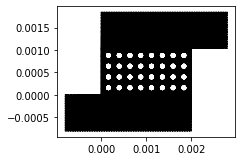

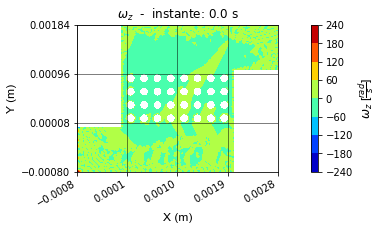

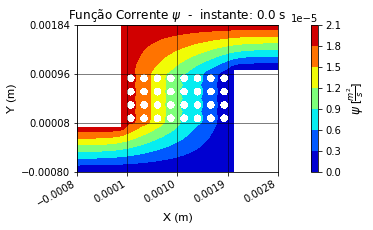

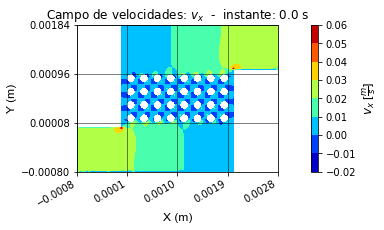

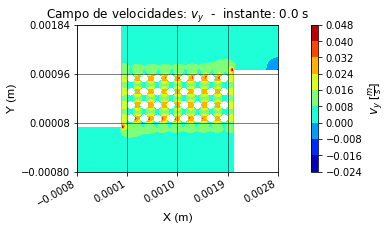

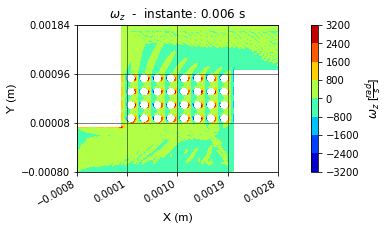

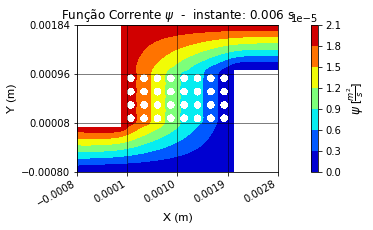

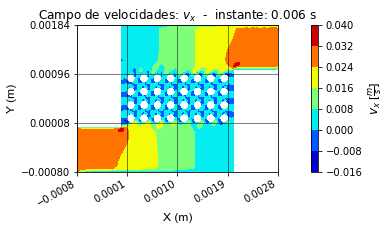

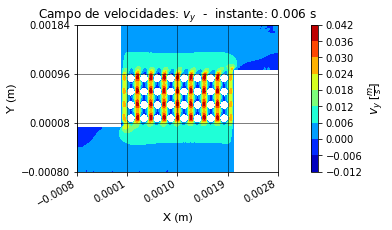

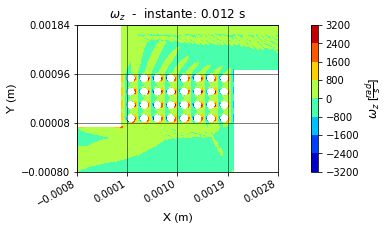

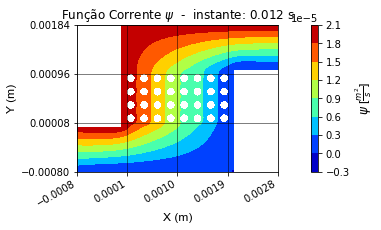

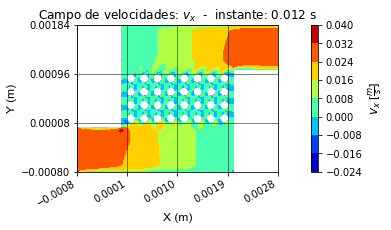

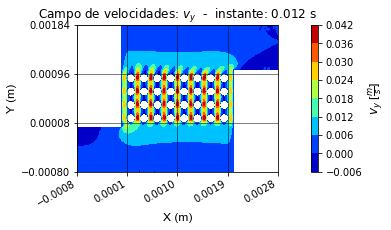

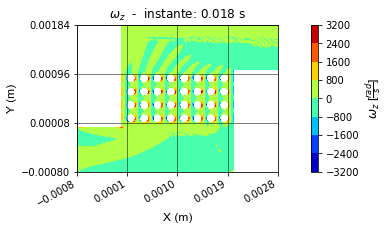

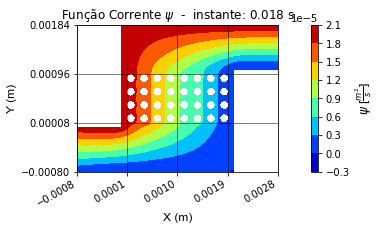

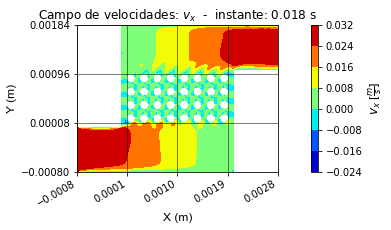

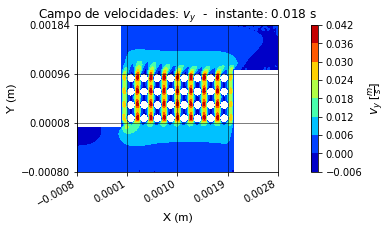

In [4]:
#--------------------------------------------------
# Fonte dos gráficos
matplot_font = {'fontname': 'Arial',
                'color':  'black',
                'weight': 'normal',
                'size': 12,
                }

# Plotando malha

fig, ax = plt.subplots(figsize = (9.6,2.4))

triang = mtri.Triangulation(X,Y,IEN)
ax.set_aspect('equal')
ax.triplot(triang,'k-', linewidth=0.8)

# Plotando gráficos

for t in range(0,13,int(13/3)):
#for t in range(0,4):
    tempo = t*dt

    ## Vorticidade
    fig, ax0 = plt.subplots(figsize = (12,3))
 
    triang = mtri.Triangulation(X,Y,IEN)
    ax0.set_aspect('equal')
    ax0.tricontourf(triang,CampoVort[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)
    cbar = plt.colorbar(ax0.tricontourf(triang,CampoVort[:,t],cmap=cm.jet),shrink=1.0, aspect=20)

    cbar.set_label('$\omega_z$ [$\\frac{rad}{s}$]',fontdict=matplot_font)
    plt.title("$\omega_z$  -  instante: "+ str(round(tempo,3))+" s")
    plt.ylabel("Y (m)",fontdict=matplot_font) 
    plt.xlabel("X (m)",fontdict=matplot_font) 
    labx = np.linspace(X.min(),X.max(),5)
    laby = np.linspace(Y.min(),Y.max(),4)
    plt.grid(color='black', linestyle='solid', linewidth=0.5)
    plt.xticks(labx)
    plt.yticks(laby)
    plt.gcf().autofmt_xdate()
    
    ## PSI
    fig, ax1 = plt.subplots(figsize = (12,3))

    triang = mtri.Triangulation(X,Y,IEN)
    ax1.set_aspect('equal')
    ax1.tricontourf(triang,CampoPSI[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)
    cbar = plt.colorbar(ax1.tricontourf(triang,CampoPSI[:,t],cmap=cm.jet),shrink=1.0, aspect=20)

    cbar.set_label('$\psi$ [$\\frac{m^2}{s}$]',fontdict=matplot_font)
    plt.title("Função Corrente $\psi$  -  instante: "+ str(round(tempo,3))+" s")
    plt.ylabel("Y (m)",fontdict=matplot_font) 
    plt.xlabel("X (m)",fontdict=matplot_font) 
    labx = np.linspace(X.min(),X.max(),5)
    laby = np.linspace(Y.min(),Y.max(),4)
    plt.grid(color='black', linestyle='solid', linewidth=0.5)
    plt.xticks(labx)
    plt.yticks(laby)
    plt.gcf().autofmt_xdate()

    ## vx
    fig, ax2 = plt.subplots(figsize = (12,3))

    triang = mtri.Triangulation(X,Y,IEN)
    ax2.set_aspect('equal')
    ax2.tricontourf(triang,CampoVx[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)
    cbar = plt.colorbar(ax2.tricontourf(triang,CampoVx[:,t],cmap=cm.jet),shrink=1.0, aspect=20)

    cbar.set_label('$v_x$ [$\\frac{m}{s}$]',fontdict=matplot_font)
    plt.title("Campo de velocidades: $v_x$  -  instante: "+ str(round(tempo,3))+" s")
    plt.ylabel("Y (m)",fontdict=matplot_font) 
    plt.xlabel("X (m)",fontdict=matplot_font) 
    labx = np.linspace(X.min(),X.max(),5)
    laby = np.linspace(Y.min(),Y.max(),4)
    plt.grid(color='black', linestyle='solid', linewidth=0.5)
    plt.xticks(labx)
    plt.yticks(laby)
    plt.gcf().autofmt_xdate()

    ## vy
    fig, ax3 = plt.subplots(figsize = (12,3))

    triang = mtri.Triangulation(X,Y,IEN)
    ax3.set_aspect('equal')
    ax3.tricontourf(triang,CampoVy[:,t], interpolation='quadric', origin='lower', cmap=cm.jet)
    cbar = plt.colorbar(ax3.tricontourf(triang,CampoVy[:,t],cmap=cm.jet),shrink=1.0, aspect=20)

    cbar.set_label('$v_y$ [$\\frac{m}{s}$]',fontdict=matplot_font)
    plt.title("Campo de velocidades: $v_y$  -  instante: "+ str(round(tempo,3))+" s")
    plt.ylabel("Y (m)",fontdict=matplot_font) 
    plt.xlabel("X (m)",fontdict=matplot_font) 
    labx = np.linspace(X.min(),X.max(),5)
    laby = np.linspace(Y.min(),Y.max(),4)
    plt.grid(color='black', linestyle='solid', linewidth=0.5)
    plt.xticks(labx)
    plt.yticks(laby)
    plt.gcf().autofmt_xdate()

    plt.show()

## Modelagem de partículas no escoamento

$$ \vec{v_p} = \frac{\partial\vec{x_p}}{\partial t} = \vec{v} \;\; \Rightarrow \;\; x^{n+1}_p = x^n_p + v\Delta t $$

In [ ]:
a = np.array([[1,2,3],[4,5,3],[7,8,9],[3,11,12],[13,14,15],[16,3,18]])

print(a[np.where(a[:,0] == 3)])
print(a[np.where(a[:,1] == 3)])
print(a[np.where(a[:,2] == 3)])
print([np.where(a[:,0] == 3)])
Af = np.vstack((a[np.where(a[:,0] == 3)],a[np.where(a[:,1] == 3)],a[np.where(a[:,2] == 3)]))
print(Af)
print(len(Af))

dic = {2 : [0.80,0.21,0.53,3.00,0.98] , 7 : [0.60,0.39,0.40,2.43,0.74,0.68,1.79] , 9 : [0.01,3.12,4.10,1.00]}

keys = list(dic.keys())
print(dic[2])

b = np.array([7.23,22,0.3,41,2])
print(np.where(b[:] == 0.3)[0][0])

c = [[1,2,3],[4,5,3],[7,8,9],[3,11,12],[13,14,15],[16,3,18]]

c.index([4,5,3])

In [7]:
# Criando diretório para armazenar solução

# Specify the folder in which results will be exported (mostly graphs)
workingDir = r"C:\Users\João Pedro\Downloads\ElementosFinitos"   #Notebook pessoal
#workingDir = r"C:\Users\jferreira\Downloads\ElementosFinitos"   #TechnipFMC
fileName = "Solucao_canal_(1.0x2.0)_1_particula_0.05_mesh_3k_elem_1.0_L_0.1_nu_0.1_dt_0.5_vxcc_50_Re"
outputPath = workingDir + "\\" + fileName

if not os.path.exists(outputPath):
    os.mkdir(outputPath)
    print("Directory " , outputPath ,  " has been created ")
else:
    print("Directory " , outputPath ,  " already exists")

# Propriedades do fluido e domínio:

nu = 0.01

to = 0
tf = 6
dt = 0.1
nt = int((tf-to)/dt+1)

# leitura de malha e classificacao de contorno por nome (ccName)
mshname = 'Retangulo_(1.00x2.00)_0.05_mesh_3k_elem_1.0_L.msh'
msh = meshio.read('./' + mshname)
X = np.array(msh.points[:,0])
Y = np.array(msh.points[:,1])
npoints = len(X)
IEN = msh.cells[1].data # triangles
ne = IEN.shape[0]
IENbound = msh.cells[0].data # lines
IENboundTypeElem = list(msh.cell_data['gmsh:physical'][0] - 5)
boundNames = list(msh.field_data.keys())
IENboundElem = [boundNames[elem] for elem in IENboundTypeElem]

def closest(lista, K):
  return lista[min( range(len(lista)), key = lambda i: abs(lista[i]-K) )]

####################################################################################
#O array IENboundTypeElem apresenta séries de números repetidos. Cada série de um número corresponde a um contorno e a quantidade de pontos nele.
#Ex.: 4 contornos, dois com 5 nós, dois com 3 nós: msh.cell_data['gmsh:physical'][0] será [4,4,4,4,4,5,5,5,6,6,6,6,6,7,7,7]
#O nº em série que vai representar cada contorno vai depender de como a entidade física é criada no gmsh. Pode haver, por ex., 5 contornos representados por 5,6,7,8,9
#Para tornar o loop que define o IENboundElem possível, é preciso que se subtraia esses números de forma que eles se tornem 0,1,2,3,4; por isso a subtração por 5 ali.
#Dessa forma, sempre teremos séries de 0, 1, 2, 3, 4 para associar aos nomes de cada contorno, estes por sua vez presentes em "boundaNames".
####################################################################################

# cria lista de nos do contorno
cc = np.unique(IENbound.reshape(IENbound.size))
ccName = [[] for i in range( len(X) )]
# prioridade 4
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'Admissao':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
# prioridade 3
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'Exaustao':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
# prioridade 2
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'CCInferior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]
# prioridade 1
for elem in range(0,len(IENbound)):
 if IENboundElem[elem] == 'CCSuperior':
  ccName[ IENbound[elem][0] ] = IENboundElem[elem]
  ccName[ IENbound[elem][1] ] = IENboundElem[elem]

IENbound = cc

# Definição dos vetores de condicoes de contorno para vx,vy e psi
vxcc = np.zeros( (npoints),dtype='float' )
vycc = np.zeros( (npoints),dtype='float' )
PSIcc = np.zeros( (npoints),dtype='float' )

for i in IENbound: 
 if ccName[i] == 'CCInferior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 0.0
 if ccName[i] == 'CCSuperior':
  vxcc[i] = 0.0
  vycc[i] = 0.0
  PSIcc[i] = 1.0
 if ccName[i] == 'Admissao':
  vxcc[i] = 0.5
  vycc[i] = 0.0
  PSIcc[i] = Y[i]


# inicializacao das matrizes globais
Areas = np.empty( ne,dtype='float' )    # Será utilizado mais tarde para obtenção da posição da partícula
K = np.zeros( (npoints,npoints),dtype='float' )
M = np.zeros( (npoints,npoints),dtype='float' )
Gx = np.zeros( (npoints,npoints),dtype='float' )
Gy = np.zeros( (npoints,npoints),dtype='float' )

for e in range(0,ne):
 v1,v2,v3 = IEN[e]

 # Calcula a área do triângulo
 area = 0.5*np.linalg.det([[1.0,X[v1],Y[v1]],
                           [1.0,X[v2],Y[v2]],
                           [1.0,X[v3],Y[v3]]])
 Areas[e] = area

 b1 = Y[v2]-Y[v3]
 b2 = Y[v3]-Y[v1]
 b3 = Y[v1]-Y[v2]

 c1 = X[v3]-X[v2]
 c2 = X[v1]-X[v3]
 c3 = X[v2]-X[v1]

 kxelem = np.array([[b1*b1,b1*b2,b1*b3],
                    [b2*b1,b2*b2,b2*b3],
                    [b3*b1,b3*b2,b3*b3]])
 kyelem = np.array([[c1*c1,c1*c2,c1*c3],
                    [c2*c1,c2*c2,c2*c3],
                    [c3*c1,c3*c2,c3*c3]])
 kelem = (1/(4*area))*kxelem + (1/(4*area))*kyelem

 melem = (area/12.0)*np.array([[2.0,1.0,1.0],
                               [1.0,2.0,1.0],
                               [1.0,1.0,2.0]])

 gxelem = (1/6)*np.array([[b1,b2,b3],
                          [b1,b2,b3],
                          [b1,b2,b3]])
 gyelem = (1/6)*np.array([[c1,c2,c3],
                          [c1,c2,c3],
                          [c1,c2,c3]])


 for ilocal in range(0,3):
  iglobal = IEN[e,ilocal]
  for jlocal in range(0,3):
   jglobal = IEN[e,jlocal]

   K[iglobal,jglobal] += kelem[ilocal,jlocal]
   M[iglobal,jglobal] += melem[ilocal,jlocal]
   Gx[iglobal,jglobal] += gxelem[ilocal,jlocal]
   Gy[iglobal,jglobal] += gyelem[ilocal,jlocal]


# condição inicial de vx,vy (necessárias para cálculo da vorticidade nos contornos)
vx = np.zeros( (npoints),dtype='float' )
vy = np.zeros( (npoints),dtype='float' )
PSI = np.zeros( (npoints),dtype='float' )

for i in IENbound:
 vx[i] = vxcc[i]
 vy[i] = vycc[i]

# Vorticidade nos contornos
vort_cc = np.linalg.solve(M,(Gx@vy - Gy@vx))

# Gravando condições de contorno e iniciais da solução em .vtk
point_data = {'PSIcc' : PSIcc}
data_vxcc = {'vxcc' : vxcc}
data_vycc = {'vycc' : vycc}
data_vort_cc = {'vort_cc' : vort_cc}
point_data.update(data_vxcc)
point_data.update(data_vycc)
point_data.update(data_vort_cc)
meshio.write_points_cells(outputPath +'\\'+'condicaoDeContorno.vtk',
                           msh.points, 
                           msh.cells,
                           point_data=point_data,
                           )


# Cálculo da vorticidade, função corrente e velocidade para o 1º instante
CampoVort = np.empty((npoints,nt))
CampoPSI = np.empty((npoints,nt))
CampoVx = np.empty((npoints,nt))
CampoVy = np.empty((npoints,nt))
ParticulaX = np.empty(nt)
ParticulaY = np.empty(nt)

vort = vort_cc.copy()
CampoVort[:,0] = vort

## Solução da Equação de Corrente-Vorticidade
Apsi = K.copy()
bpsi = M@vort

### Imposição das c.c.s de Dirichlet
for i in IENbound:
  if ccName[i] == 'CCSuperior' or \
      ccName[i] == 'CCInferior' or \
      ccName[i] == 'Admissao':
        Apsi[i,:] = 0.0 # zerando a linha
        Apsi[i,i] = 1.0 # colocando 1 na diagonal
        bpsi[i]   = PSIcc[i]

### Solução
PSI = np.linalg.solve(Apsi,bpsi)

CampoPSI[:,0] = PSI

## Obtendo campo de velocidades a partir da função corrrente
vx = np.linalg.solve(M,Gy@PSI)
vy = np.linalg.solve(M,-Gx@PSI)


for i in IENbound:
  if ccName[i] == 'CCSuperior' or \
     ccName[i] == 'CCInferior' or \
     ccName[i] == 'Admissao':
        vx[i] = vxcc[i]
        vy[i] = vycc[i]

CampoVx[:,0] = vx
CampoVy[:,0] = vy

## Posição inicial da partícula

xpo = 0.4
ypo = 0.6
ParticulaX[0] = xpo
ParticulaY[0] = ypo

## Localizando elemento em que ela se encontra
for e in range(0,ne):

  v1,v2,v3 = IEN[e]

  L1 = np.sqrt((ParticulaX[0]-X[v1])**2+(ParticulaY[0]-Y[v1])**2)
  L2 = np.sqrt((ParticulaX[0]-X[v2])**2+(ParticulaY[0]-Y[v2])**2)
  L3 = np.sqrt((ParticulaX[0]-X[v1])**2+(ParticulaY[0]-Y[v3])**2)

  if L1+L2+L3 == 1:
    break

A = Areas[e]
X1,X2,X3,Y1,Y2,Y3 = X[v1],X[v2],X[v3],Y[v1],Y[v2],Y[v3]   # vértices do elemento onde a partícula se encontra
Eo = IEN [e]


# Avanço no tempo
for n in range(1,nt):

 ## Solução do sistema linear para vorticidade

 ### Cálculo da condição de contorno da vorticidade (atualizando vorticidade nos contornos a cada iteração)
 vort_cc = np.linalg.solve(M,(Gx@vy - Gy@vx))

 ### Montagem da matriz A
 vx_diag = np.diag(vx)
 vy_diag = np.diag(vy)

 ### Montagem da matriz A e do vetor b de transporte de vorticidade
 A = M/dt + nu*K + vx_diag@Gx + vy_diag@Gy # implícito para conv e difusão
 b = (M/dt)@vort
 
 ### Condição de contorno para o sistema linear Ax=b
 for i in IENbound:
     if ccName[i] == 'CCSuperior' or \
        ccName[i] == 'CCInferior' or \
        ccName[i] == 'Admissao':
         A[i,:] = 0.0 # zerando a linha
         A[i,i] = 1.0 # colocando 1 na diagonal
         b[i]   = vort_cc[i]

 ### Solução
 vort = np.linalg.solve(A,b)

 CampoVort[:,n] = vort

 ## Solução da Equação de Corrente-Vorticidade

 Apsi = K.copy()

 bpsi = M@vort

 ### Imposição das c.c.s de Dirichlet
 for i in IENbound:
    if ccName[i] == 'CCSuperior' or \
       ccName[i] == 'CCInferior' or \
       ccName[i] == 'Admissao':
         Apsi[i,:] = 0.0 # zerando a linha
         Apsi[i,i] = 1.0 # colocando 1 na diagonal
         bpsi[i]   = PSIcc[i]

 ### Solução
 PSI = np.linalg.solve(Apsi,bpsi)

 CampoPSI[:,n] = PSI

 ## Obtendo campo de velocidades a partir da função corrrente

 vx = np.linalg.solve(M,Gy@PSI)
 vy = np.linalg.solve(M,-Gx@PSI)
 
 
 for i in IENbound:
    if ccName[i] == 'CCSuperior' or \
       ccName[i] == 'CCInferior' or \
       ccName[i] == 'Admissao':
         vx[i] = vxcc[i]
         vy[i] = vycc[i]

 CampoVx[:,n] = vx
 CampoVy[:,n] = vy


 ## Obtendo posição da partícula
 ### Localizando partícula

 IENParticula = Eo   # Linha da IEN respectiva ao elemento em que a partícula está
 flag = 0     #Sinalizador que indicará se o loop alcançou ou não o elemento em que a partícula se encontra

 while flag != 1:

   dicioElementos = {}
   dicioValoresElementos = {}
   for vertice in IENParticula:

      IEN0Vertice = IEN[np.where(IEN[:,0] == vertice)]
      IEN1Vertice = IEN[np.where(IEN[:,1] == vertice)]
      IEN2Vertice = IEN[np.where(IEN[:,2] == vertice)]   # Todos os três respectivos a um mesmo vértice

      IENVertice = np.vstack((IEN0Vertice,IEN1Vertice,IEN2Vertice))   # Array listando os elementos ligados a um ÚNICO vértice do triângulo onde a partícula se encontra
      nElementosVertice = len(IENVertice)
      
      dicioElementos[vertice] = IENVertice   # Dict que associa cada vértice a uma lista de linhas da IEN associadas aos elementos adjacentes a esse vértice

      listaValoresElementosVertice = []
      for e in range(0,nElementosVertice):

        v1,v2,v3 = IENVertice[e]

        L1 = np.sqrt((ParticulaX[n]-X[v1])**2+(ParticulaY[n]-Y[v1])**2)
        L2 = np.sqrt((ParticulaX[n]-X[v2])**2+(ParticulaY[n]-Y[v2])**2)
        L3 = np.sqrt((ParticulaX[n]-X[v3])**2+(ParticulaY[n]-Y[v3])**2)
        criterio = L1+L2+L3
        round(criterio, 2)
        listaValoresElementosVertice.append(criterio)

      dicioValoresElementos[vertice] = listaValoresElementosVertice   # Dict que associa cada vértice ao valor de critério obtido para cada elemento adjacente ao vértice


   Vertices = list(dicioValoresElementos.keys())

   for key in Vertices:   #Loop nos vértices para avaliar os elementos associados a cada vértice
      
     ValoresElementosVertice = dicioValoresElementos.get(key)

     if (1.00 in ValoresElementosVertice) == True:
       posicaoLinhaNaListaDeLinhas = ValoresElementosVertice.index(1.00)

       ListaDeLinhas = np.array(dicioElementos.get(key))
       linhaIEN = ListaDeLinhas[posicaoLinhaNaListaDeLinhas][0]   #A lista de linhas está assim: [ [[n1,n2,n3]],[[n4,n5,n6]] ], por isso o index [0]
      
       e = np.where(IEN[:] == linhaIEN)[0][0]

       A = Areas[e]
       v1,v2,v3 = linhaIEN
       X1,X2,X3,Y1,Y2,Y3 = X[v1],X[v2],X[v3],Y[v1],Y[v2],Y[v3]   # Vértices do elemento onde a partícula se encontra

       ### funções de interpolação

       vxp = N2D_11(ParticulaX[n-1],ParticulaY[n-1],X1,X2,X3,Y1,Y2,Y3,A)*CampoVx[v1,n-1] + N2D_12(ParticulaX[n-1],ParticulaY[n-1],X1,X2,X3,Y1,Y2,Y3,A)*CampoVx[v2,n-1] + N2D_13(ParticulaX[n-1],ParticulaY[n-1],X1,X2,X3,Y1,Y2,Y3,A)*CampoVx[v3,n-1]
       vyp = N2D_11(ParticulaX[n-1],ParticulaY[n-1],X1,X2,X3,Y1,Y2,Y3,A)*CampoVy[v1,n-1] + N2D_12(ParticulaX[n-1],ParticulaY[n-1],X1,X2,X3,Y1,Y2,Y3,A)*CampoVy[v2,n-1] + N2D_13(ParticulaX[n-1],ParticulaY[n-1],X1,X2,X3,Y1,Y2,Y3,A)*CampoVy[v3,n-1]

       xp = ParticulaX[n-1] + vxp*dt
       yp = ParticulaY[n-1] + vyp*dt

       ParticulaX[n] = xp
       ParticulaY[n] = yp

       flag += 1

     elif flag == 0:
      closestValues = {}
      for key in Vertices:   #Loop nos vértices para avaliar os elementos associados a cada vértice
      
        ValoresElementosVertice = np.array(dicioValoresElementos.get(key))
        closerValue = closest( ValoresElementosVertice,1.00 )
        posicaoValorEmListaValores = np.where(ValoresElementosVertice[:] == closerValue)[0][0]

        ListaLinhasDoVertice = dicioElementos[key]
        LinhaDoElemento = ListaLinhasDoVertice[posicaoValorEmListaValores]
        #A posição do valor associado a um elemento na lista de valores deve ser a mesma q a posição da linha respectiva na lista de linhas

        closestValues[closerValue] = [key,LinhaDoElemento]

      closestValue = closest( list(closestValues.keys()),1.00 )
      Vertice, LinhaDoElementoMaisProximo = closestValues[closestValue]
      print(LinhaDoElementoMaisProximo)
      IENParticula = LinhaDoElementoMaisProximo


 # Gravando solução em .vtk
 print("... gravando em VTK passo de tempo: " + str(n))
 point_data = {'psi' : PSI}
 data_vx = {'vx' : vx}
 data_vy = {'vy' : vy}
 data_vort = {'omega_z' : vort}
 data_xp = {'xp' : xp}
 data_yp = {'yp' : yp}
 point_data.update(data_vx)
 point_data.update(data_vy)
 point_data.update(data_vort)
 point_data.update(data_xp)
 point_data.update(data_yp)
 meshio.write_points_cells(outputPath +'\\'+'solucao-'+str(n)+'.vtk',
                               msh.points, 
                               msh.cells,
                               point_data=point_data,
                               )

Directory  C:\Users\João Pedro\Downloads\ElementosFinitos\Solucao_canal_(1.0x2.0)_1_particula_0.05_mesh_3k_elem_1.0_L_0.1_nu_0.1_dt_0.5_vxcc_50_Re  already exists

[ 971 1733  295]
[ 971 1733  295]
[ 971 1733  295]
[ 393 1220  971]
[ 393 1220  971]
[ 393 1220  971]
[ 393 1155  842]
[ 393 1155  842]
[ 393 1155  842]
[714 842 315]
[714 842 315]
[714 842 315]
[ 714 1330  504]
[ 714 1330  504]
[ 714 1330  504]
[1069 1461  504]
[1069 1461  504]
[1069 1461  504]
[ 513 1632 1069]
[ 513 1632 1069]
[ 513 1632 1069]
[891 928 513]
[891 928 513]
[891 928 513]
[ 232 1215  928]
[ 232 1215  928]
[ 232 1215  928]
[ 694 1621 1215]
[ 694 1621 1215]
[ 694 1621 1215]
[ 694 1110  296]
[ 694 1110  296]
[ 694 1110  296]
[ 757 1110  611]
[ 757 1110  611]
[ 757 1110  611]
[ 611 1196  182]
[ 611 1196  182]
[ 611 1196  182]
[ 846 1196  397]
[ 846 1196  397]
[ 846 1196  397]
[ 258 1178  846]
[ 258 1178  846]
[ 258 1178  846]
[1487 1669  258]
[1487 1669  258]
[1487 1669  258]
[1487 1549  625]
[1487 1549  625]
[148

KeyboardInterrupt: 